In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
apple_df = pd.read_csv('/content/drive/MyDrive/AAPL (2).csv')
microsoft_df = pd.read_csv('/content/drive/MyDrive/MSFT.csv')

apple_df_head = apple_df.head()
microsoft_df_head = microsoft_df.head()

apple_df_head, microsoft_df_head

(         Date      Open      High       Low     Close  Adj Close      Volume
 0  2004-01-12  0.415179  0.443571  0.401786  0.405714   0.342615  3177636000
 1  2004-01-19  0.404821  0.410179  0.396071  0.402857   0.340203   974780800
 2  2004-01-26  0.401071  0.417500  0.396250  0.402857   0.340203  1251740000
 3  2004-02-02  0.401071  0.409107  0.387500  0.405536   0.342465  1319981600
 4  2004-02-09  0.403929  0.430357  0.400714  0.410714   0.346838  1292116000,
          Date       Open       High        Low      Close  Adj Close  \
 0  2004-01-01  27.580000  28.309999  27.330000  28.209999  17.547934   
 1  2004-01-08  28.389999  28.480000  27.260000  27.700001  17.230698   
 2  2004-01-15  27.549999  28.299999  27.420000  28.299999  17.603922   
 3  2004-01-22  28.360001  28.830000  27.469999  27.709999  17.236917   
 4  2004-01-29  27.809999  27.950001  27.010000  27.010000  16.801489   
 
       Volume  
 0  213070400  
 1  277198800  
 2  239126600  
 3  398516100  
 4  2758107

In [4]:
# forward fill missing values for both datasets
apple_df.fillna(method='ffill', inplace=True)
microsoft_df.fillna(method='ffill', inplace=True)

# check for missing values remaining
print("Apple Missing Values:\n", apple_df.isnull().sum())
print("\nMicrosoft Missing Values:\n", microsoft_df.isnull().sum())

Apple Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Microsoft Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-4-5f4bdb14e22c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  apple_df.fillna(method='ffill', inplace=True)
<ipython-input-4-5f4bdb14e22c>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  microsoft_df.fillna(method='ffill', inplace=True)


In [5]:
from sklearn.preprocessing import MinMaxScaler

# define the columns for normalisation
columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'Volume']

# scaler
scaler = MinMaxScaler()

# MinMax scaling
apple_df[columns_to_normalize] = scaler.fit_transform(apple_df[columns_to_normalize])
microsoft_df[columns_to_normalize] = scaler.transform(microsoft_df[columns_to_normalize])

# Display data
print("Apple Dataset Normalized Head:\n", apple_df[columns_to_normalize].head())
print("\nMicrosoft Dataset Normalized Head:\n", microsoft_df[columns_to_normalize].head())

Apple Dataset Normalized Head:
        Open      High       Low     Close    Volume
0  0.000083  0.000173  0.000074  0.000029  0.274302
1  0.000030  0.000005  0.000045  0.000014  0.074836
2  0.000011  0.000042  0.000045  0.000014  0.099914
3  0.000011  0.000000  0.000000  0.000028  0.106094
4  0.000026  0.000107  0.000069  0.000054  0.103570

Microsoft Dataset Normalized Head:
        Open      High       Low     Close    Volume
0  0.138898  0.140057  0.139901  0.141046  0.005864
1  0.143037  0.140910  0.139538  0.138459  0.011671
2  0.138745  0.140007  0.140368  0.141502  0.008224
3  0.142884  0.142667  0.140628  0.138510  0.022656
4  0.140073  0.138250  0.138239  0.134960  0.011545


In [6]:
 # calculate Daily Returns for both datasets
apple_df['Daily_Return'] = apple_df['Close'].pct_change()
microsoft_df['Daily_Return'] = microsoft_df['Close'].pct_change()

# calculate Moving Averages (5-day and 20-day)
apple_df['5_Day_MA'] = apple_df['Close'].rolling(window=5).mean()
apple_df['20_Day_MA'] = apple_df['Close'].rolling(window=20).mean()

microsoft_df['5_Day_MA'] = microsoft_df['Close'].rolling(window=5).mean()
microsoft_df['20_Day_MA'] = microsoft_df['Close'].rolling(window=20).mean()

# calculate additional indicators
apple_df['Volatility'] = apple_df['Close'].rolling(window=10).std()
microsoft_df['Volatility'] = microsoft_df['Close'].rolling(window=10).std()

# get rid of NaN values due to rolling calculations
apple_df.dropna(inplace=True)
microsoft_df.dropna(inplace=True)

print("Apple Dataset with Indicators:\n", apple_df[['Daily_Return', '5_Day_MA', '20_Day_MA', 'Volatility']].head())
print("\nMicrosoft Dataset with Indicators:\n", microsoft_df[['Daily_Return', '5_Day_MA', '20_Day_MA', 'Volatility']].head())

Apple Dataset with Indicators:
     Daily_Return  5_Day_MA  20_Day_MA  Volatility
19      0.201695  0.000411   0.000297    0.000081
20      0.127218  0.000465   0.000325    0.000090
21      0.307209  0.000539   0.000362    0.000128
22      0.260191  0.000645   0.000409    0.000192
23      0.075166  0.000764   0.000458    0.000245

Microsoft Dataset with Indicators:
     Daily_Return  5_Day_MA  20_Day_MA  Volatility
19     -0.012529  0.129705   0.131544    0.003213
20      0.020618  0.130405   0.131019    0.003250
21     -0.000389  0.129969   0.130621    0.002455
22      0.013214  0.130141   0.130157    0.002078
23      0.032605  0.131541   0.130058    0.002872


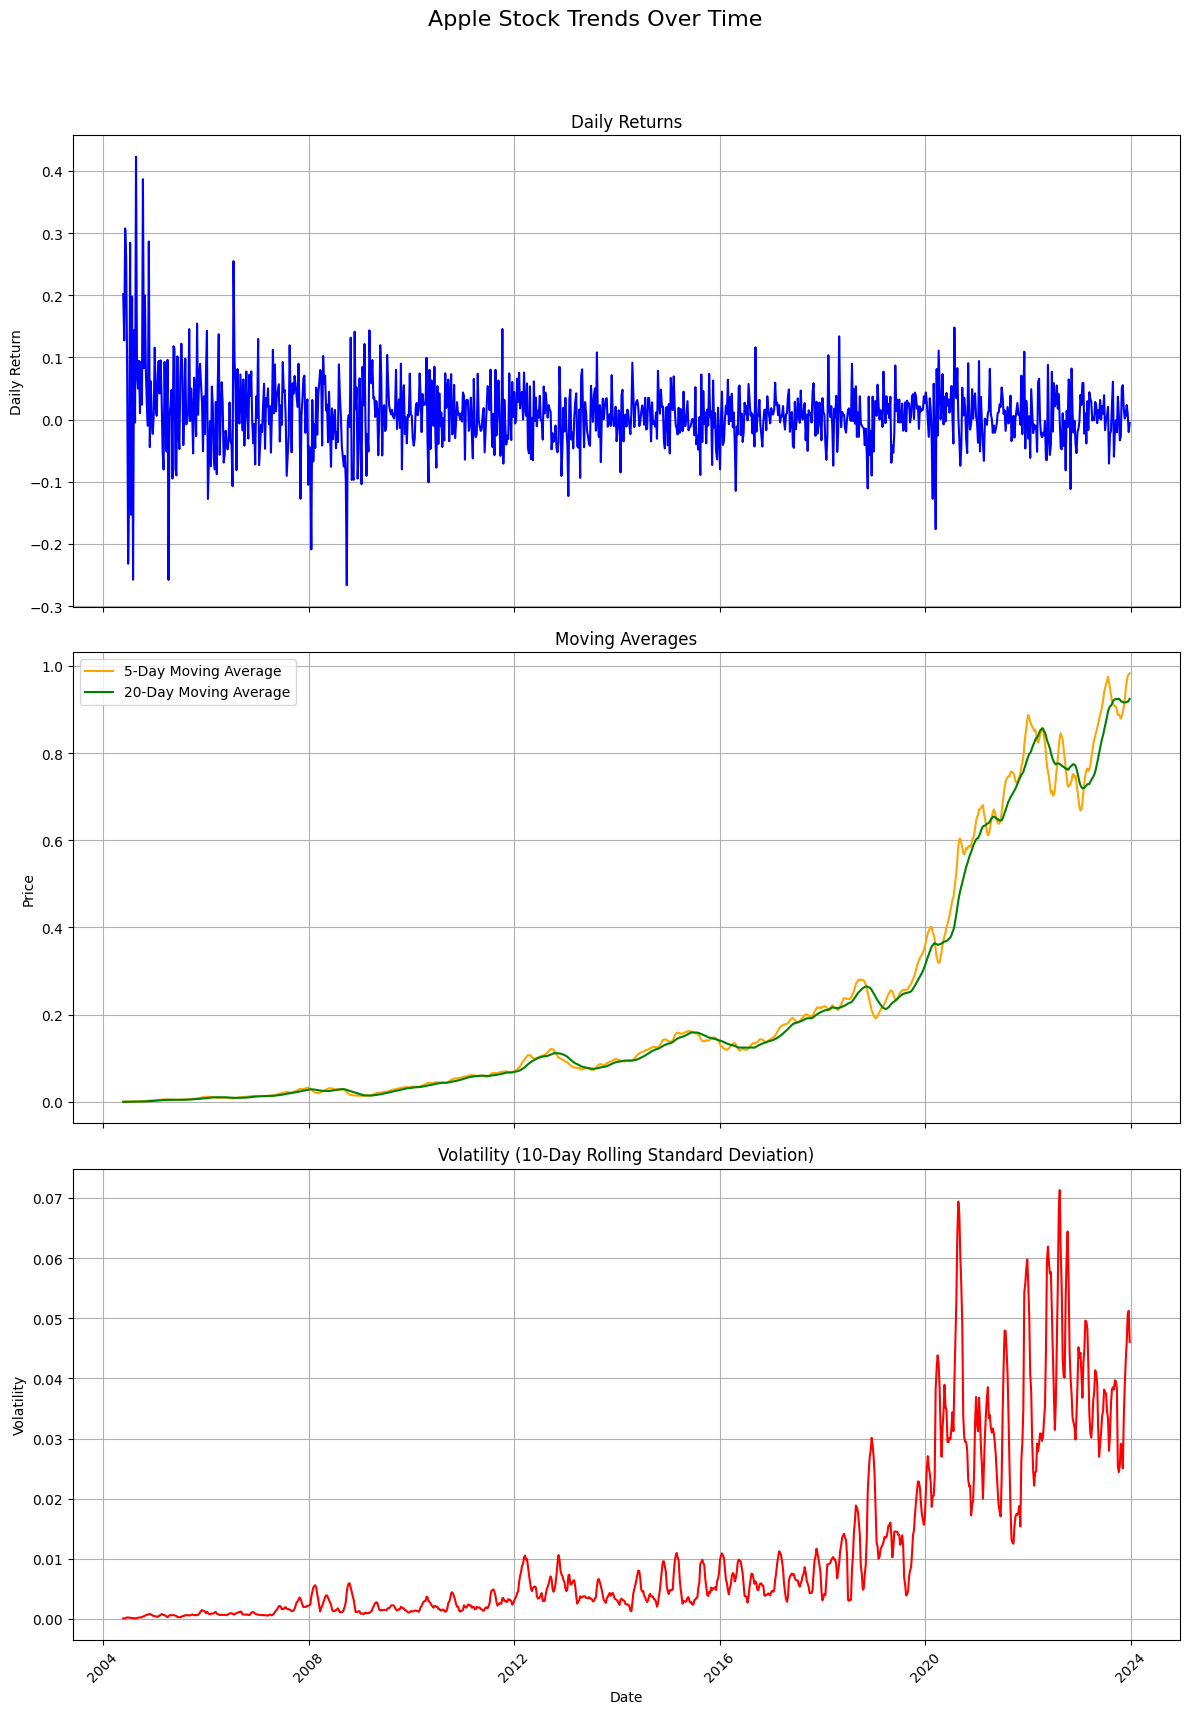

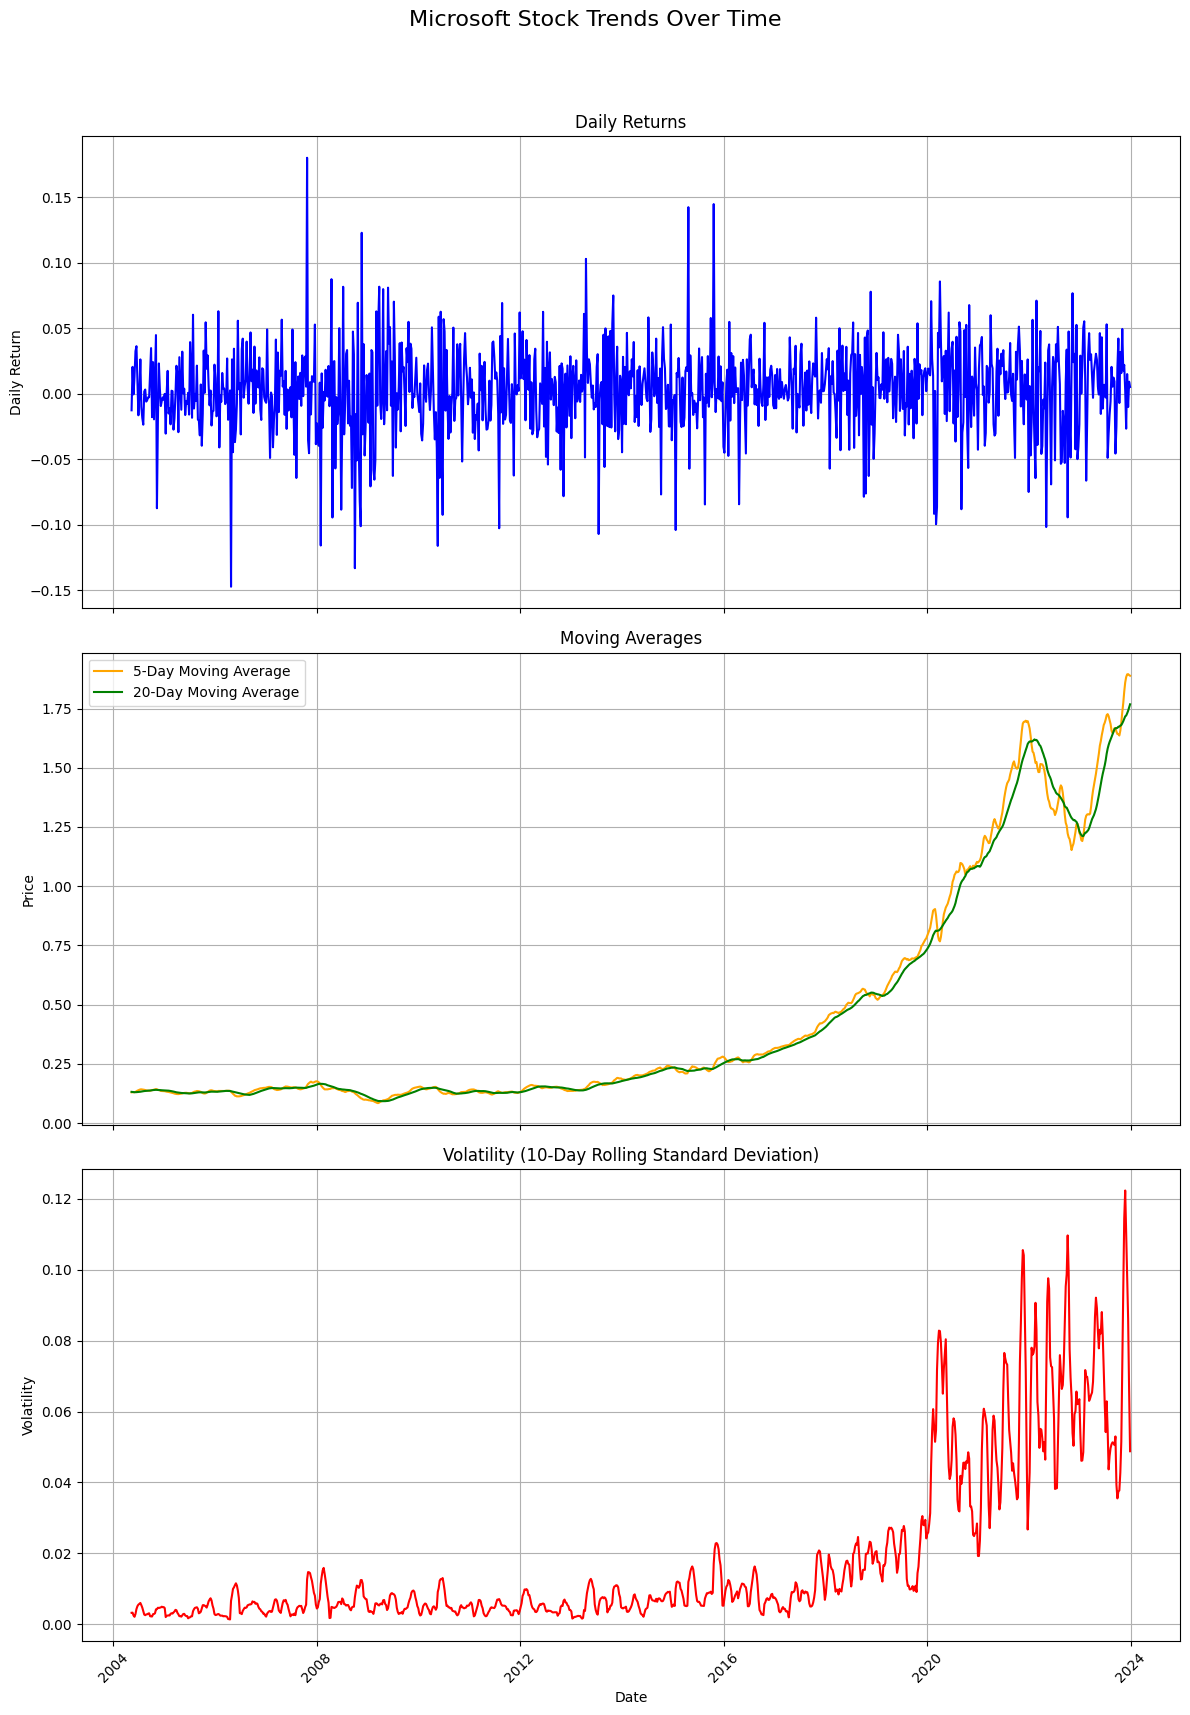

In [7]:
import matplotlib.pyplot as plt

# plot trends
def plot_trends(df, company_name):
    fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
    fig.suptitle(f'{company_name} Stock Trends Over Time', fontsize=16)

    # daily return
    axs[0].plot(df['Date'], df['Daily_Return'], label='Daily Return', color='blue')
    axs[0].set_title('Daily Returns')
    axs[0].set_ylabel('Daily Return')
    axs[0].grid(True)

    # moving averages
    axs[1].plot(df['Date'], df['5_Day_MA'], label='5-Day Moving Average', color='orange')
    axs[1].plot(df['Date'], df['20_Day_MA'], label='20-Day Moving Average', color='green')
    axs[1].set_title('Moving Averages')
    axs[1].set_ylabel('Price')
    axs[1].legend()
    axs[1].grid(True)

    # volatility
    axs[2].plot(df['Date'], df['Volatility'], label='10-Day Volatility', color='red')
    axs[2].set_title('Volatility (10-Day Rolling Standard Deviation)')
    axs[2].set_ylabel('Volatility')
    axs[2].grid(True)

    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()

# datetime format for plotting
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'])

# trends
plot_trends(apple_df, 'Apple')
plot_trends(microsoft_df, 'Microsoft')

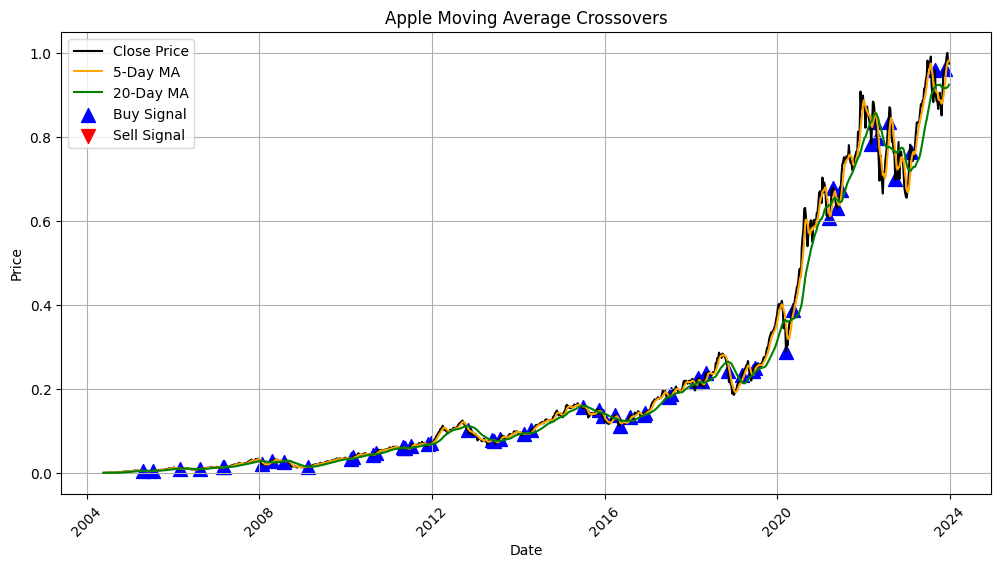

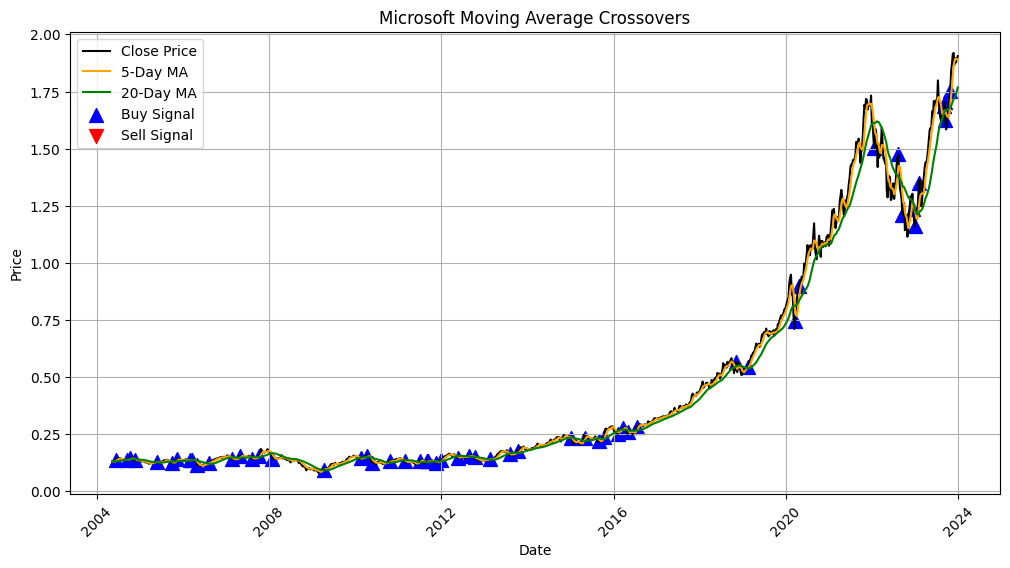

In [8]:
# check for crossovers of Apple and Microsoft
def calculate_crossovers(df, company_name):
    df['Crossover'] = df['5_Day_MA'] > df['20_Day_MA']  # True if 5-day MA is above 20-day MA
    df['Crossover_Signal'] = df['Crossover'].diff()  # Detects changes from False to True or vice versa

    # crossovers plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='black')
    plt.plot(df['Date'], df['5_Day_MA'], label='5-Day MA', color='orange')
    plt.plot(df['Date'], df['20_Day_MA'], label='20-Day MA', color='green')

    # highlight crossover points
    buy_signals = df[(df['Crossover_Signal'] == 1)]
    sell_signals = df[(df['Crossover_Signal'] == -1)]
    plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='blue', label='Buy Signal', s=100)
    plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='red', label='Sell Signal', s=100)

    plt.title(f"{company_name} Moving Average Crossovers")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# plot crossovers for Apple and Microsoft
calculate_crossovers(apple_df, 'Apple')
calculate_crossovers(microsoft_df, 'Microsoft')

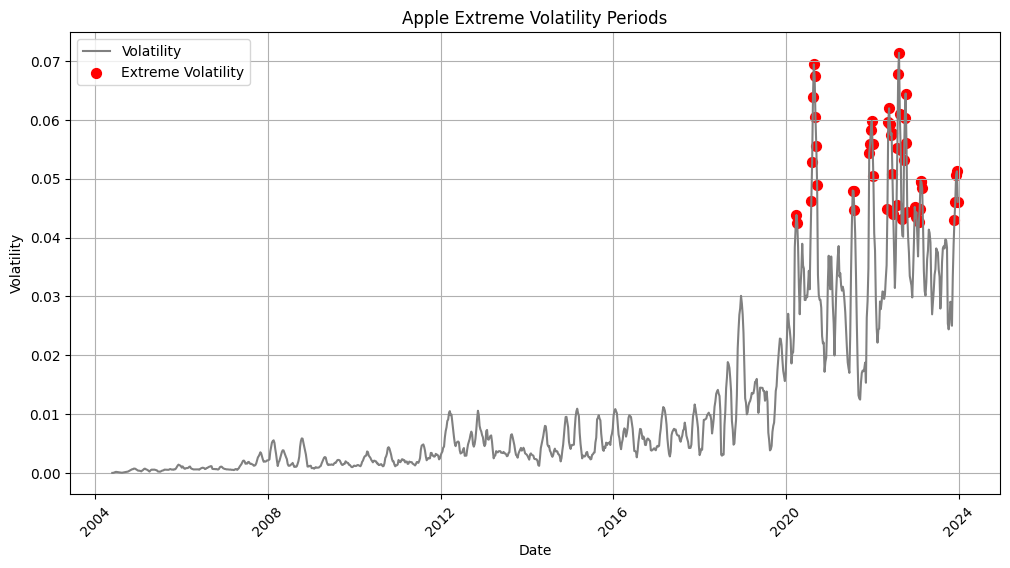

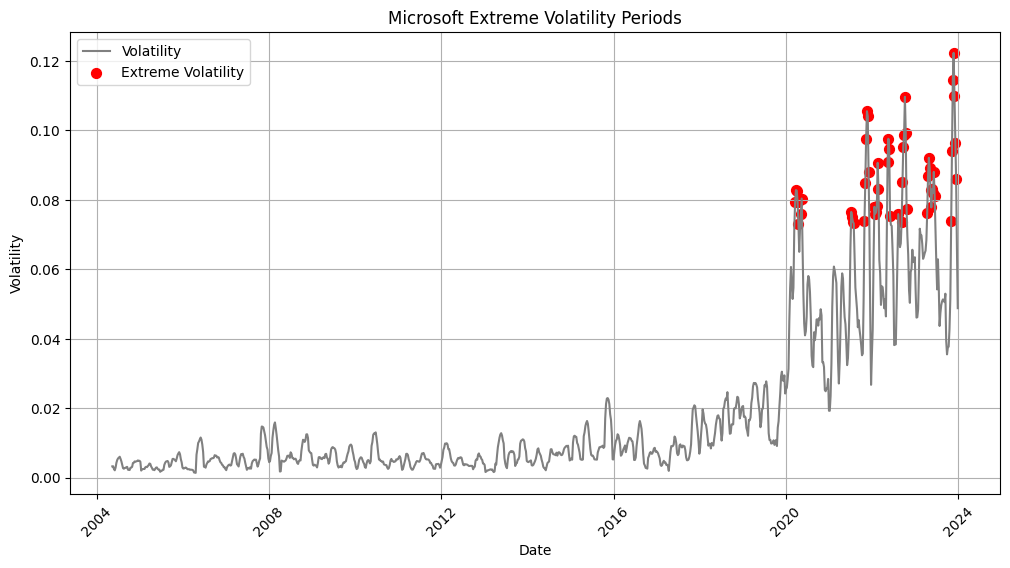

In [9]:
# function to show peaks for periods of extreme volatility
def plot_extreme_volatility(df, company_name):
    # calc the 95 percentile of volatility to define "extreme volatility"
    extreme_volatility_threshold = df['Volatility'].quantile(0.95)

    # filter for extreme volatility periods
    extreme_volatility_df = df[df['Volatility'] >= extreme_volatility_threshold]

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Volatility'], label='Volatility', color='grey')
    plt.scatter(extreme_volatility_df['Date'], extreme_volatility_df['Volatility'], color='red', label='Extreme Volatility', s=50)

    plt.title(f"{company_name} Extreme Volatility Periods")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

plot_extreme_volatility(apple_df, 'Apple')
plot_extreme_volatility(microsoft_df, 'Microsoft')

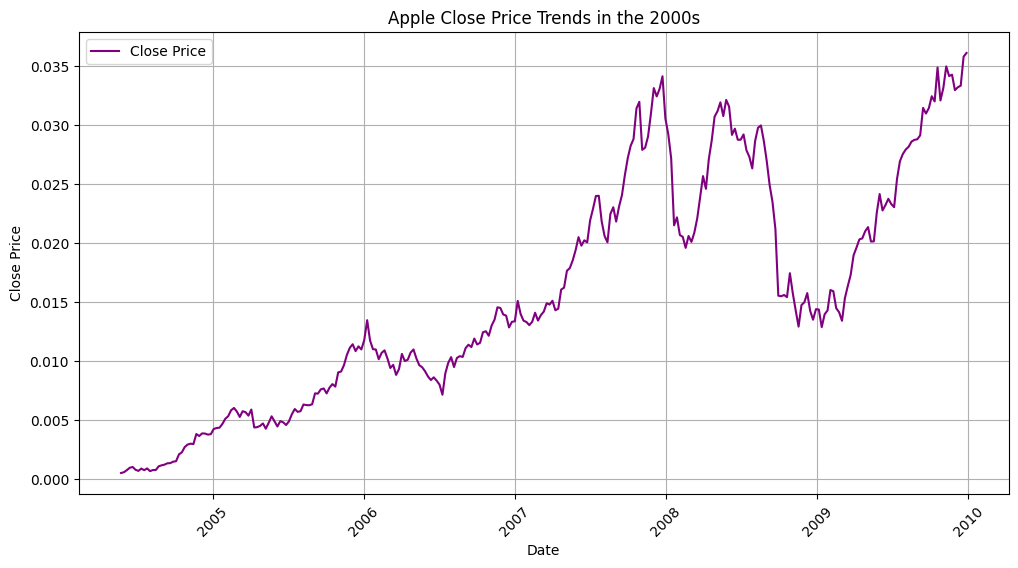

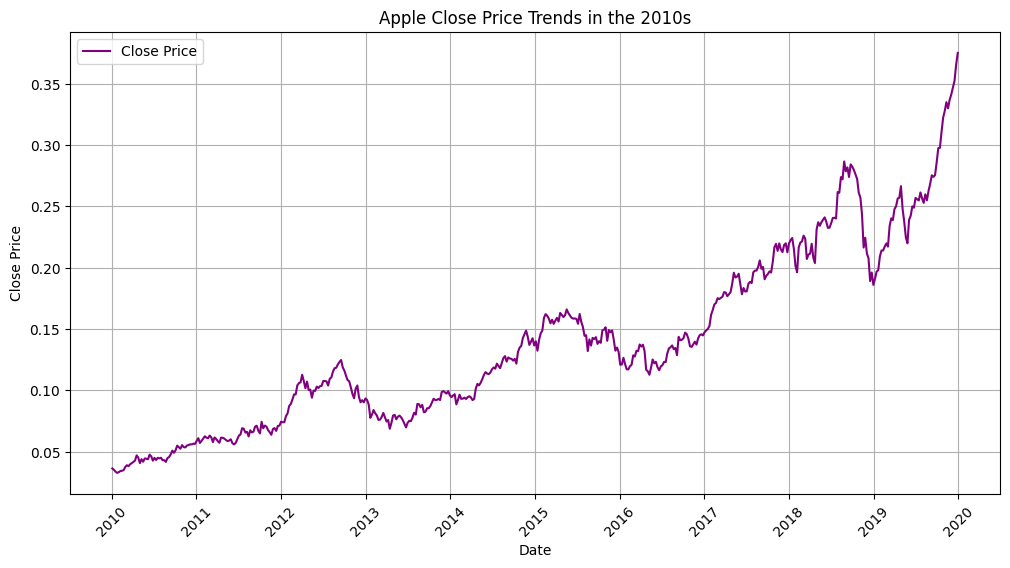

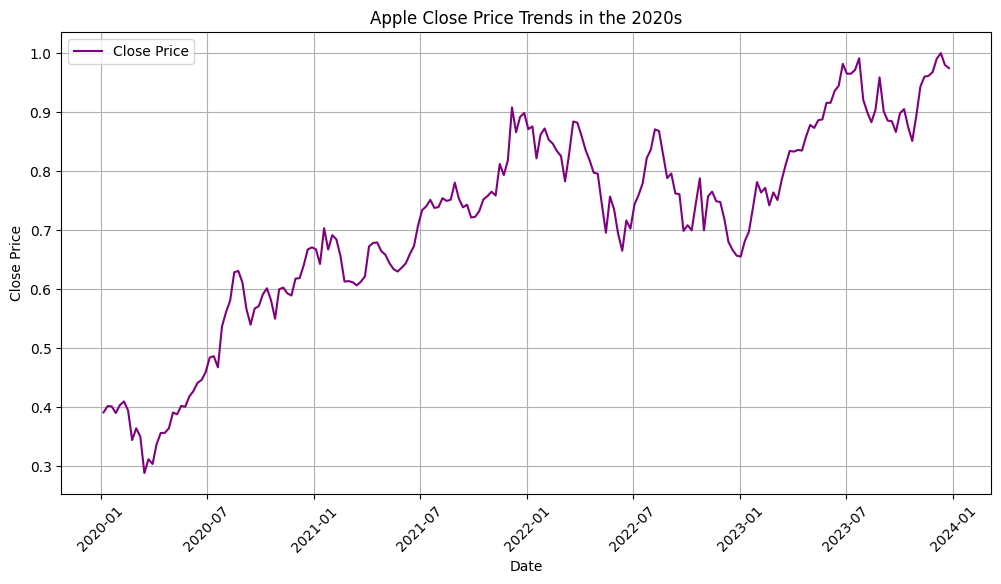

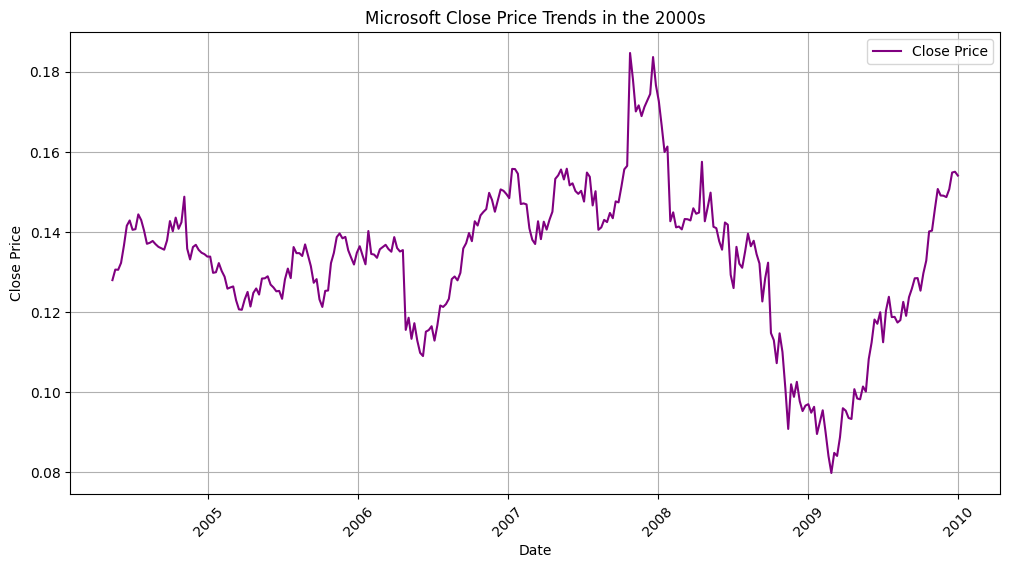

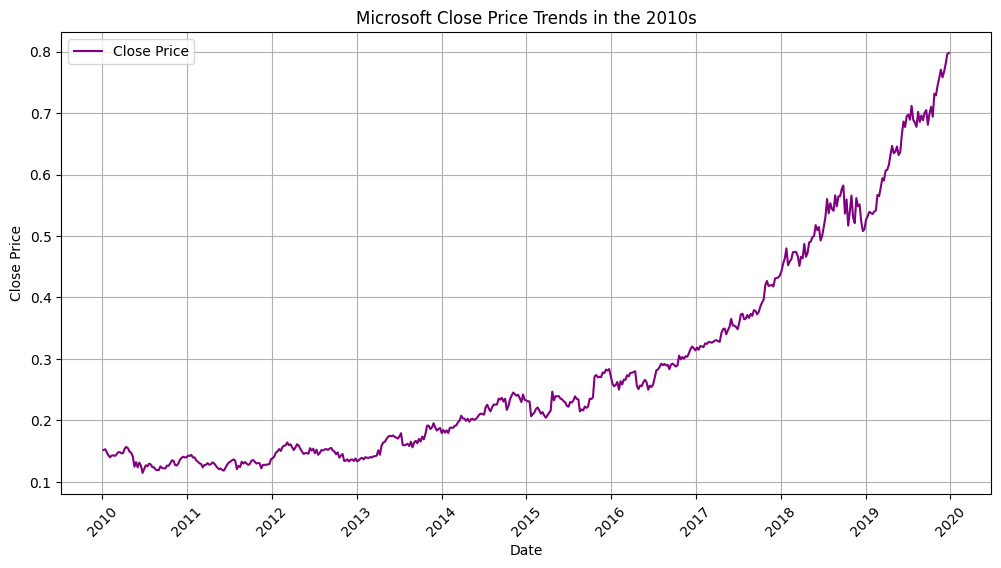

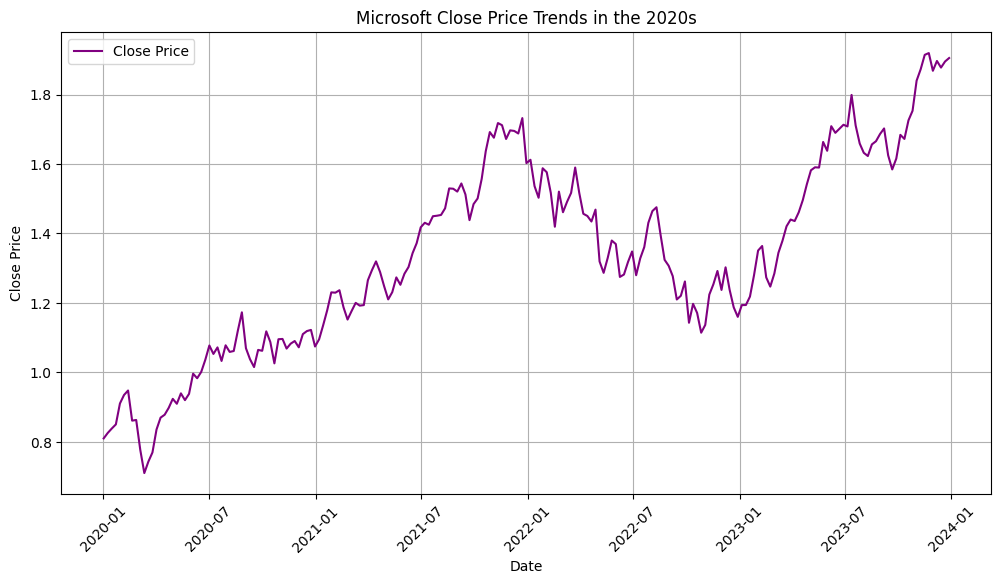

In [10]:
# define function to plot trends by decade
def plot_by_decade(df, company_name):
    decades = {'2000s': (2000, 2009), '2010s': (2010, 2019), '2020s': (2020, 2024)}

    for decade, (start, end) in decades.items():
        decade_df = df[(df['Date'].dt.year >= start) & (df['Date'].dt.year <= end)]

        plt.figure(figsize=(12, 6))
        plt.plot(decade_df['Date'], decade_df['Close'], label='Close Price', color='purple')
        plt.title(f"{company_name} Close Price Trends in the {decade}")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()

plot_by_decade(apple_df, 'Apple')
plot_by_decade(microsoft_df, 'Microsoft')

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 'Daily_Return', 'Volume', '5_Day_MA', '20_Day_MA', 'Volatility'

# define features and create a neew target variable based on daily returns
features = ['Daily_Return', 'Volume', '5_Day_MA', '20_Day_MA', 'Volatility']
apple_df['Return_Class'] = apple_df['Daily_Return'].apply(lambda x: 1 if x > 0 else 0)

# split the Apple dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(apple_df[features], apple_df['Return_Class'], test_size=0.2, random_state=42)

# hyperparameter grids for each model
param_grids = {
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'DecisionTree': {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20, None]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# init models
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC()
}

# grid Search for each model and save best parameters
best_params = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# output
print("\nBest Parameters for Each Model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

Tuning LogisticRegression...
Best parameters for LogisticRegression: {'C': 10, 'solver': 'liblinear'}
Tuning DecisionTree...
Best parameters for DecisionTree: {'max_depth': 5, 'min_samples_split': 2}
Tuning RandomForest...
Best parameters for RandomForest: {'max_depth': 20, 'n_estimators': 50}
Tuning SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}

Best Parameters for Each Model:
LogisticRegression: {'C': 10, 'solver': 'liblinear'}
DecisionTree: {'max_depth': 5, 'min_samples_split': 2}
RandomForest: {'max_depth': 20, 'n_estimators': 50}
SVM: {'C': 10, 'kernel': 'rbf'}


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# different thresholdsd being defined
thresholds = [0.002, 0.005, 0.01, 0.02]

results = {model_name: {thresh: {} for thresh in thresholds} for model_name in models.keys()}

for thresh in thresholds:
    # create new target variable based on the current threshold
    apple_df[f'Return_Class_{thresh}'] = apple_df['Daily_Return'].apply(lambda x: 1 if x >= thresh else (-1 if x <= -thresh else 0))

    # update x and y with the new threshold
    y = apple_df[f'Return_Class_{thresh}']
    X_train, X_test, y_train, y_test = train_test_split(apple_df[features], y, test_size=0.2, random_state=42)

    # train and evaluate each model with the tuned parameters
    for model_name, model in models.items():
        # Set the best parameters for the model
        model.set_params(**best_params[model_name])
        model.fit(X_train, y_train)

        # predictions and metric calculations
        y_pred = model.predict(X_test)
        results[model_name][thresh] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1_score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
        }

for model_name in results:
    print(f"\n{model_name} Performance at Different Thresholds:")
    for thresh, metrics in results[model_name].items():
        print(f"  Threshold ±{thresh * 100}%:")
        print(f"    Accuracy: {metrics['accuracy']:.4f}")
        print(f"    Precision: {metrics['precision']:.4f}")
        print(f"    Recall: {metrics['recall']:.4f}")
        print(f"    F1 Score: {metrics['f1_score']:.4f}")


LogisticRegression Performance at Different Thresholds:
  Threshold ±0.2%:
    Accuracy: 0.8976
    Precision: 0.8677
    Recall: 0.8976
    F1 Score: 0.8774
  Threshold ±0.5%:
    Accuracy: 0.8634
    Precision: 0.7679
    Recall: 0.8634
    F1 Score: 0.8097
  Threshold ±1.0%:
    Accuracy: 0.7463
    Precision: 0.5650
    Recall: 0.7463
    F1 Score: 0.6408
  Threshold ±2.0%:
    Accuracy: 0.8293
    Precision: 0.8384
    Recall: 0.8293
    F1 Score: 0.8272

DecisionTree Performance at Different Thresholds:
  Threshold ±0.2%:
    Accuracy: 1.0000
    Precision: 1.0000
    Recall: 1.0000
    F1 Score: 1.0000
  Threshold ±0.5%:
    Accuracy: 0.9951
    Precision: 0.9953
    Recall: 0.9951
    F1 Score: 0.9952
  Threshold ±1.0%:
    Accuracy: 0.9951
    Precision: 0.9952
    Recall: 0.9951
    F1 Score: 0.9951
  Threshold ±2.0%:
    Accuracy: 0.9951
    Precision: 0.9952
    Recall: 0.9951
    F1 Score: 0.9951

RandomForest Performance at Different Thresholds:
  Threshold ±0.2%:
    Ac

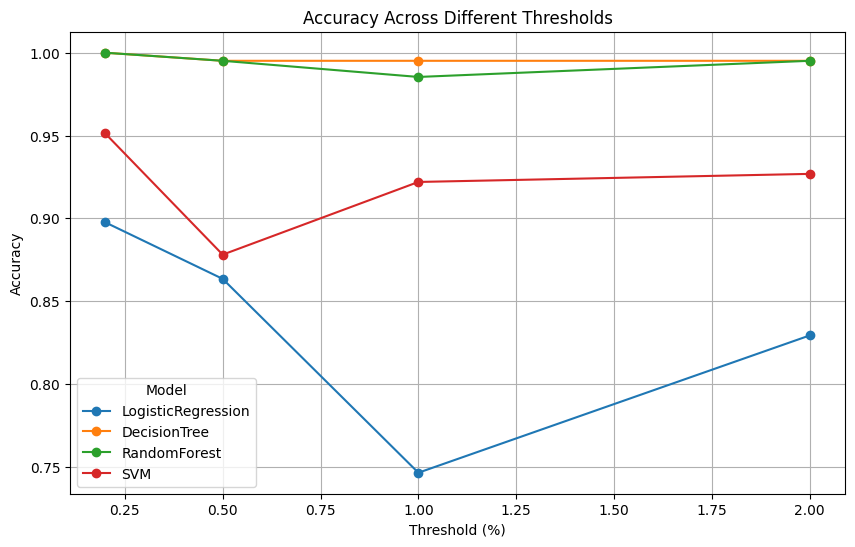

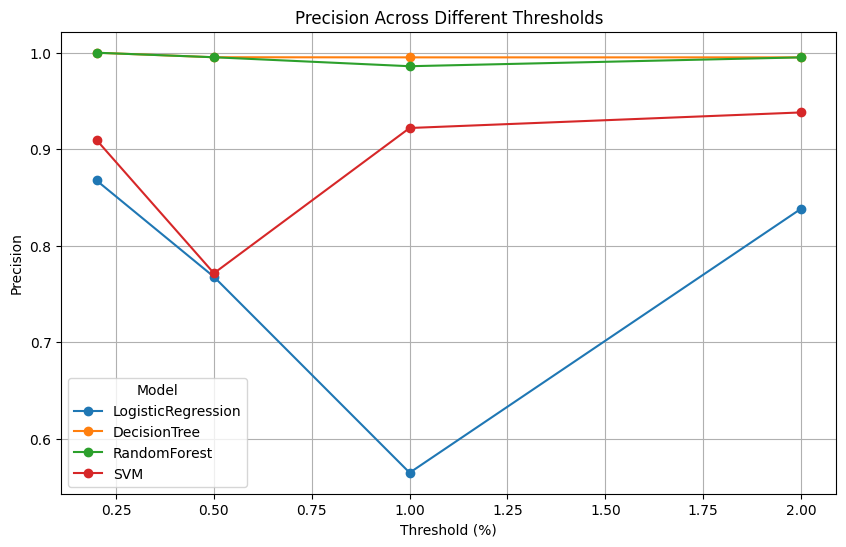

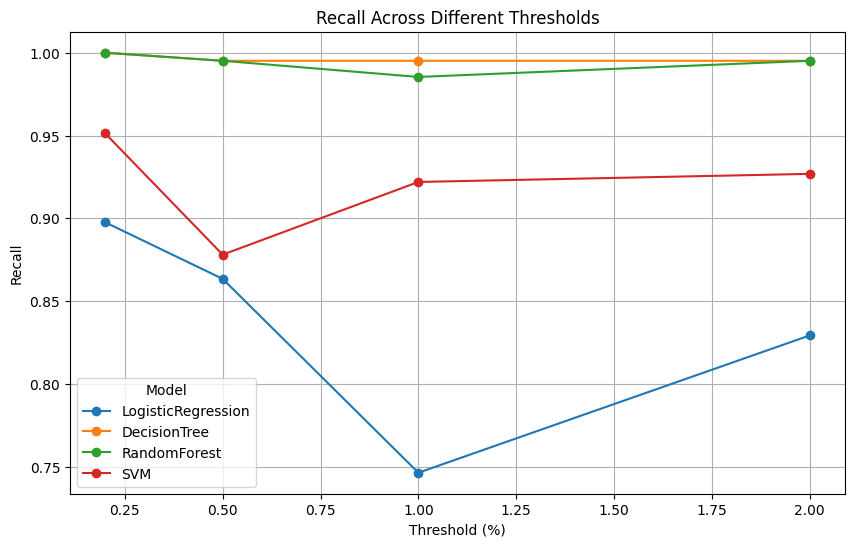

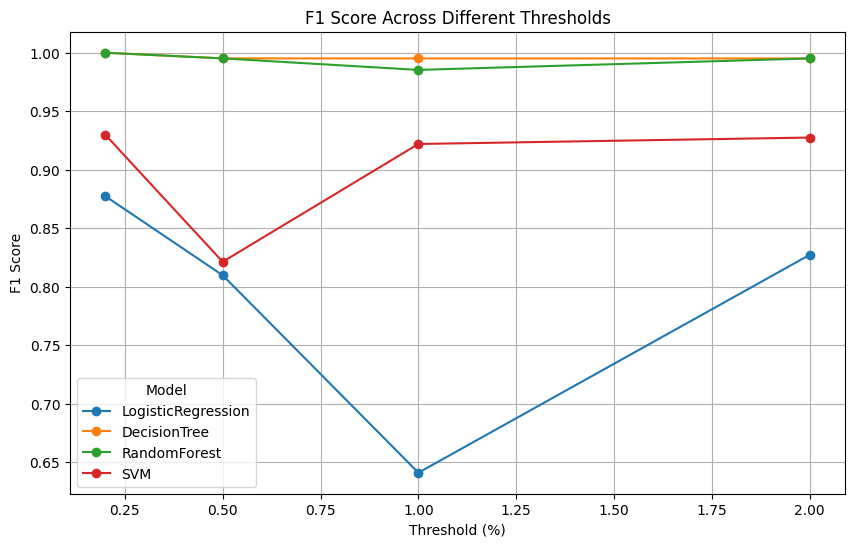

In [19]:
data = []
for model_name, thresholds_dict in results.items():
    for threshold, metrics in thresholds_dict.items():
        data.append([model_name, threshold * 100, metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1_score']])

results_df = pd.DataFrame(data, columns=['Model', 'Threshold (%)', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

def plot_metrics(df, metric):
    plt.figure(figsize=(10, 6))
    for model in df['Model'].unique():
        model_data = df[df['Model'] == model]
        plt.plot(model_data['Threshold (%)'], model_data[metric], marker='o', label=model)
    plt.title(f'{metric} Across Different Thresholds')
    plt.xlabel('Threshold (%)')
    plt.ylabel(metric)
    plt.legend(title='Model')
    plt.grid(True)
    plt.show()

for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plot_metrics(results_df, metric)

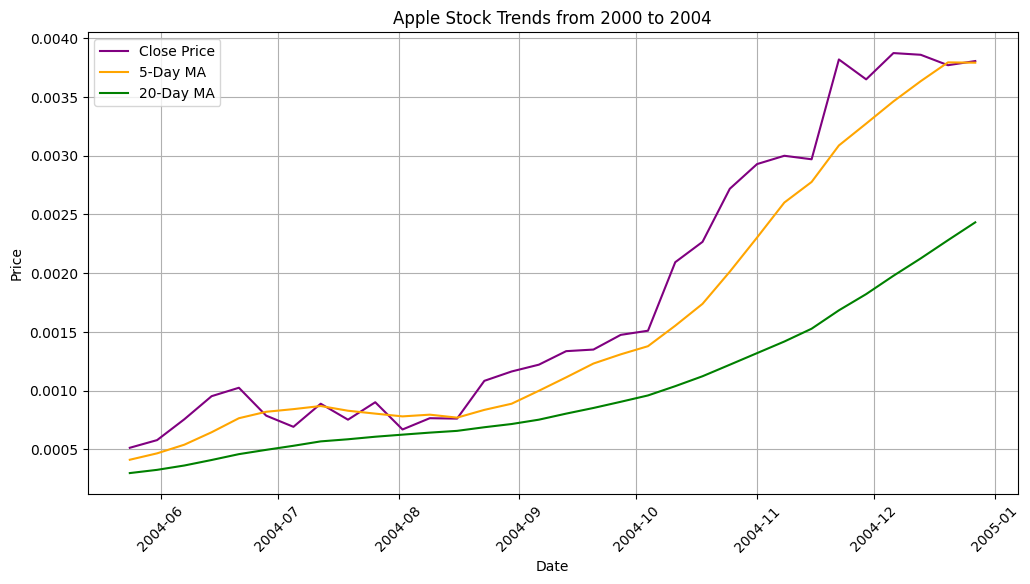

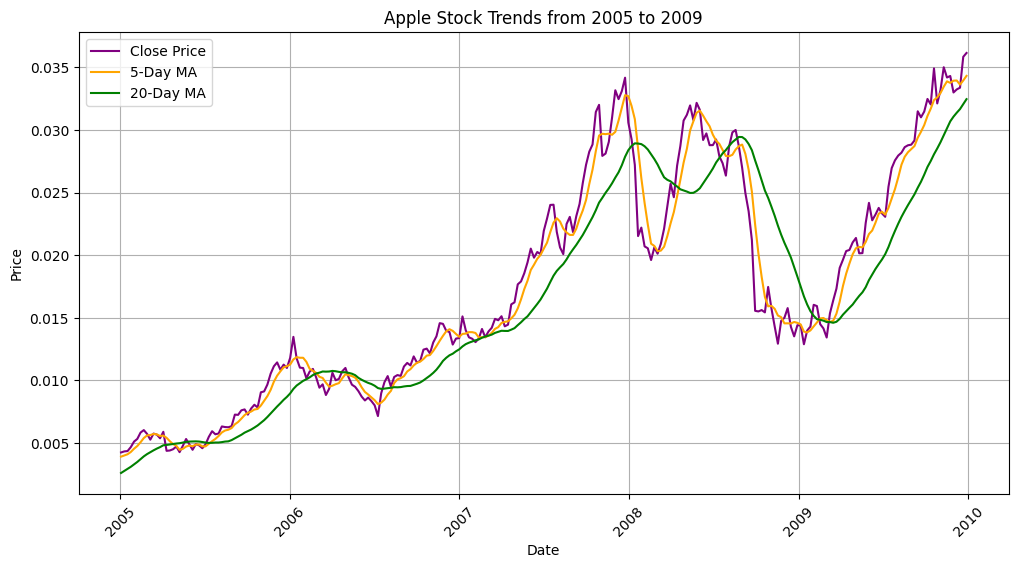

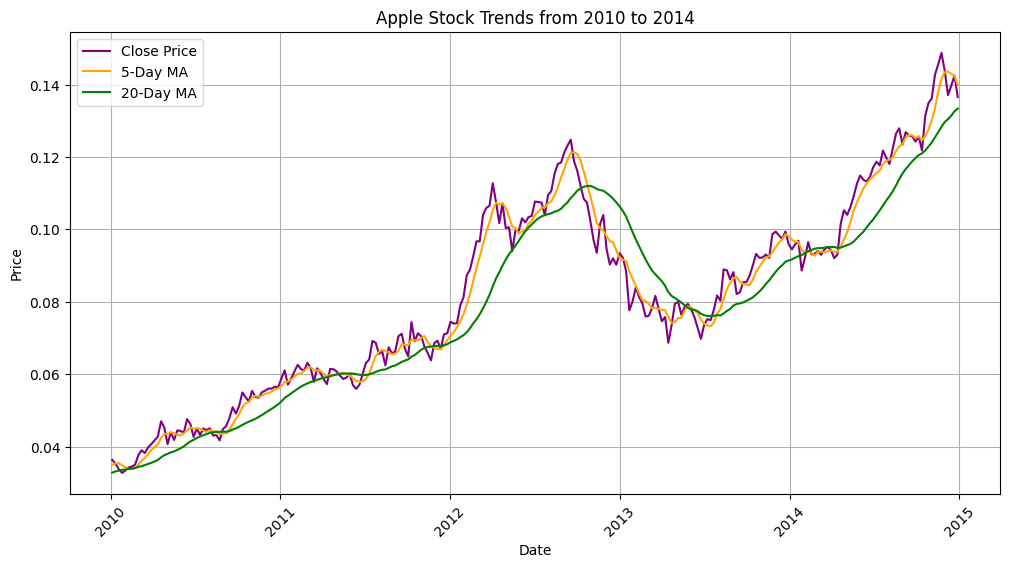

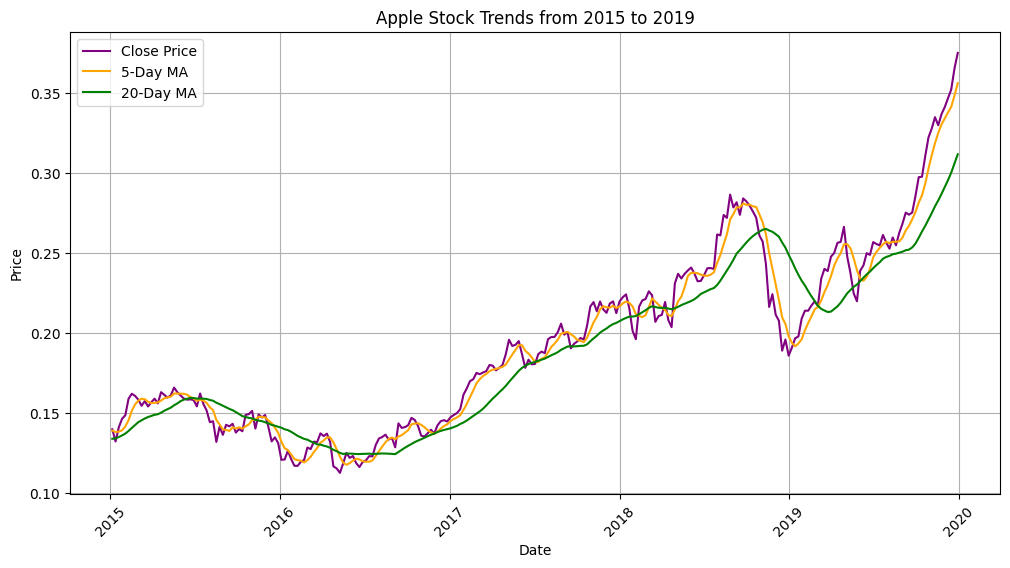

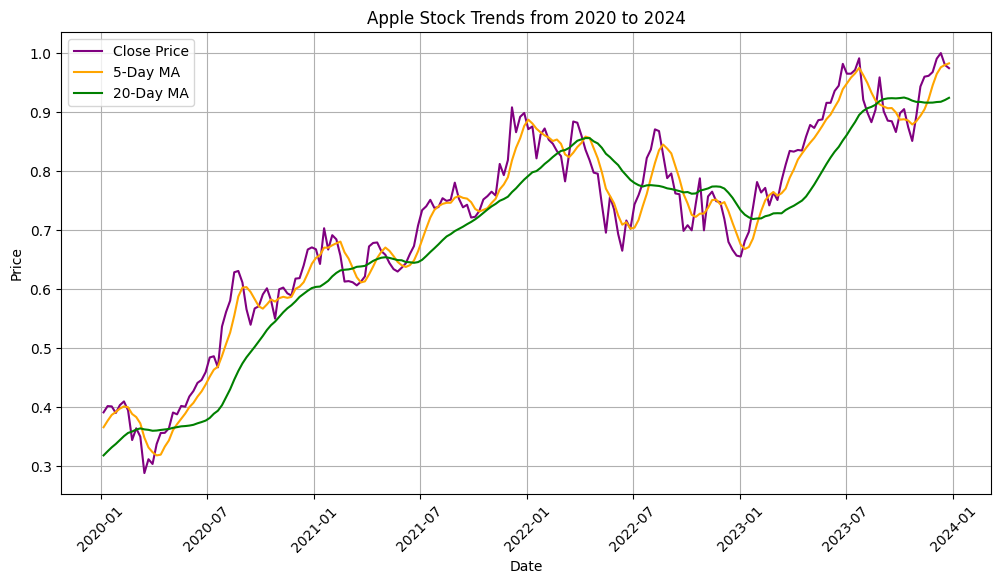

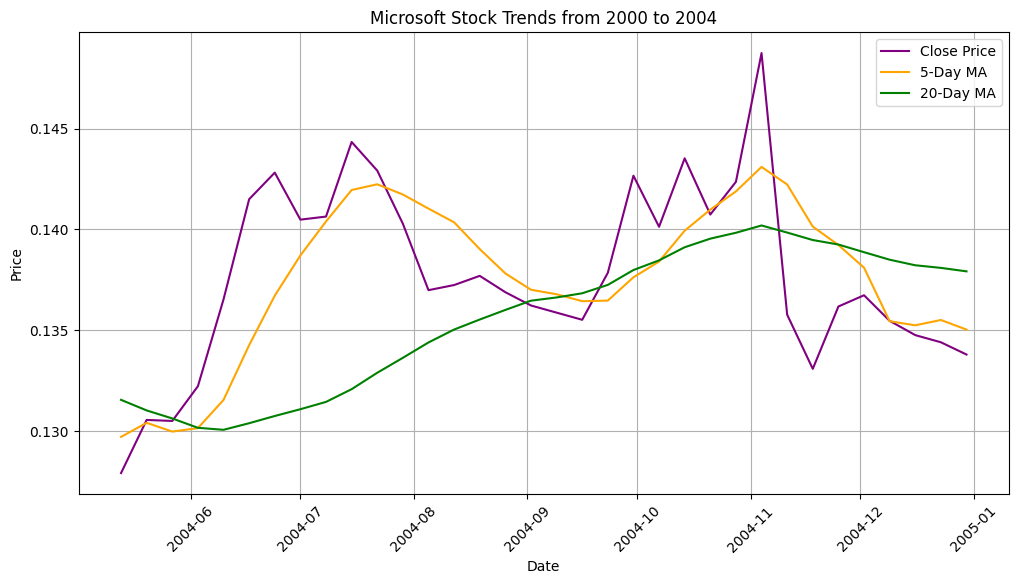

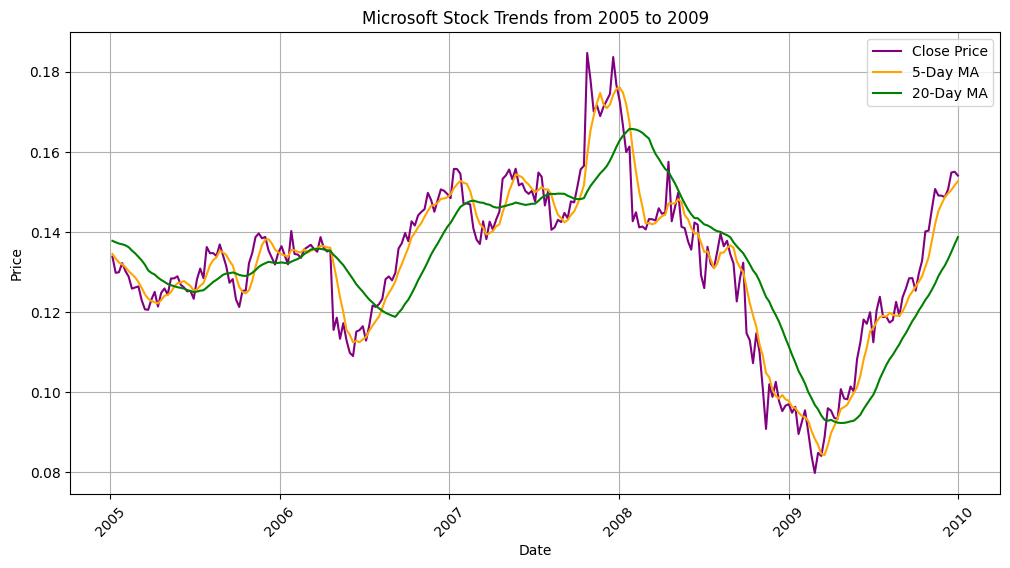

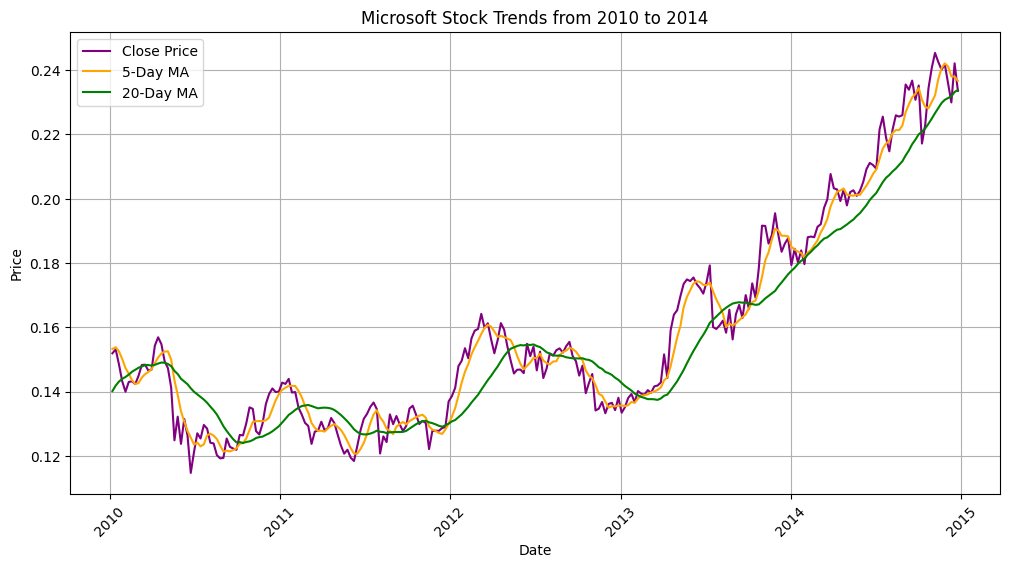

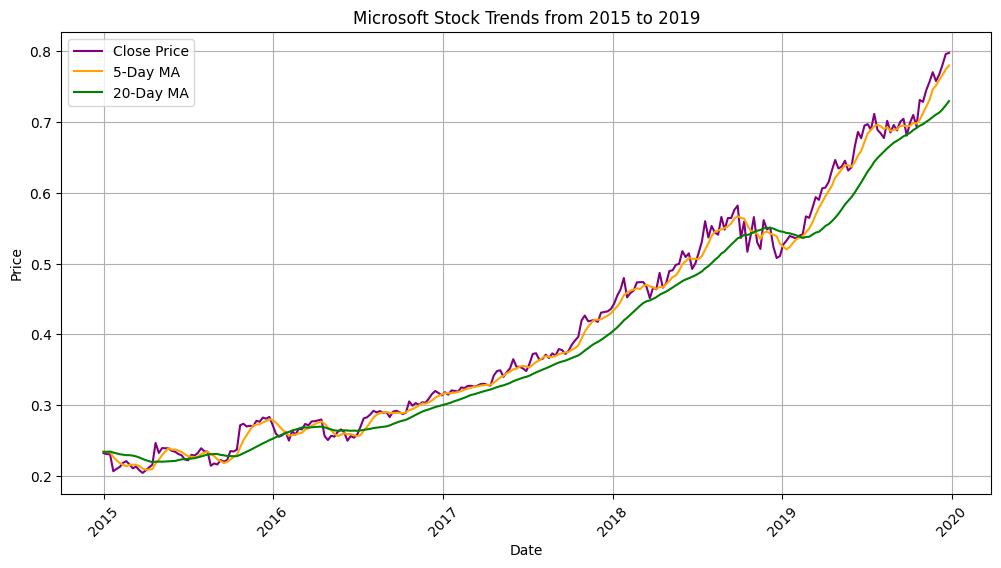

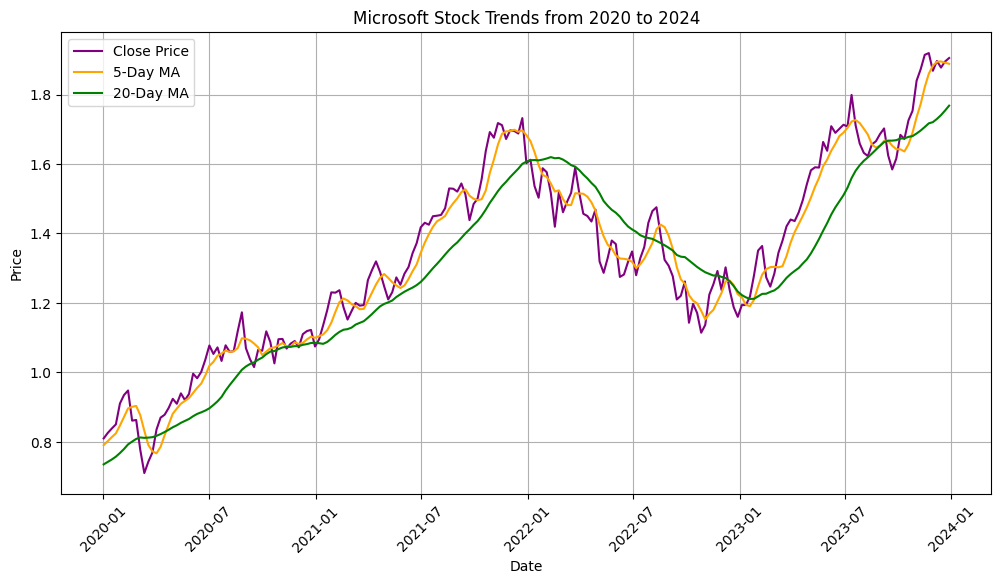

In [20]:
# plot key trends by 5-year intervals
def plot_trends_over_intervals(df, company_name):
    intervals = [(2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019), (2020, 2024)]

    for start, end in intervals:
        interval_df = df[(df['Date'].dt.year >= start) & (df['Date'].dt.year <= end)]

        plt.figure(figsize=(12, 6))
        plt.plot(interval_df['Date'], interval_df['Close'], label='Close Price', color='purple')
        plt.plot(interval_df['Date'], interval_df['5_Day_MA'], label='5-Day MA', color='orange')
        plt.plot(interval_df['Date'], interval_df['20_Day_MA'], label='20-Day MA', color='green')
        plt.title(f"{company_name} Stock Trends from {start} to {end}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()

plot_trends_over_intervals(apple_df, 'Apple')
plot_trends_over_intervals(microsoft_df, 'Microsoft')

In [21]:
# thresholds for high/average/low return classification
high_threshold = 0.005
low_threshold = -0.005

# classification
apple_df['Return_Class_High_Low_Avg'] = apple_df['Daily_Return'].apply(
    lambda x: 1 if x > high_threshold else (-1 if x < low_threshold else 0)
)

microsoft_df['Return_Class_High_Low_Avg'] = microsoft_df['Daily_Return'].apply(
    lambda x: 1 if x > high_threshold else (-1 if x < low_threshold else 0)
)

# train models using this classification
X_train, X_test, y_train, y_test = train_test_split(apple_df[features], apple_df['Return_Class_High_Low_Avg'], test_size=0.2, random_state=42)

# retrain and evaluate each model with the new classes
for model_name, model in models.items():
    model.set_params(**best_params[model_name])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{model_name} Performance with High/Low/Average Classes:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"  Recall: {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"  F1 Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")


LogisticRegression Performance with High/Low/Average Classes:
  Accuracy: 0.8634
  Precision: 0.7679
  Recall: 0.8634
  F1 Score: 0.8097

DecisionTree Performance with High/Low/Average Classes:
  Accuracy: 0.9951
  Precision: 0.9953
  Recall: 0.9951
  F1 Score: 0.9952

RandomForest Performance with High/Low/Average Classes:
  Accuracy: 0.9951
  Precision: 0.9953
  Recall: 0.9951
  F1 Score: 0.9952

SVM Performance with High/Low/Average Classes:
  Accuracy: 0.8780
  Precision: 0.7716
  Recall: 0.8780
  F1 Score: 0.8212


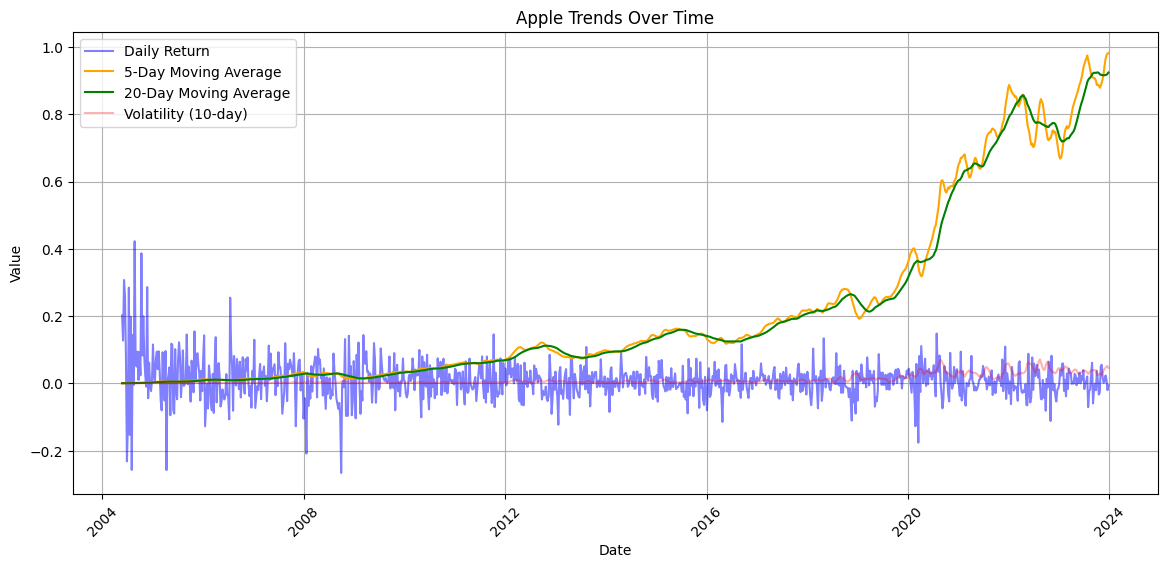

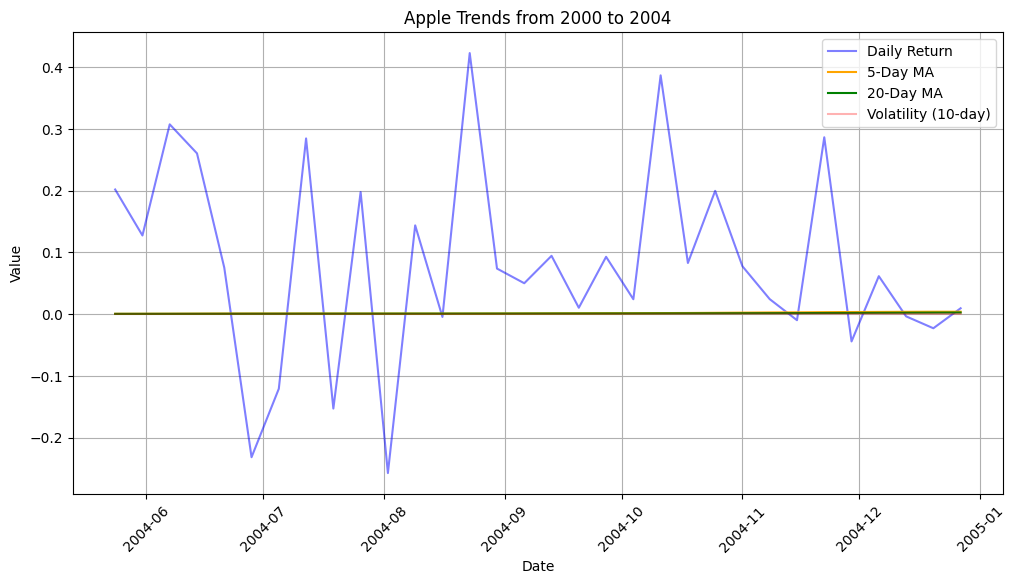

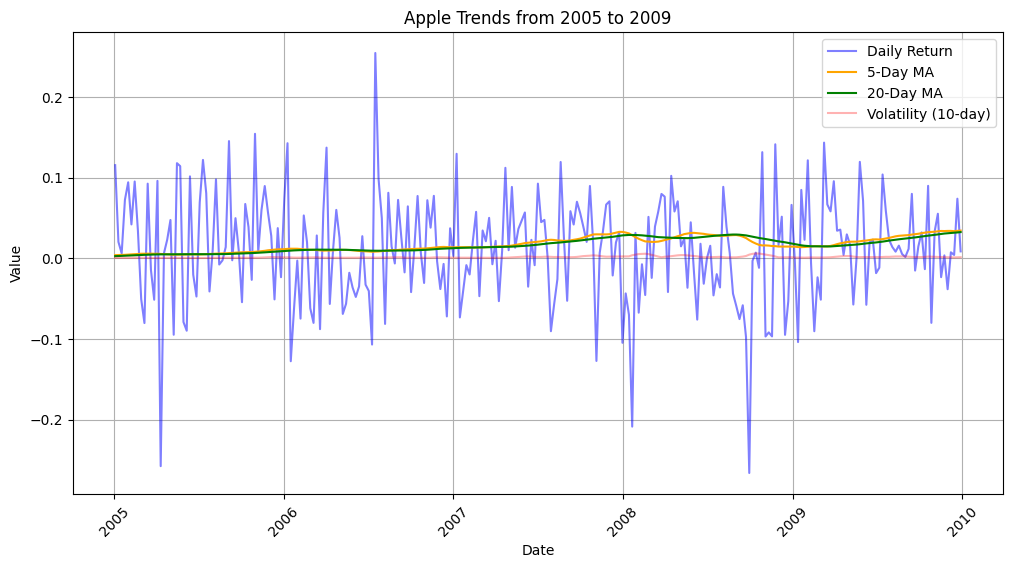

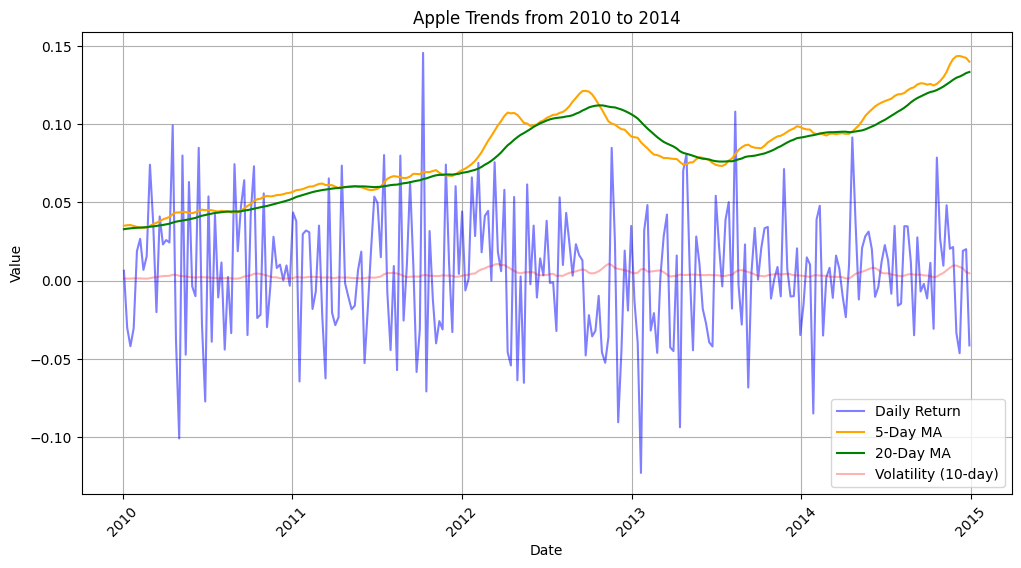

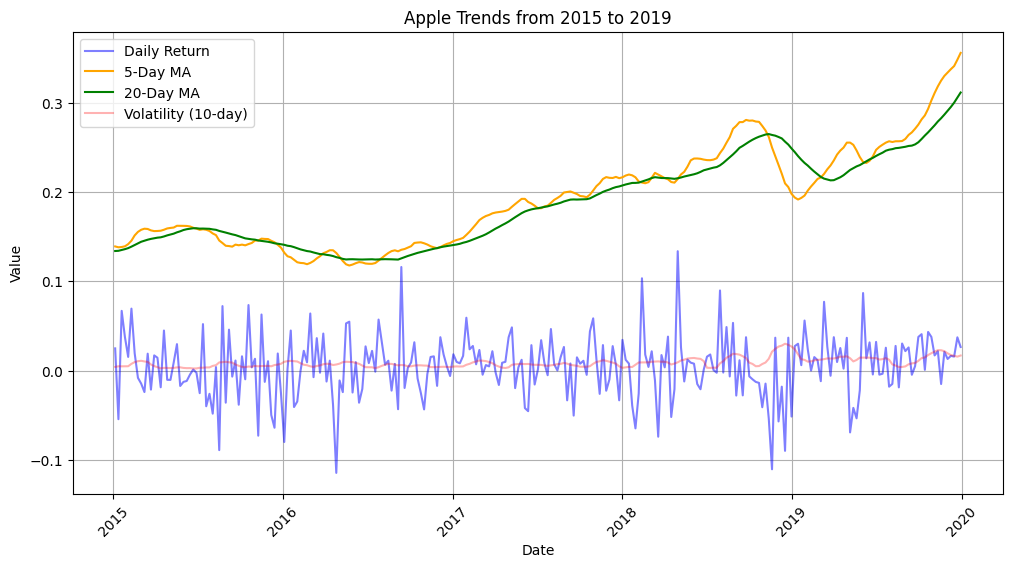

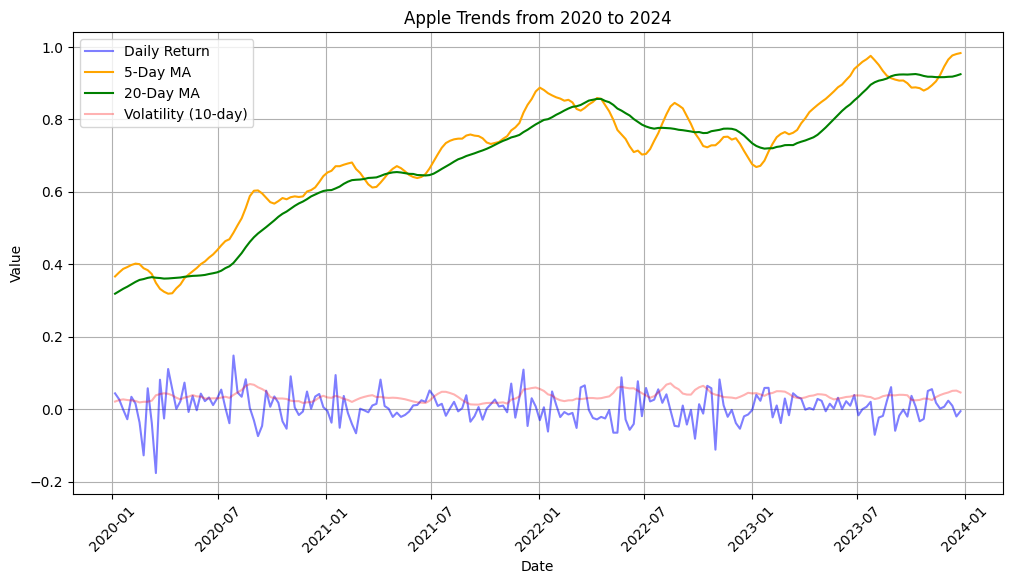

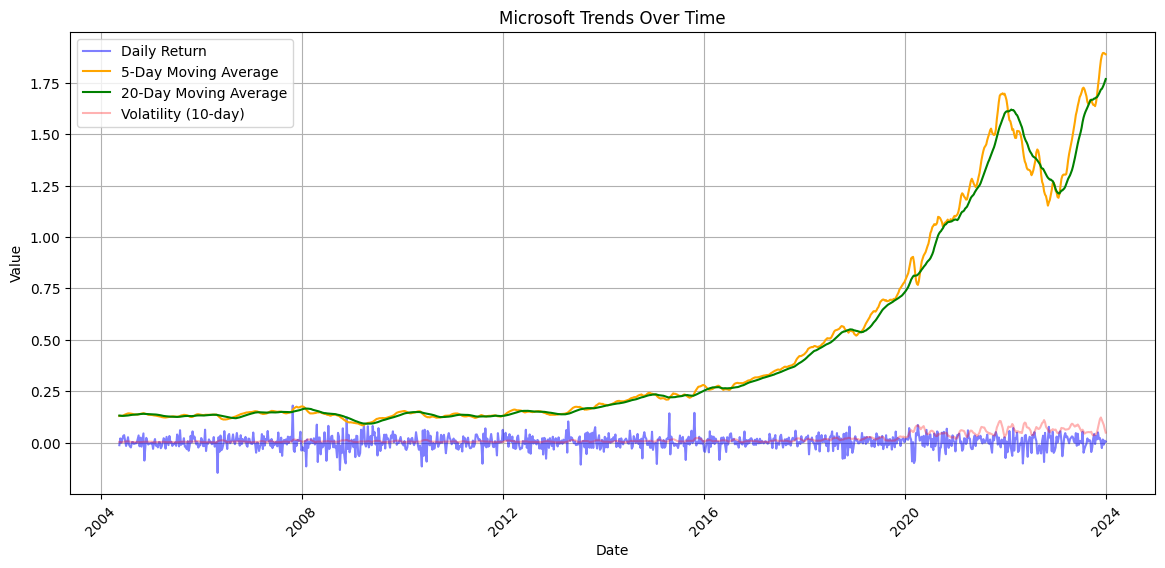

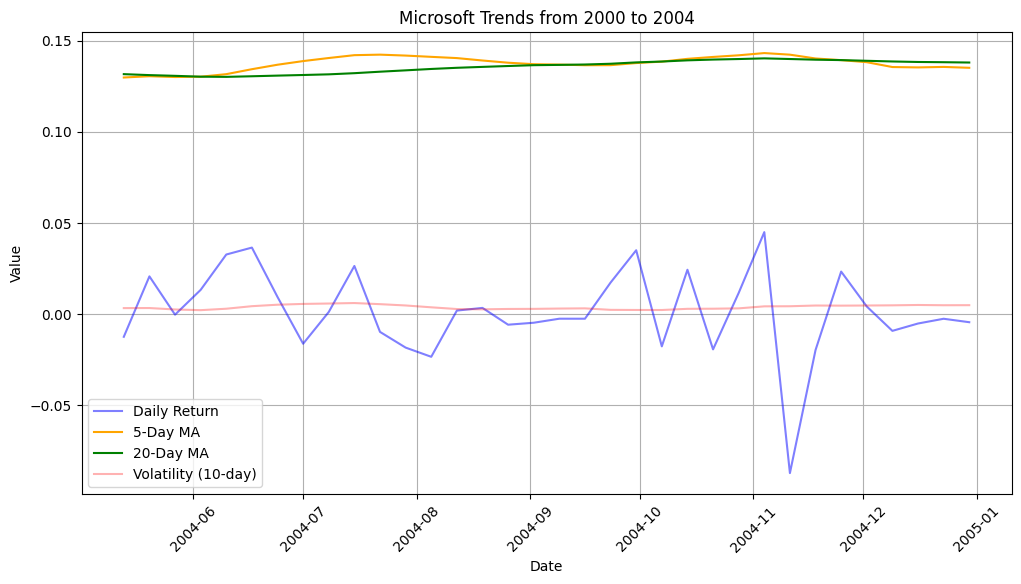

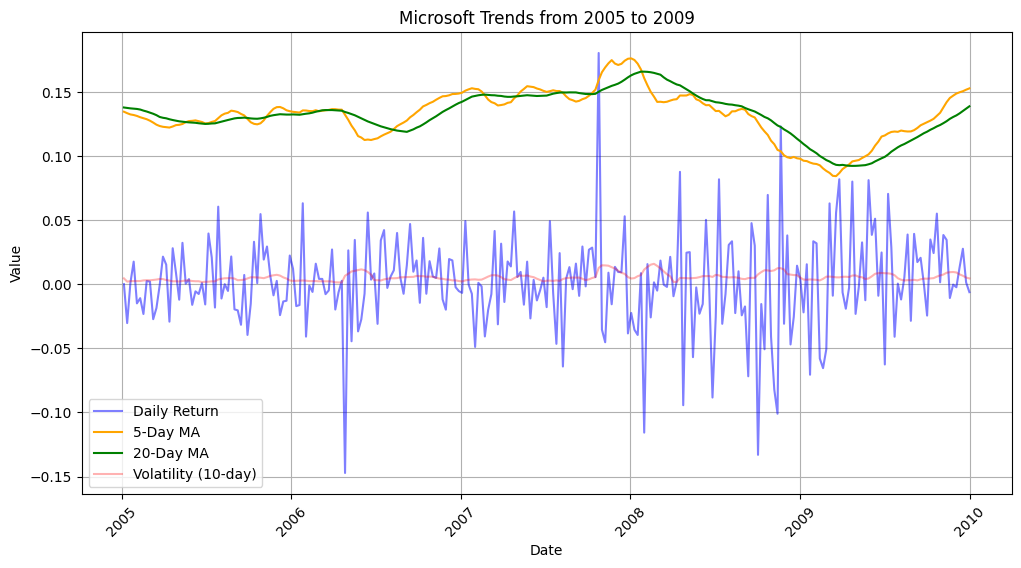

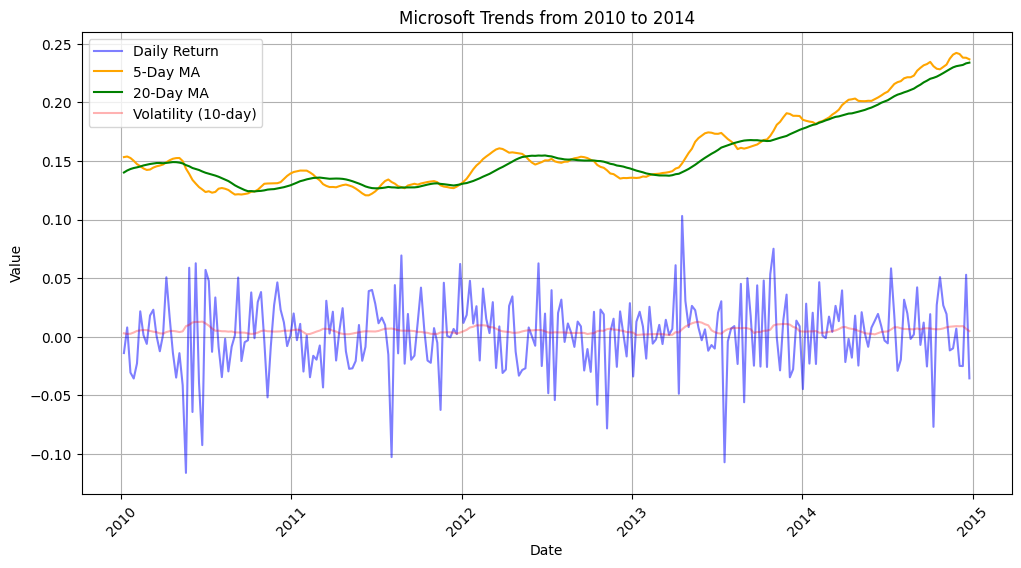

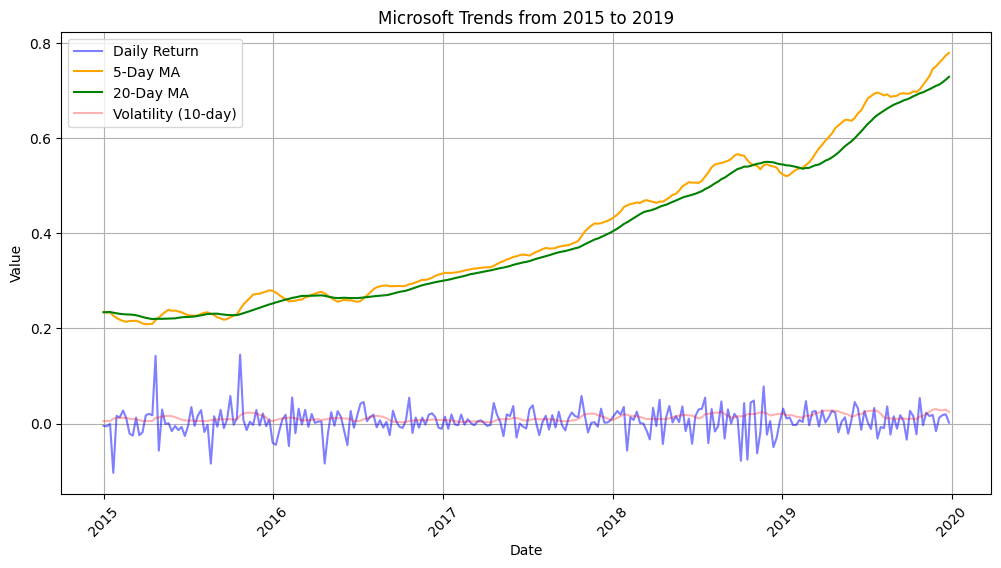

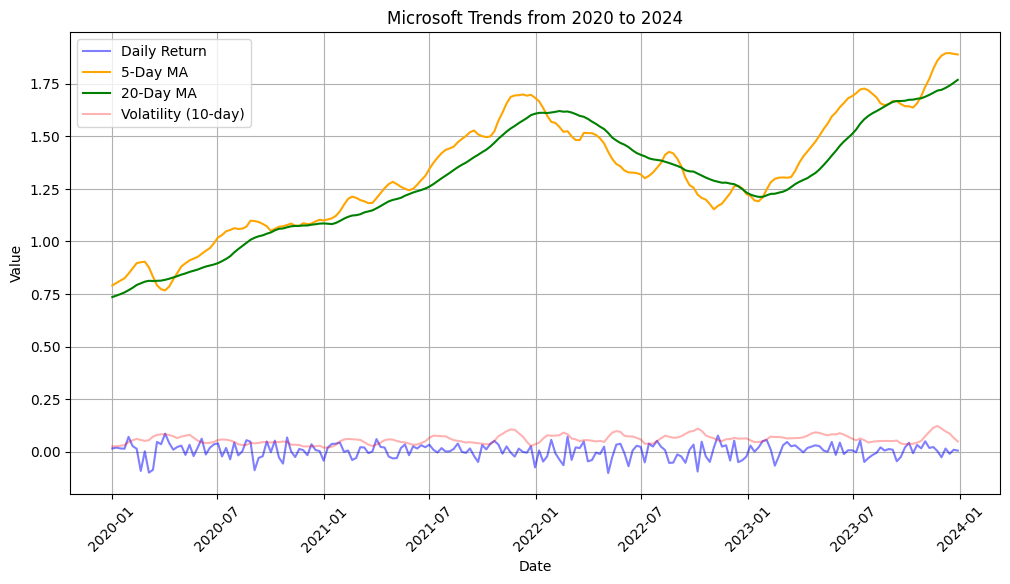

In [22]:
# plot trends across the entire dataset and specific intervals
def plot_full_and_intervals(df, company_name):
    # full dataset trend plot
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['Daily_Return'], label='Daily Return', color='blue', alpha=0.5)
    plt.plot(df['Date'], df['5_Day_MA'], label='5-Day Moving Average', color='orange')
    plt.plot(df['Date'], df['20_Day_MA'], label='20-Day Moving Average', color='green')
    plt.plot(df['Date'], df['Volatility'], label='Volatility (10-day)', color='red', alpha=0.3)
    plt.title(f"{company_name} Trends Over Time")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

    # plot by intervals
    intervals = [(2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019), (2020, 2024)]
    for start, end in intervals:
        interval_df = df[(df['Date'].dt.year >= start) & (df['Date'].dt.year <= end)]

        plt.figure(figsize=(12, 6))
        plt.plot(interval_df['Date'], interval_df['Daily_Return'], label='Daily Return', color='blue', alpha=0.5)
        plt.plot(interval_df['Date'], interval_df['5_Day_MA'], label='5-Day MA', color='orange')
        plt.plot(interval_df['Date'], interval_df['20_Day_MA'], label='20-Day MA', color='green')
        plt.plot(interval_df['Date'], interval_df['Volatility'], label='Volatility (10-day)', color='red', alpha=0.3)
        plt.title(f"{company_name} Trends from {start} to {end}")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()

plot_full_and_intervals(apple_df, 'Apple')
plot_full_and_intervals(microsoft_df, 'Microsoft')

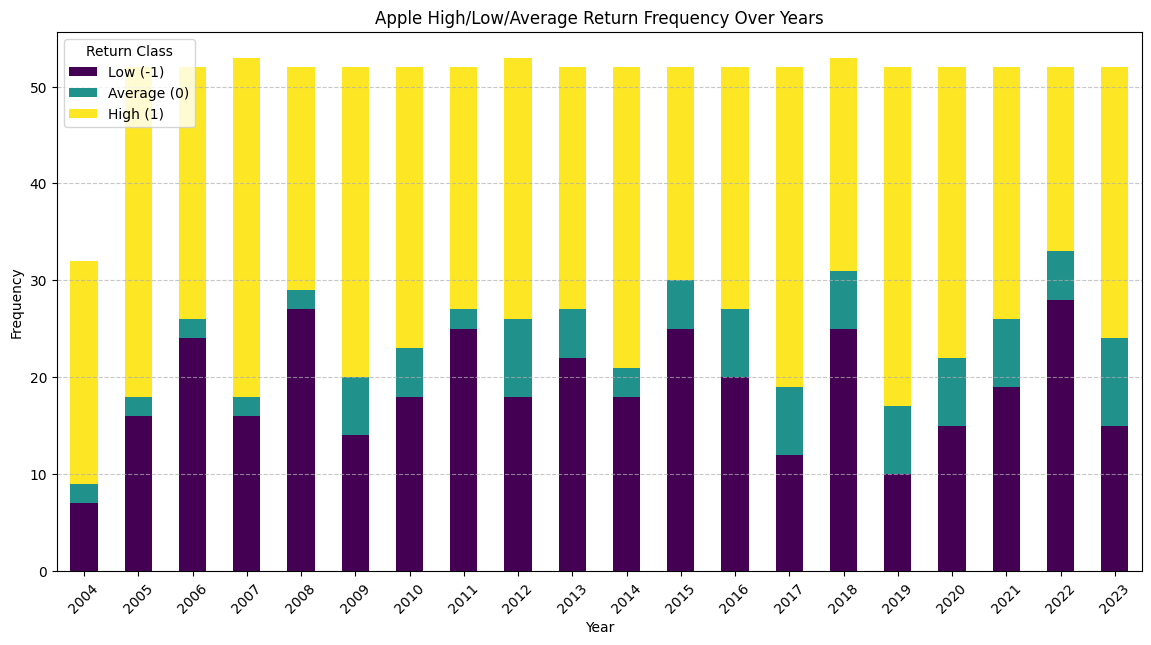

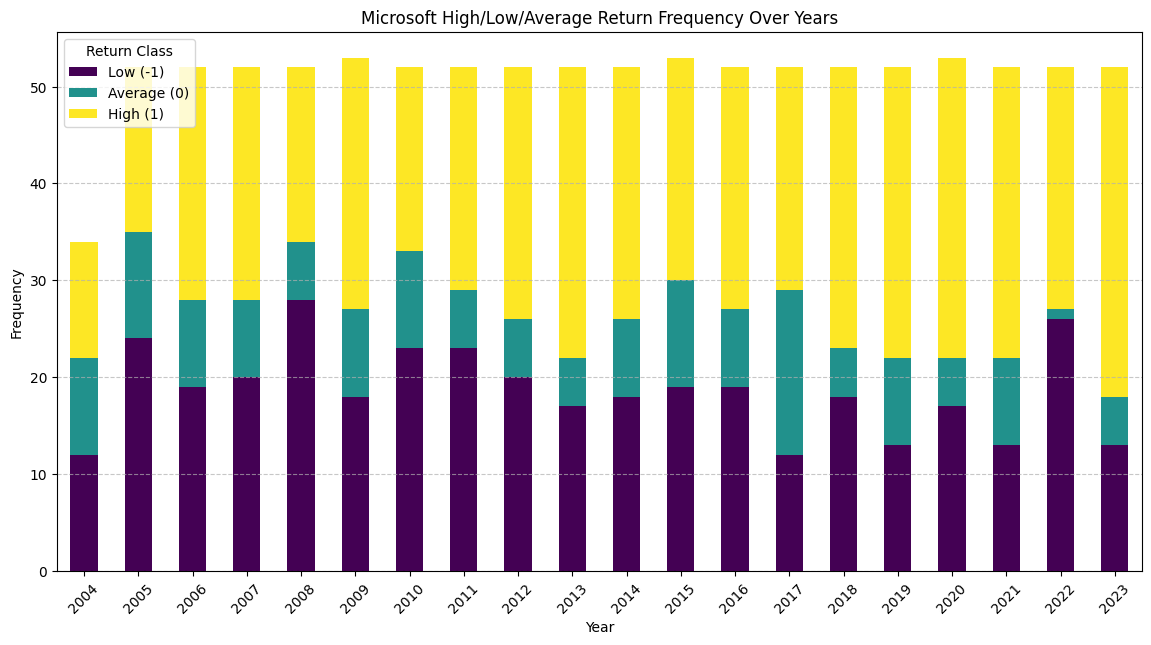

In [23]:
# visualize class frequencies over time
def plot_class_frequencies(df, company_name):
    # calc yearly counts for each class
    df['Year'] = df['Date'].dt.year
    class_counts = df.groupby(['Year', 'Return_Class_High_Low_Avg']).size().unstack(fill_value=0)

    # class frequency trends
    class_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap="viridis")
    plt.title(f"{company_name} High/Low/Average Return Frequency Over Years")
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    plt.legend(title='Return Class', labels=['Low (-1)', 'Average (0)', 'High (1)'])
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_class_frequencies(apple_df, 'Apple')
plot_class_frequencies(microsoft_df, 'Microsoft')

In [24]:
import numpy as np

# calculate descriptive statistics by interval
def descriptive_stats_by_interval(df, company_name):
    intervals = [(2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019), (2020, 2024)]
    stats_list = []

    for start, end in intervals:
        interval_df = df[(df['Date'].dt.year >= start) & (df['Date'].dt.year <= end)]

        # calc statistics
        stats = {
            'Interval': f"{start}-{end}",
            'Mean_Return': interval_df['Daily_Return'].mean(),
            'Median_Return': interval_df['Daily_Return'].median(),
            'Std_Return': interval_df['Daily_Return'].std(),
            'Range_Return': interval_df['Daily_Return'].max() - interval_df['Daily_Return'].min(),
            'Mean_Volatility': interval_df['Volatility'].mean(),
            'Std_Volatility': interval_df['Volatility'].std(),
            'Range_Volatility': interval_df['Volatility'].max() - interval_df['Volatility'].min(),
            'Mean_5_Day_MA': interval_df['5_Day_MA'].mean(),
            'Mean_20_Day_MA': interval_df['20_Day_MA'].mean()
        }
        stats_list.append(stats)

    stats_df = pd.DataFrame(stats_list)
    print(f"\n{company_name} Descriptive Statistics by Interval:\n", stats_df)

descriptive_stats_by_interval(apple_df, 'Apple')
descriptive_stats_by_interval(microsoft_df, 'Microsoft')


Apple Descriptive Statistics by Interval:
     Interval  Mean_Return  Median_Return  Std_Return  Range_Return  \
0  2000-2004     0.082570       0.074402    0.160729      0.680164   
1  2005-2009     0.010973       0.013897    0.067548      0.520942   
2  2010-2014     0.005929       0.007249    0.040727      0.268561   
3  2015-2019     0.004496       0.007042    0.035247      0.248555   
4  2020-2024     0.005485       0.004542    0.042068      0.324291   

   Mean_Volatility  Std_Volatility  Range_Volatility  Mean_5_Day_MA  \
0         0.000352        0.000239          0.000731       0.001596   
1         0.001499        0.001120          0.005643       0.017149   
2         0.003881        0.002122          0.009419       0.081163   
3         0.008898        0.005324          0.027734       0.192631   
4         0.035796        0.012257          0.058798       0.707370   

   Mean_20_Day_MA  
0        0.001006  
1        0.016276  
2        0.078186  
3        0.187236  
4       

In [25]:
from statsmodels.tsa.stattools import adfuller

# perform ADF test by interval
def adf_test_by_interval(df, company_name):
    intervals = [(2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019), (2020, 2024)]

    for start, end in intervals:
        interval_df = df[(df['Date'].dt.year >= start) & (df['Date'].dt.year <= end)]
        result = adfuller(interval_df['Daily_Return'].dropna())

        print(f"\n{company_name} ADF Test from {start} to {end}")
        print(f"ADF Statistic: {result[0]:.4f}")
        print(f"p-value: {result[1]:.4f}")
        for key, value in result[4].items():
            print(f'Critical Value ({key}): {value:.4f}')
        print("Stationary" if result[1] < 0.05 else "Non-stationary")

# ADF test for Apple and Microsoft
adf_test_by_interval(apple_df, 'Apple')
adf_test_by_interval(microsoft_df, 'Microsoft')


Apple ADF Test from 2000 to 2004
ADF Statistic: -2.3995
p-value: 0.1419
Critical Value (1%): -3.7377
Critical Value (5%): -2.9922
Critical Value (10%): -2.6357
Non-stationary

Apple ADF Test from 2005 to 2009
ADF Statistic: -15.5556
p-value: 0.0000
Critical Value (1%): -3.4558
Critical Value (5%): -2.8727
Critical Value (10%): -2.5727
Stationary

Apple ADF Test from 2010 to 2014
ADF Statistic: -13.2118
p-value: 0.0000
Critical Value (1%): -3.4559
Critical Value (5%): -2.8728
Critical Value (10%): -2.5728
Stationary

Apple ADF Test from 2015 to 2019
ADF Statistic: -10.1677
p-value: 0.0000
Critical Value (1%): -3.4559
Critical Value (5%): -2.8728
Critical Value (10%): -2.5728
Stationary

Apple ADF Test from 2020 to 2024
ADF Statistic: -14.8721
p-value: 0.0000
Critical Value (1%): -3.4623
Critical Value (5%): -2.8756
Critical Value (10%): -2.5743
Stationary

Microsoft ADF Test from 2000 to 2004
ADF Statistic: -3.7157
p-value: 0.0039
Critical Value (1%): -3.7112
Critical Value (5%): -2.98

In [26]:
# calculate correlations by interval
def correlation_by_interval(df, company_name):
    intervals = [(2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019), (2020, 2024)]

    for start, end in intervals:
        interval_df = df[(df['Date'].dt.year >= start) & (df['Date'].dt.year <= end)]
        corr_matrix = interval_df[['Daily_Return', '5_Day_MA', '20_Day_MA', 'Volatility']].corr()

        print(f"\n{company_name} Correlation Matrix from {start} to {end}:\n", corr_matrix)

# correlation analysis for Apple and Microsoft
correlation_by_interval(apple_df, 'Apple')
correlation_by_interval(microsoft_df, 'Microsoft')


Apple Correlation Matrix from 2000 to 2004:
               Daily_Return  5_Day_MA  20_Day_MA  Volatility
Daily_Return      1.000000 -0.146823  -0.148928   -0.091308
5_Day_MA         -0.146823  1.000000   0.989743    0.906845
20_Day_MA        -0.148928  0.989743   1.000000    0.850444
Volatility       -0.091308  0.906845   0.850444    1.000000

Apple Correlation Matrix from 2005 to 2009:
               Daily_Return  5_Day_MA  20_Day_MA  Volatility
Daily_Return      1.000000 -0.096464  -0.130847   -0.132772
5_Day_MA         -0.096464  1.000000   0.945929    0.540650
20_Day_MA        -0.130847  0.945929   1.000000    0.656450
Volatility       -0.132772  0.540650   0.656450    1.000000

Apple Correlation Matrix from 2010 to 2014:
               Daily_Return  5_Day_MA  20_Day_MA  Volatility
Daily_Return      1.000000 -0.059232  -0.083707   -0.025987
5_Day_MA         -0.059232  1.000000   0.971529    0.601216
20_Day_MA        -0.083707  0.971529   1.000000    0.570832
Volatility       -0.02

In [27]:
# adding 'Month' and 'Quarter' columns to each dataset for seasonal analysis
apple_df['Month'] = apple_df['Date'].dt.month
apple_df['Quarter'] = apple_df['Date'].dt.quarter

microsoft_df['Month'] = microsoft_df['Date'].dt.month
microsoft_df['Quarter'] = microsoft_df['Date'].dt.quarter

# calc monthly class frequencies
apple_monthly_counts = apple_df.groupby(['Month', 'Return_Class_High_Low_Avg']).size().unstack(fill_value=0)
microsoft_monthly_counts = microsoft_df.groupby(['Month', 'Return_Class_High_Low_Avg']).size().unstack(fill_value=0)

# calc quarterly class frequencies
apple_quarterly_counts = apple_df.groupby(['Quarter', 'Return_Class_High_Low_Avg']).size().unstack(fill_value=0)
microsoft_quarterly_counts = microsoft_df.groupby(['Quarter', 'Return_Class_High_Low_Avg']).size().unstack(fill_value=0)

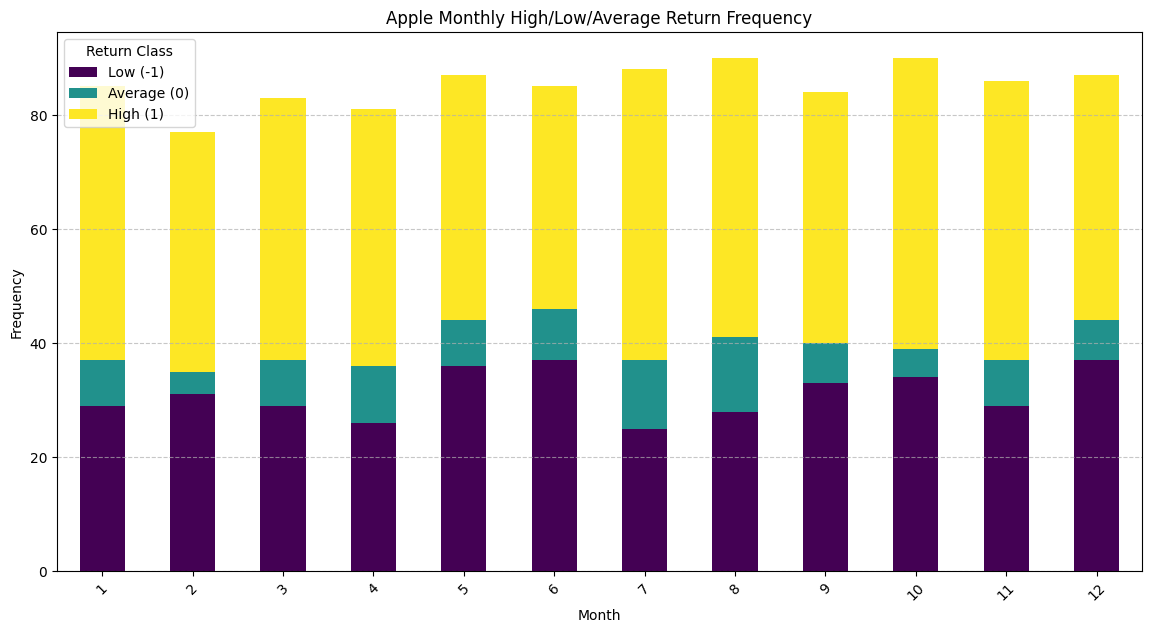

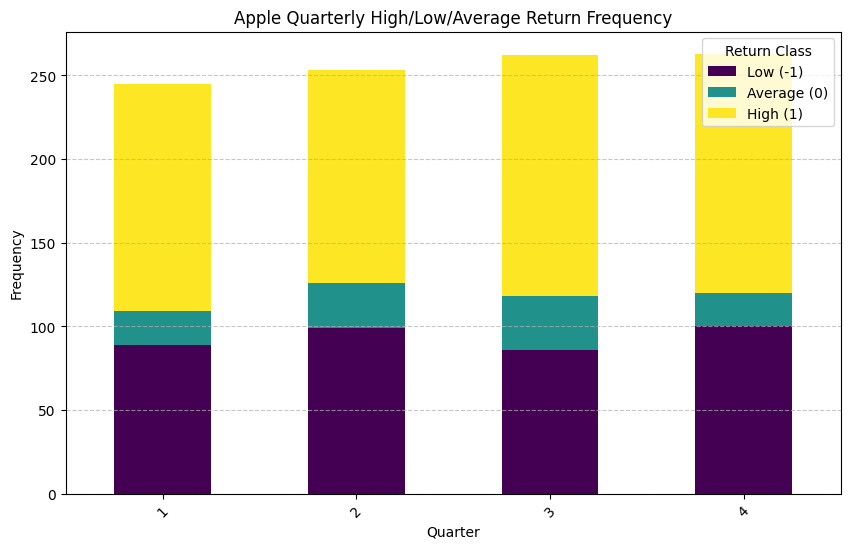

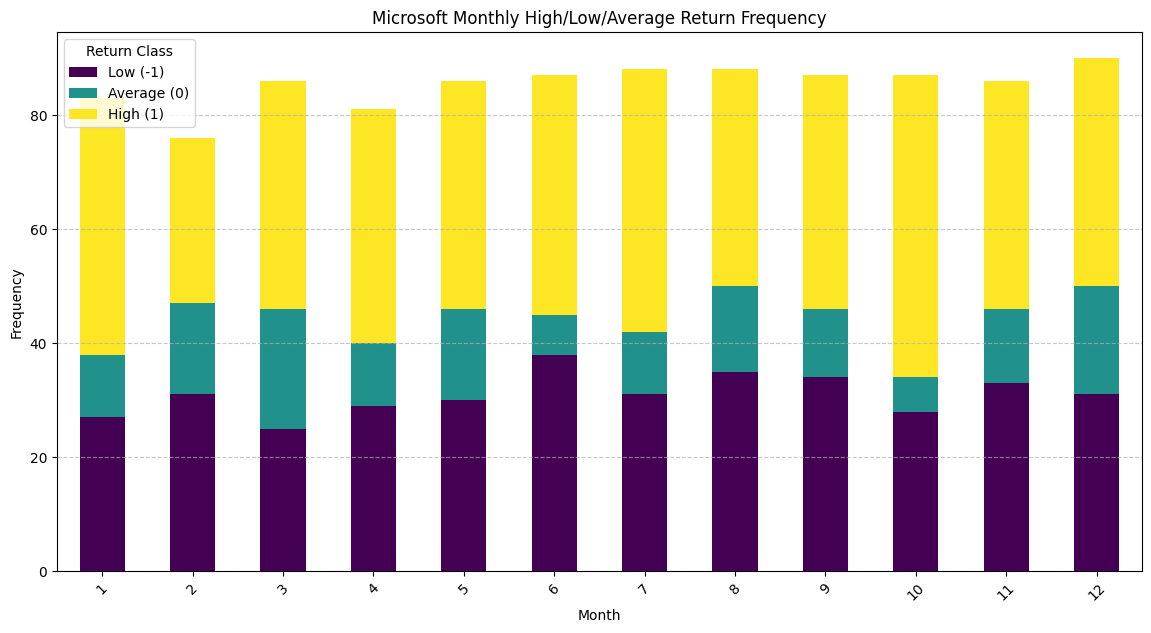

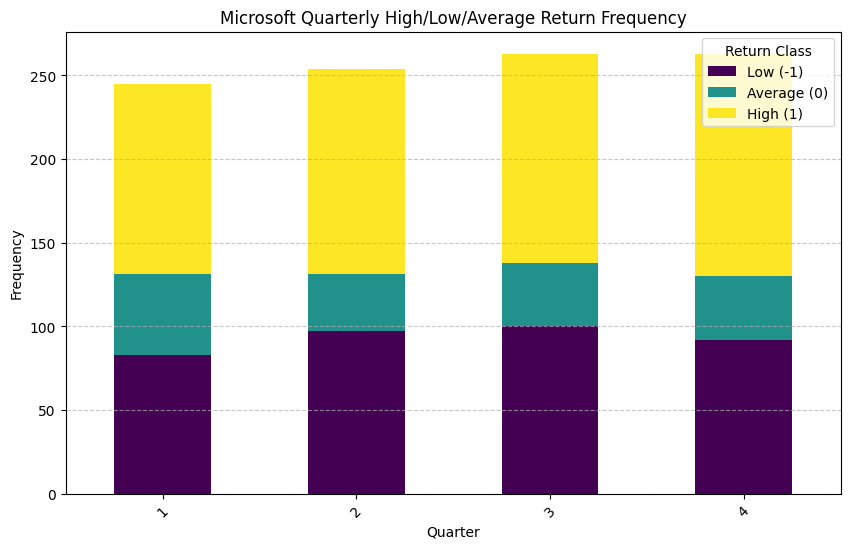

In [28]:
import matplotlib.pyplot as plt

# plot seasonal trends by month and quarter
def plot_seasonal_trends(monthly_counts, quarterly_counts, company_name):
    # monthly plot
    monthly_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap="viridis")
    plt.title(f"{company_name} Monthly High/Low/Average Return Frequency")
    plt.xlabel("Month")
    plt.ylabel("Frequency")
    plt.legend(title='Return Class', labels=['Low (-1)', 'Average (0)', 'High (1)'])
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # quarteryl plot
    quarterly_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
    plt.title(f"{company_name} Quarterly High/Low/Average Return Frequency")
    plt.xlabel("Quarter")
    plt.ylabel("Frequency")
    plt.legend(title='Return Class', labels=['Low (-1)', 'Average (0)', 'High (1)'])
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_seasonal_trends(apple_monthly_counts, apple_quarterly_counts, 'Apple')
plot_seasonal_trends(microsoft_monthly_counts, microsoft_quarterly_counts, 'Microsoft')

In [29]:
# filter data for specific months
selected_months = [1, 6, 9]

# create the filtered data for Apple and Microsoft
apple_specific_months = apple_df[apple_df['Month'].isin(selected_months)]
microsoft_specific_months = microsoft_df[microsoft_df['Month'].isin(selected_months)]

# group them by month and class for each company
apple_month_class_counts = apple_specific_months.groupby(['Month', 'Return_Class_High_Low_Avg']).size().unstack(fill_value=0)
microsoft_month_class_counts = microsoft_specific_months.groupby(['Month', 'Return_Class_High_Low_Avg']).size().unstack(fill_value=0)

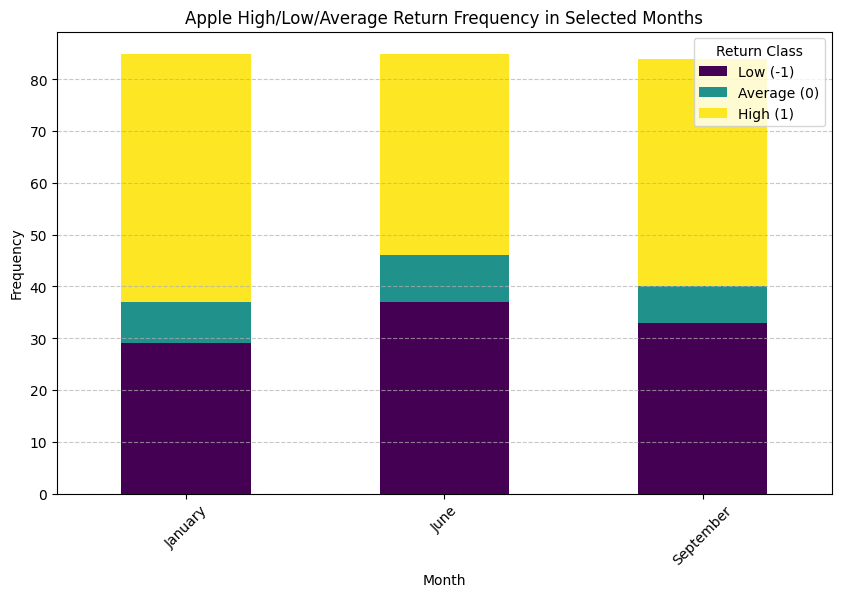

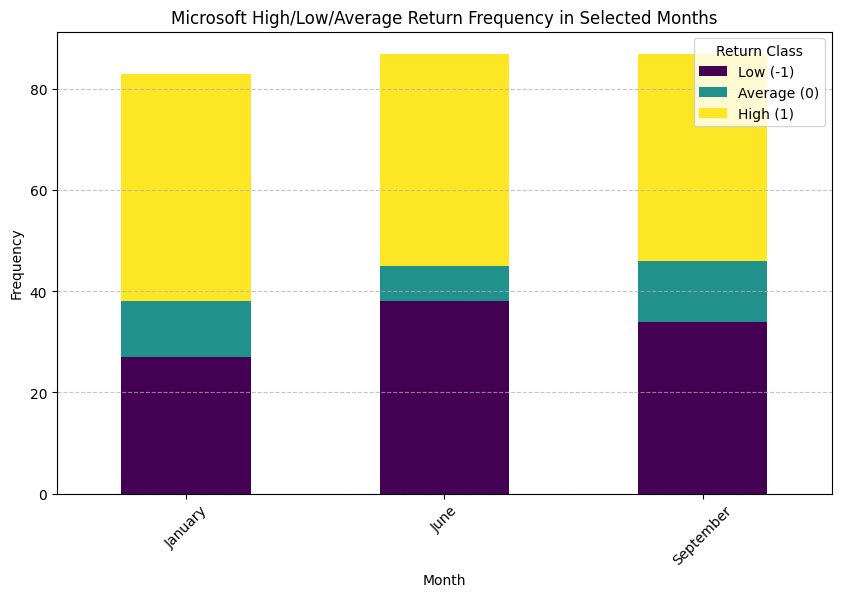

In [30]:
# plot class trends in specific months
def plot_class_trends_specific_months(class_counts, company_name):
    class_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
    plt.title(f"{company_name} High/Low/Average Return Frequency in Selected Months")
    plt.xlabel("Month")
    plt.ylabel("Frequency")
    plt.legend(title='Return Class', labels=['Low (-1)', 'Average (0)', 'High (1)'])
    plt.xticks(ticks=range(len(selected_months)), labels=['January', 'June', 'September'], rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_class_trends_specific_months(apple_month_class_counts, 'Apple')
plot_class_trends_specific_months(microsoft_month_class_counts, 'Microsoft')

In [31]:
# define custom thresholds for classes
low_threshold = -0.01  # -1%
high_threshold = 0.01  # +1%

# apply custom class thresholds to create a new class column
apple_df['Custom_Return_Class'] = apple_df['Daily_Return'].apply(
    lambda x: 1 if x > high_threshold else (-1 if x < low_threshold else 0)
)

microsoft_df['Custom_Return_Class'] = microsoft_df['Daily_Return'].apply(
    lambda x: 1 if x > high_threshold else (-1 if x < low_threshold else 0)
)

Apple Custom Class Distribution (%):
Custom_Return_Class
 1    47.018573
-1    32.746823
 0    20.234604
Name: proportion, dtype: float64

Microsoft Custom Class Distribution (%):
Custom_Return_Class
 1    41.463415
 0    29.463415
-1    29.073171
Name: proportion, dtype: float64


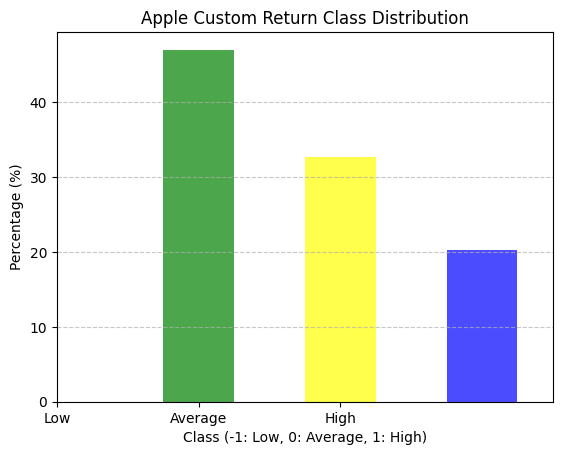

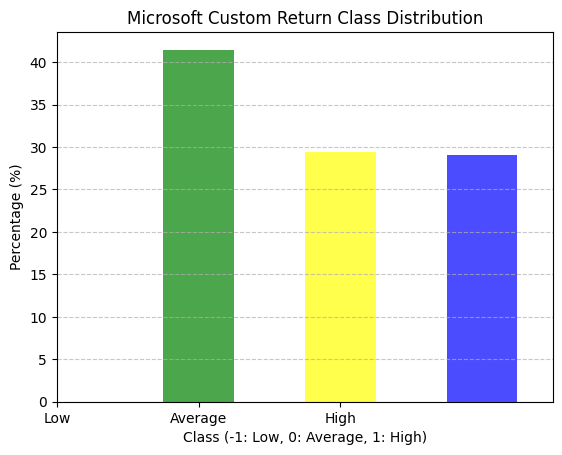

In [32]:
# calc class distribution for Apple and Microsoft
apple_class_distribution = apple_df['Custom_Return_Class'].value_counts(normalize=True) * 100
microsoft_class_distribution = microsoft_df['Custom_Return_Class'].value_counts(normalize=True) * 100

# class distributions
print("Apple Custom Class Distribution (%):")
print(apple_class_distribution)
print("\nMicrosoft Custom Class Distribution (%):")
print(microsoft_class_distribution)

# visualise class distribution
def plot_custom_class_distribution(distribution, company_name):
    distribution.plot(kind='bar', color=['green', 'yellow', 'blue'], alpha=0.7)
    plt.title(f"{company_name} Custom Return Class Distribution")
    plt.xlabel("Class (-1: Low, 0: Average, 1: High)")
    plt.ylabel("Percentage (%)")
    plt.xticks(ticks=[-1, 0, 1], labels=['Low', 'Average', 'High'], rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_custom_class_distribution(apple_class_distribution, 'Apple')
plot_custom_class_distribution(microsoft_class_distribution, 'Microsoft')

In [33]:
# define threshold combinations to test
threshold_combinations = [
    (-0.005, 0.005),  # ±0.5%
    (-0.01, 0.01),    # ±1%
    (-0.02, 0.02)     # ±2%
]

apple_distributions = {}
microsoft_distributions = {}

# loop over each threshold combination
for low_thresh, high_thresh in threshold_combinations:
    # custom class column for Apple dataset
    apple_df[f'Return_Class_{low_thresh}_{high_thresh}'] = apple_df['Daily_Return'].apply(
        lambda x: 1 if x > high_thresh else (-1 if x < low_thresh else 0)
    )

    # calc and store distribution for Apple
    apple_class_dist = apple_df[f'Return_Class_{low_thresh}_{high_thresh}'].value_counts(normalize=True) * 100
    apple_distributions[f'Low {low_thresh*100}%, High {high_thresh*100}%'] = apple_class_dist

    # create custom class column for Microsoft dataset
    microsoft_df[f'Return_Class_{low_thresh}_{high_thresh}'] = microsoft_df['Daily_Return'].apply(
        lambda x: 1 if x > high_thresh else (-1 if x < low_thresh else 0)
    )

    # calc and store distribution for Microsoft
    microsoft_class_dist = microsoft_df[f'Return_Class_{low_thresh}_{high_thresh}'].value_counts(normalize=True) * 100
    microsoft_distributions[f'Low {low_thresh*100}%, High {high_thresh*100}%'] = microsoft_class_dist

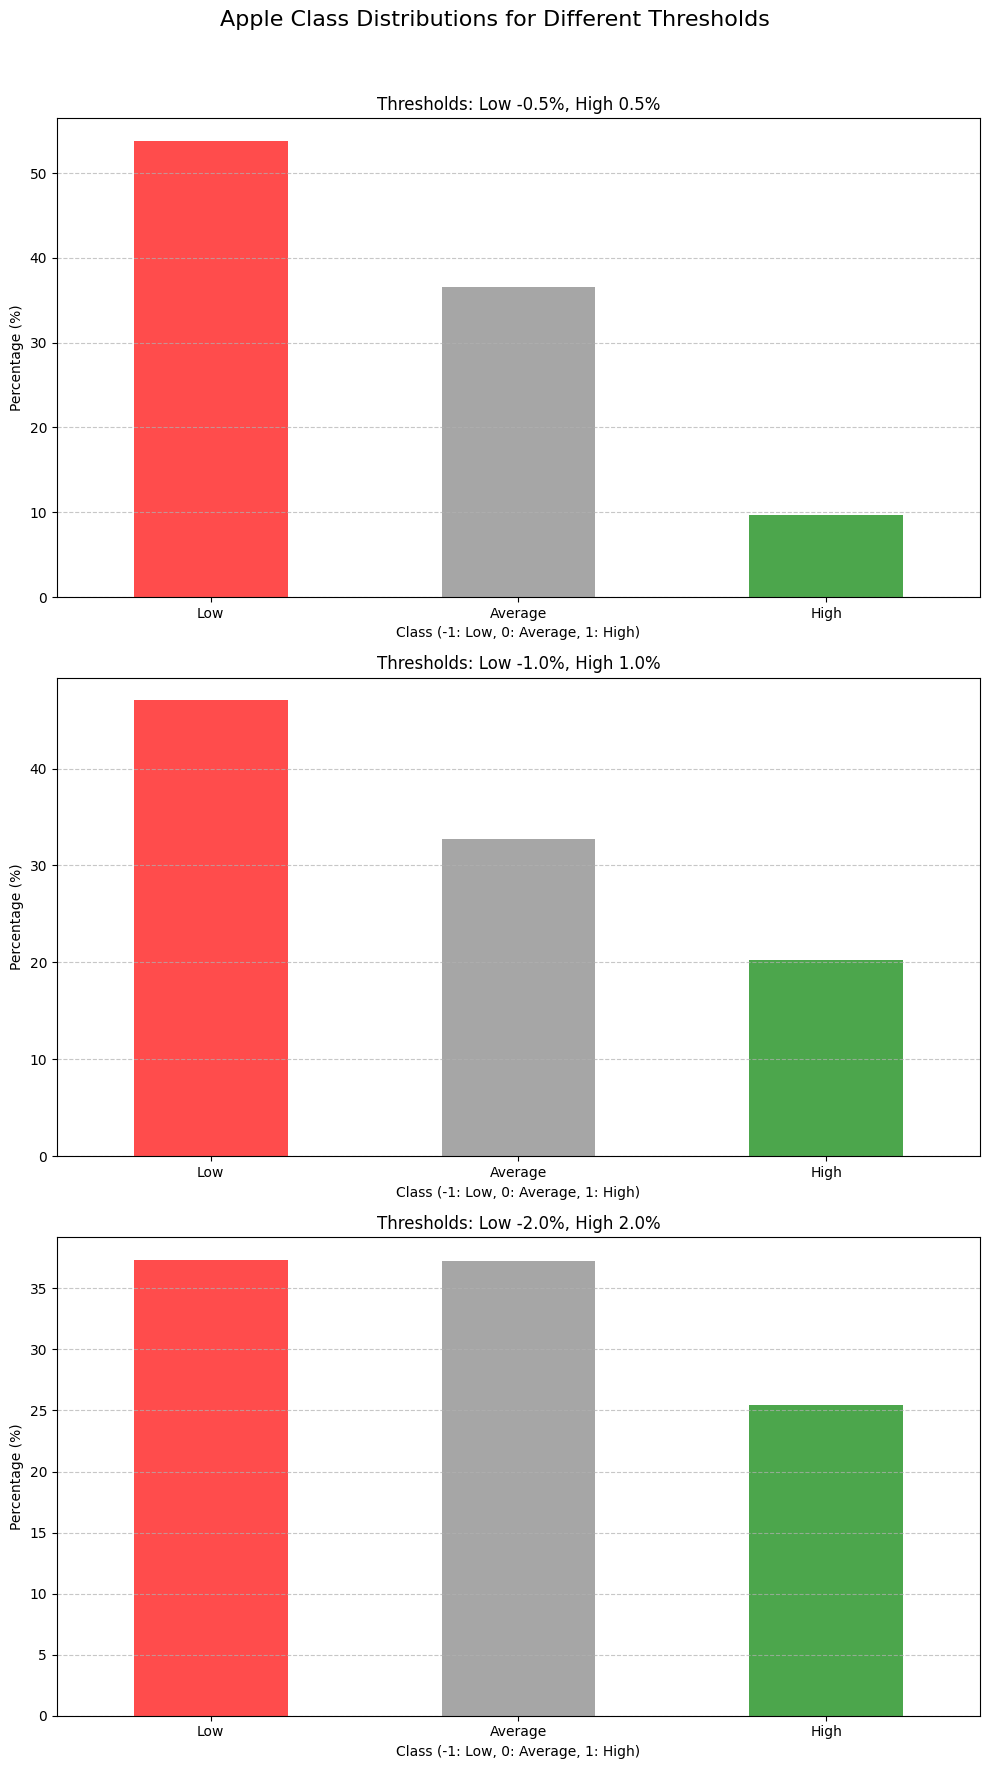

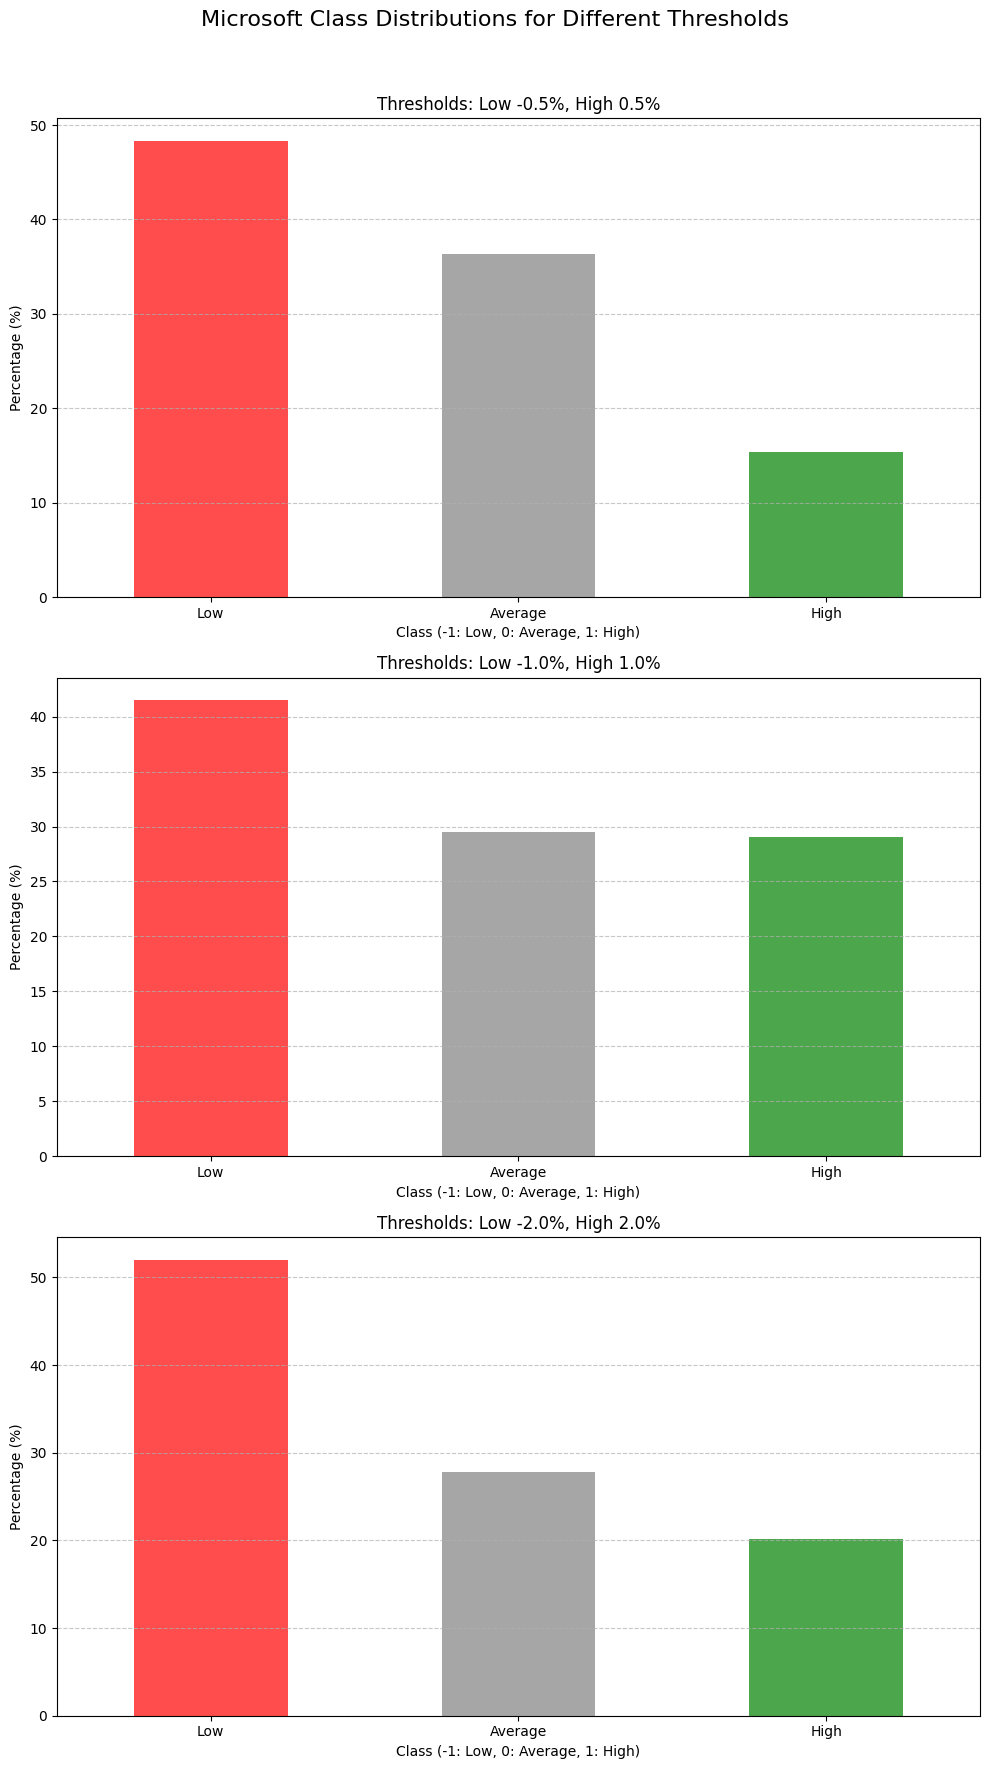

In [34]:
# plot multiple class distributions
def plot_threshold_distributions(distributions, company_name):
    fig, ax = plt.subplots(len(distributions), 1, figsize=(10, 18))
    fig.suptitle(f"{company_name} Class Distributions for Different Thresholds", fontsize=16)

    # plot threshold combination
    for i, (threshold, dist) in enumerate(distributions.items()):
        dist.plot(kind='bar', color=['red', 'gray', 'green'], alpha=0.7, ax=ax[i])
        ax[i].set_title(f"Thresholds: {threshold}")
        ax[i].set_xlabel("Class (-1: Low, 0: Average, 1: High)")
        ax[i].set_ylabel("Percentage (%)")
        ax[i].set_xticklabels(['Low', 'Average', 'High'], rotation=0)
        ax[i].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_threshold_distributions(apple_distributions, 'Apple')
plot_threshold_distributions(microsoft_distributions, 'Microsoft')

In [37]:
# define performance metrics dictionary to store metrics for both datasets
performance_metrics = {'Dataset': [], 'Model': [], 'Threshold': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# loop through each dataset
for dataset_name, dataset_df in [('Apple', apple_df), ('Microsoft', microsoft_df)]:
    # loop through each threshold combination
    for low_thresh, high_thresh in threshold_combinations:  # Changed from thresholds_to_test to threshold_combinations
        # apple thresholds to create class labels for each dataset
        dataset_df['Final_Class'] = dataset_df['Daily_Return'].apply(
            lambda x: 1 if x > high_thresh else (-1 if x < low_thresh else 0)
        )

        # prep training data
        X = dataset_df[features]
        y = dataset_df['Final_Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # test each model with the best hyperparameters found
        for model_name, model in models.items():
            model.set_params(**best_params[model_name])
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # calc metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

            # store results for each dataset and model
            performance_metrics['Dataset'].append(dataset_name)
            performance_metrics['Model'].append(model_name)
            performance_metrics['Threshold'].append(f'±{abs(low_thresh*100)}%')
            performance_metrics['Accuracy'].append(accuracy)
            performance_metrics['Precision'].append(precision)
            performance_metrics['Recall'].append(recall)
            performance_metrics['F1 Score'].append(f1)

# convert performance metrics to DataFrame for easy comparison
performance_df = pd.DataFrame(performance_metrics)

print(performance_df)

      Dataset               Model Threshold  Accuracy  Precision    Recall  \
0       Apple  LogisticRegression     ±0.5%  0.863415   0.767864  0.863415   
1       Apple        DecisionTree     ±0.5%  0.995122   0.995310  0.995122   
2       Apple        RandomForest     ±0.5%  0.995122   0.995310  0.995122   
3       Apple                 SVM     ±0.5%  0.878049   0.771586  0.878049   
4       Apple  LogisticRegression     ±1.0%  0.746341   0.564961  0.746341   
5       Apple        DecisionTree     ±1.0%  0.995122   0.995197  0.995122   
6       Apple        RandomForest     ±1.0%  0.980488   0.981636  0.980488   
7       Apple                 SVM     ±1.0%  0.921951   0.922030  0.921951   
8       Apple  LogisticRegression     ±2.0%  0.829268   0.838396  0.829268   
9       Apple        DecisionTree     ±2.0%  0.995122   0.995181  0.995122   
10      Apple        RandomForest     ±2.0%  0.995122   0.995181  0.995122   
11      Apple                 SVM     ±2.0%  0.926829   0.938144

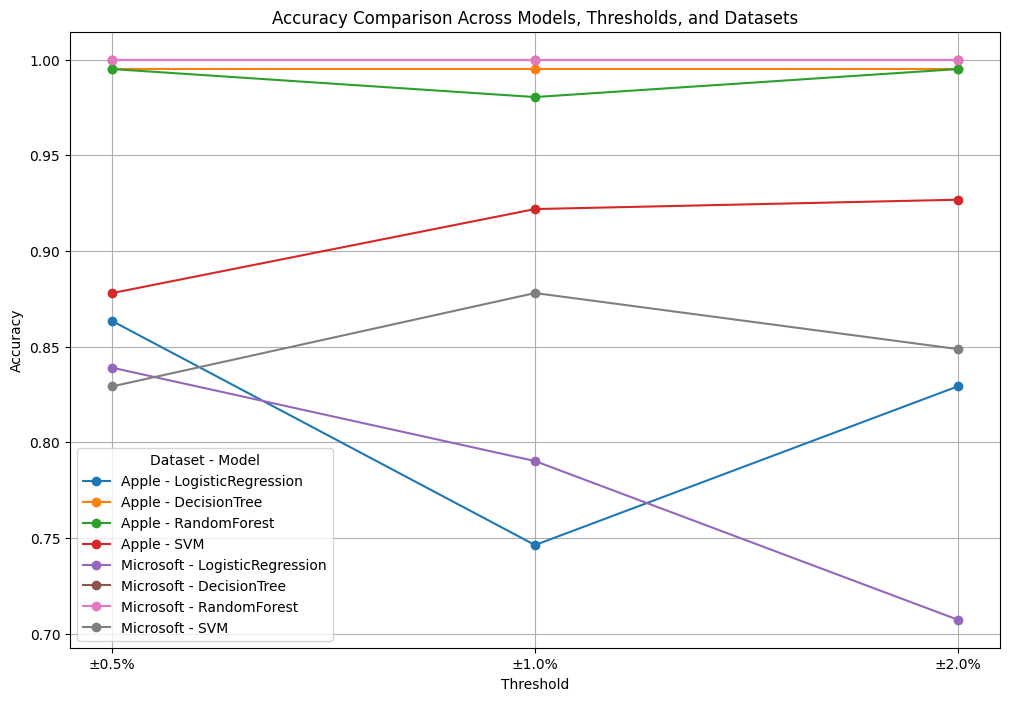

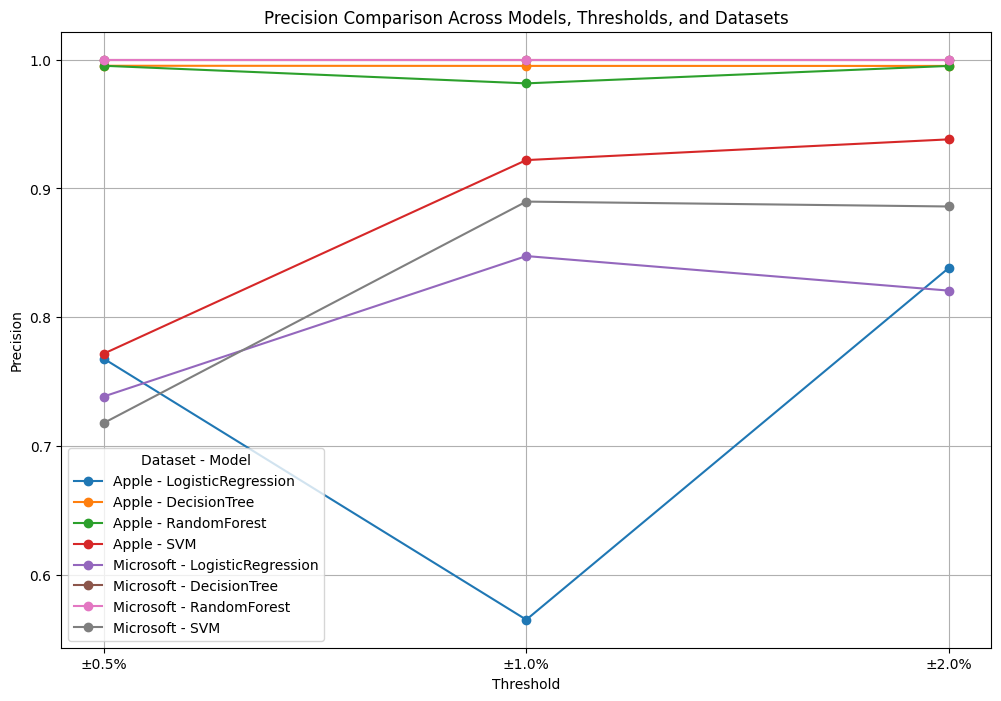

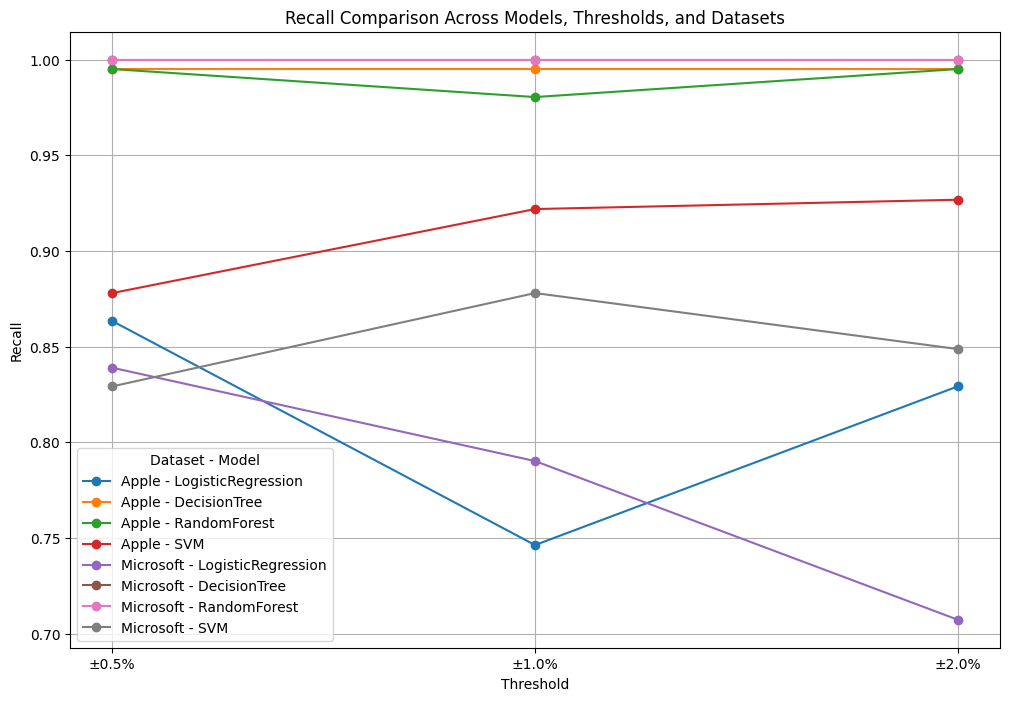

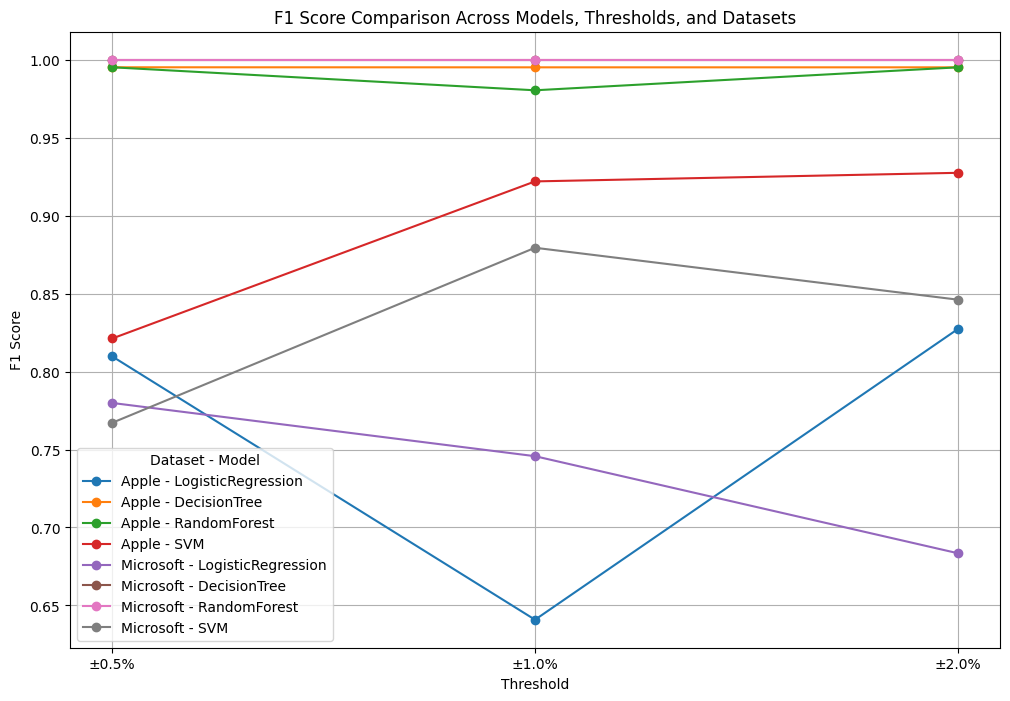

In [38]:
# plotting function to include both datasets in the visualization
def plot_model_performance(performance_df, metric):
    thresholds = performance_df['Threshold'].unique()
    datasets = performance_df['Dataset'].unique()

    plt.figure(figsize=(12, 8))

    # plot each models performance metric across thresholds for both datasets
    for dataset in datasets:
        dataset_df = performance_df[performance_df['Dataset'] == dataset]
        for model in dataset_df['Model'].unique():
            model_data = dataset_df[dataset_df['Model'] == model]
            plt.plot(model_data['Threshold'], model_data[metric], marker='o', label=f"{dataset} - {model}")

    plt.title(f'{metric} Comparison Across Models, Thresholds, and Datasets')
    plt.xlabel('Threshold')
    plt.ylabel(metric)
    plt.legend(title='Dataset - Model')
    plt.grid(True)
    plt.show()

# plot each metric accuracy, precision, recall, F1 Score
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plot_model_performance(performance_df, metric)

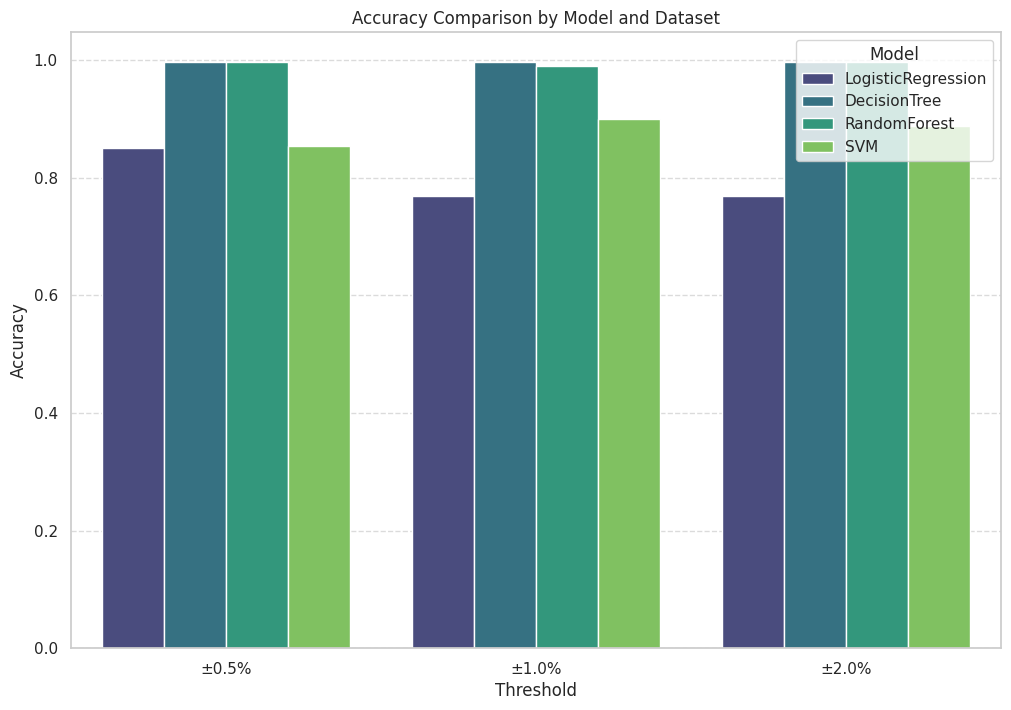

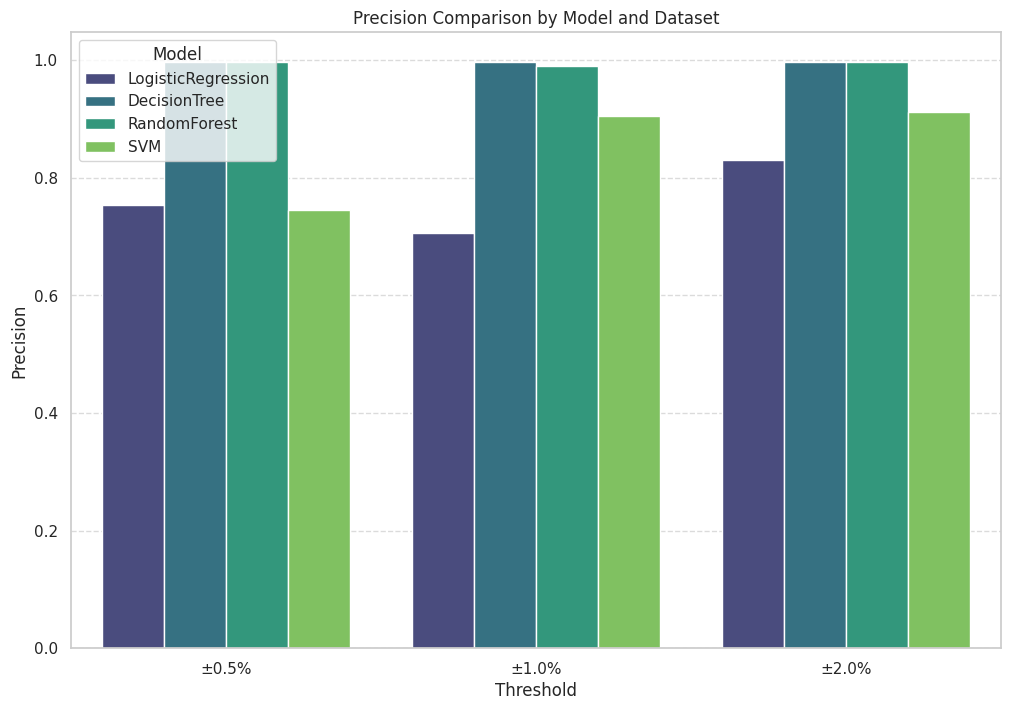

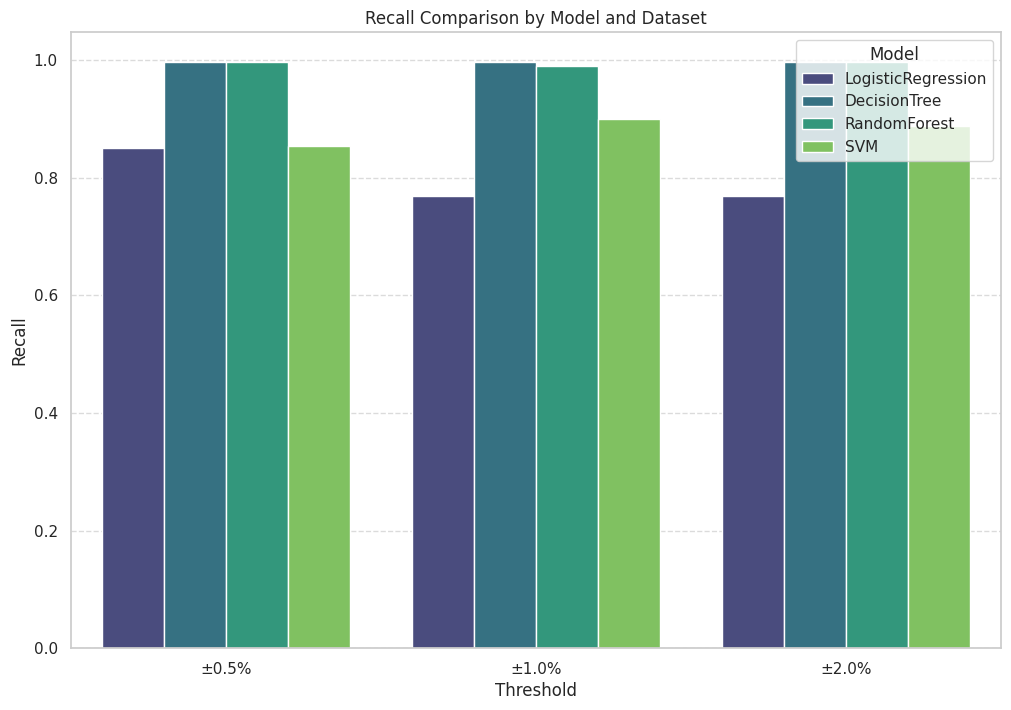

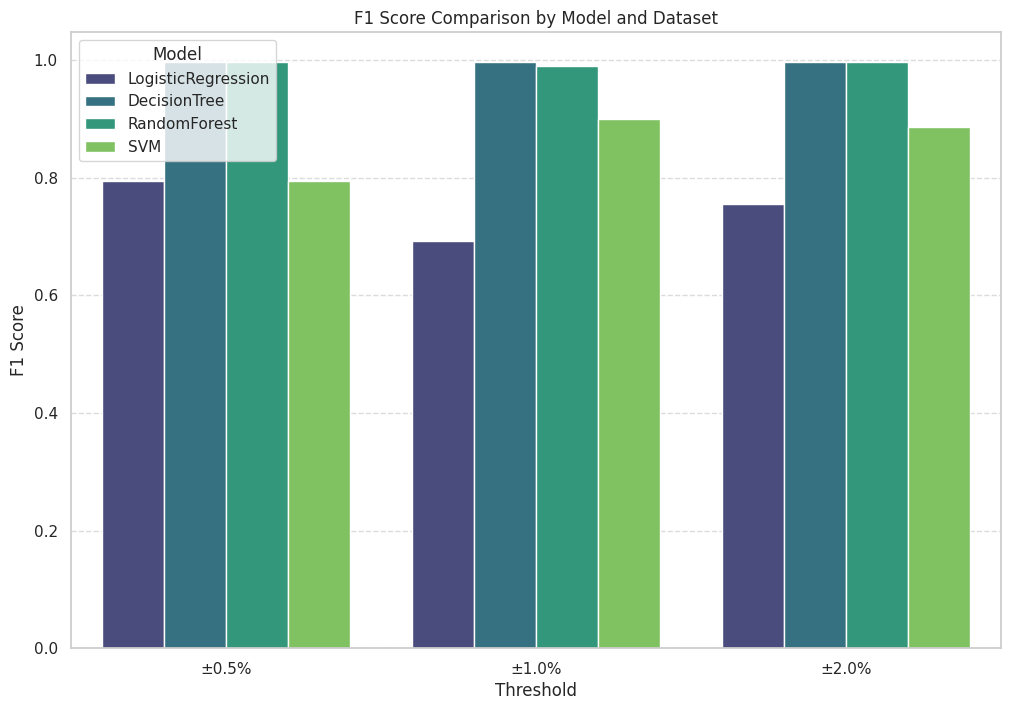

In [40]:
import seaborn as sns

# set seaborn style and use a standard palette
sns.set(style="whitegrid")
palette = "viridis"  # Standard palette name instead of ListedColormap

# create comparison plots for each metric
def plot_metric_comparison(performance_df, metric):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=performance_df, x="Threshold", y=metric, hue="Model", errorbar=None, palette=palette)
    plt.title(f"{metric} Comparison by Model and Dataset")
    plt.xlabel("Threshold")
    plt.ylabel(metric)
    plt.legend(title="Model")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plot_metric_comparison(performance_df, metric)

<ipython-input-41-69acce7f233b>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=performance_df, x="Threshold", y=metric, hue="Model", ci=None, palette="viridis", dodge=True)


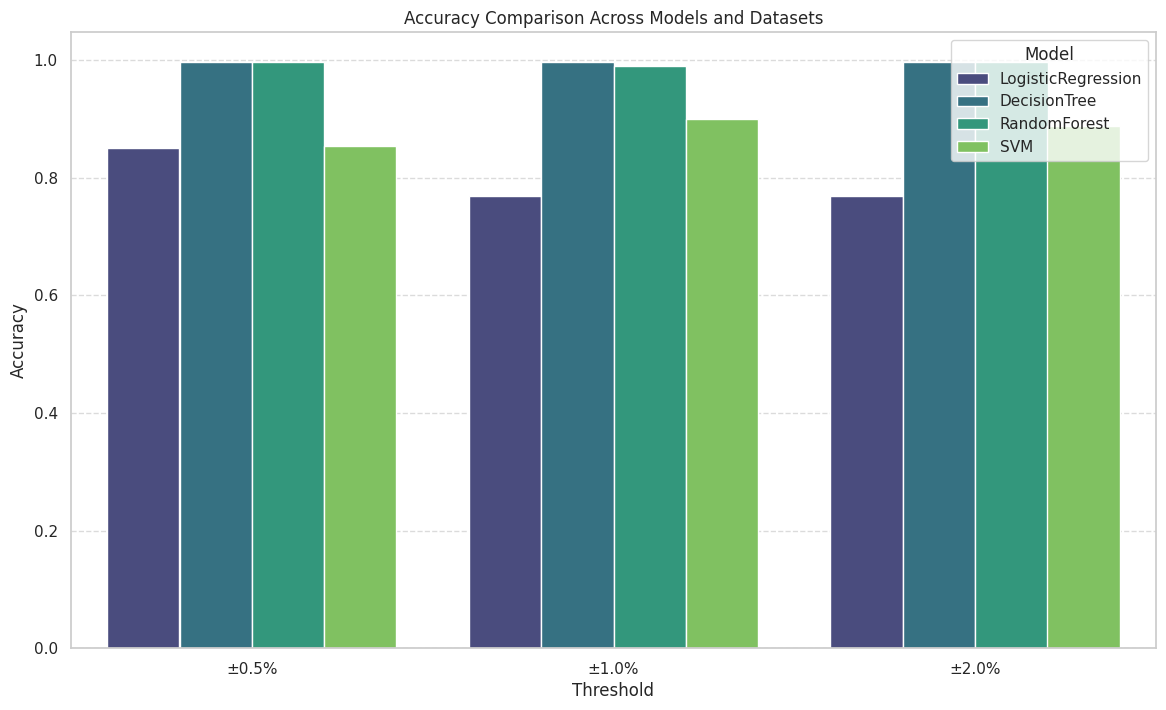

<ipython-input-41-69acce7f233b>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=performance_df, x="Threshold", y=metric, hue="Model", ci=None, palette="viridis", dodge=True)


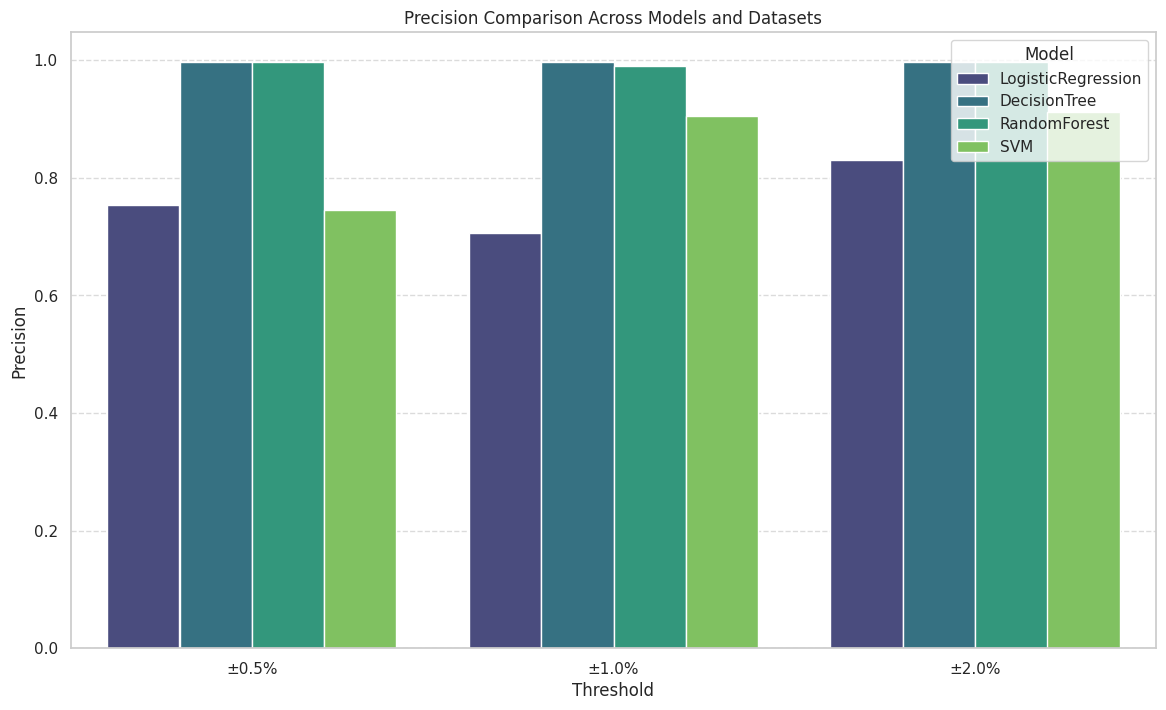

<ipython-input-41-69acce7f233b>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=performance_df, x="Threshold", y=metric, hue="Model", ci=None, palette="viridis", dodge=True)


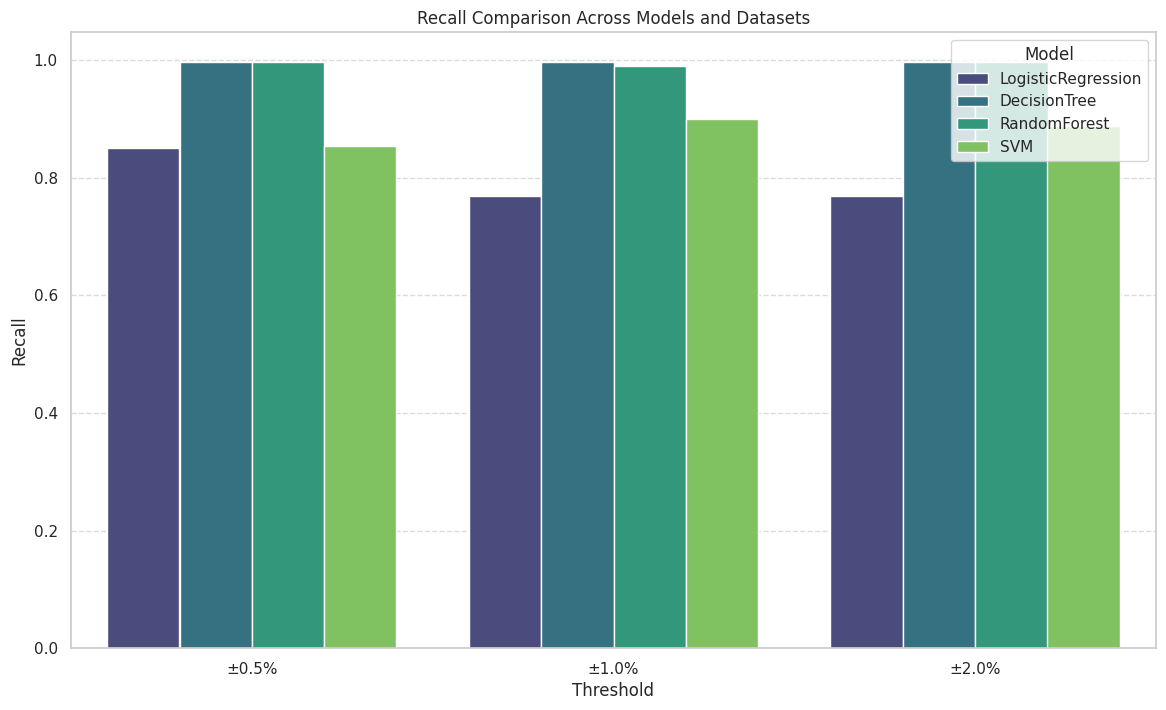

<ipython-input-41-69acce7f233b>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=performance_df, x="Threshold", y=metric, hue="Model", ci=None, palette="viridis", dodge=True)


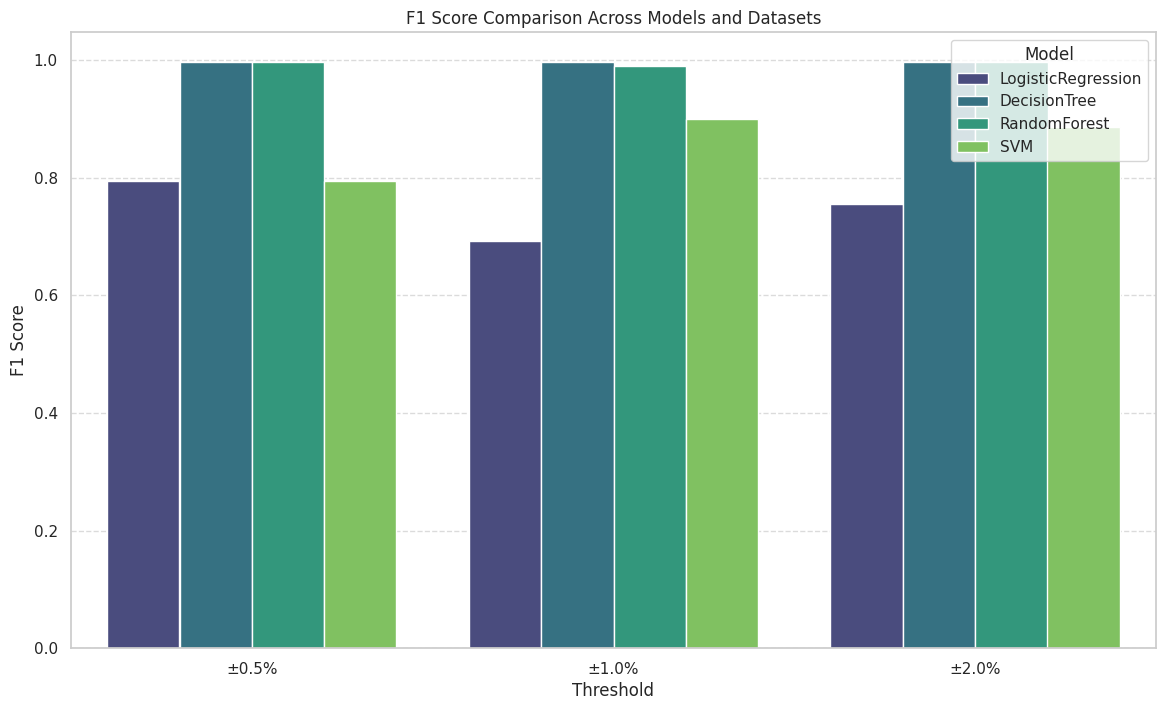

In [41]:
sns.set(style="whitegrid")

# create comparison plots for each metric across all algorithms and datasets
def plot_comparison(performance_df, metric):
    plt.figure(figsize=(14, 8))
    sns.barplot(data=performance_df, x="Threshold", y=metric, hue="Model", ci=None, palette="viridis", dodge=True)
    plt.title(f"{metric} Comparison Across Models and Datasets")
    plt.xlabel("Threshold")
    plt.ylabel(metric)
    plt.legend(title="Model", loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# loop through each metric and create a comparison plot
for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plot_comparison(performance_df, metric)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# define threshold combinations
thresholds_to_test = [(-0.005, 0.005), (-0.01, 0.01), (-0.02, 0.02)]

# define performance metrics dictionary to store results
experiment_results = {'Dataset': [], 'Model': [], 'Threshold': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# loop through each dataset and threshold
for dataset_name, dataset_df in [('Apple', apple_df), ('Microsoft', microsoft_df)]:
    for low_thresh, high_thresh in thresholds_to_test:
        # apple thresholds to create classes
        dataset_df['Class'] = dataset_df['Daily_Return'].apply(lambda x: 1 if x > high_thresh else (-1 if x < low_thresh else 0))

        # prep data for training/testing
        X = dataset_df[features]
        y = dataset_df['Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # run each model and store performance metrics
        for model_name, model in models.items():
            model.set_params(**best_params[model_name])  # Use fine-tuned parameters
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # calc metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

            # store the results
            experiment_results['Dataset'].append(dataset_name)
            experiment_results['Model'].append(model_name)
            experiment_results['Threshold'].append(f'±{abs(low_thresh * 100)}%')
            experiment_results['Accuracy'].append(accuracy)
            experiment_results['Precision'].append(precision)
            experiment_results['Recall'].append(recall)
            experiment_results['F1 Score'].append(f1)

# convert results to DataFrame
experiment_df = pd.DataFrame(experiment_results)
print(experiment_df)

      Dataset               Model Threshold  Accuracy  Precision    Recall  \
0       Apple  LogisticRegression     ±0.5%  0.863415   0.767864  0.863415   
1       Apple        DecisionTree     ±0.5%  0.995122   0.995310  0.995122   
2       Apple        RandomForest     ±0.5%  0.995122   0.995310  0.995122   
3       Apple                 SVM     ±0.5%  0.878049   0.771586  0.878049   
4       Apple  LogisticRegression     ±1.0%  0.746341   0.564961  0.746341   
5       Apple        DecisionTree     ±1.0%  0.995122   0.995197  0.995122   
6       Apple        RandomForest     ±1.0%  0.995122   0.995197  0.995122   
7       Apple                 SVM     ±1.0%  0.921951   0.922030  0.921951   
8       Apple  LogisticRegression     ±2.0%  0.829268   0.838396  0.829268   
9       Apple        DecisionTree     ±2.0%  0.995122   0.995181  0.995122   
10      Apple        RandomForest     ±2.0%  0.990244   0.990476  0.990244   
11      Apple                 SVM     ±2.0%  0.926829   0.938144

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# define the thresholds for classification
low_thresh, high_thresh = -0.01, 0.01  # Using ±1.0% as an example

# define performance metrics dictionary to store results
imbalance_results = {'Dataset': [], 'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# loop through each dataset
for dataset_name, dataset_df in [('Apple', apple_df), ('Microsoft', microsoft_df)]:
    # apple thresholds to create classes
    dataset_df['Class'] = dataset_df['Daily_Return'].apply(lambda x: 1 if x > high_thresh else (-1 if x < low_thresh else 0))

    # introcduce imbalance by reducing the high return (1) class
    high_class = dataset_df[dataset_df['Class'] == 1]
    low_class = dataset_df[dataset_df['Class'] == -1]
    avg_class = dataset_df[dataset_df['Class'] == 0]

    # sample only 20% of the high return class to create imbalance
    high_class_imbalanced = high_class.sample(frac=0.2, random_state=42)
    imbalanced_df = pd.concat([low_class, avg_class, high_class_imbalanced])

    # prep training and testing data
    X = imbalanced_df[features]
    y = imbalanced_df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # test each model on the imbalanced dataset
    for model_name, model in models.items():
        model.set_params(**best_params[model_name])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # calc metrics, focusing on recall and F1 for the minority class (high returns)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # store the results
        imbalance_results['Dataset'].append(dataset_name)
        imbalance_results['Model'].append(model_name)
        imbalance_results['Accuracy'].append(accuracy)
        imbalance_results['Precision'].append(precision)
        imbalance_results['Recall'].append(recall)
        imbalance_results['F1 Score'].append(f1)

# convert results to DataFrame for comparison
imbalance_df = pd.DataFrame(imbalance_results)
print(imbalance_df)

     Dataset               Model  Accuracy  Precision    Recall  F1 Score
0      Apple  LogisticRegression  0.726562   0.762378  0.726562  0.696116
1      Apple        DecisionTree  0.992188   0.992302  0.992188  0.992160
2      Apple        RandomForest  0.984375   0.984828  0.984375  0.984260
3      Apple                 SVM  0.875000   0.897569  0.875000  0.873512
4  Microsoft  LogisticRegression  0.832117   0.781411  0.832117  0.794001
5  Microsoft        DecisionTree  1.000000   1.000000  1.000000  1.000000
6  Microsoft        RandomForest  1.000000   1.000000  1.000000  1.000000
7  Microsoft                 SVM  0.773723   0.842483  0.773723  0.748737


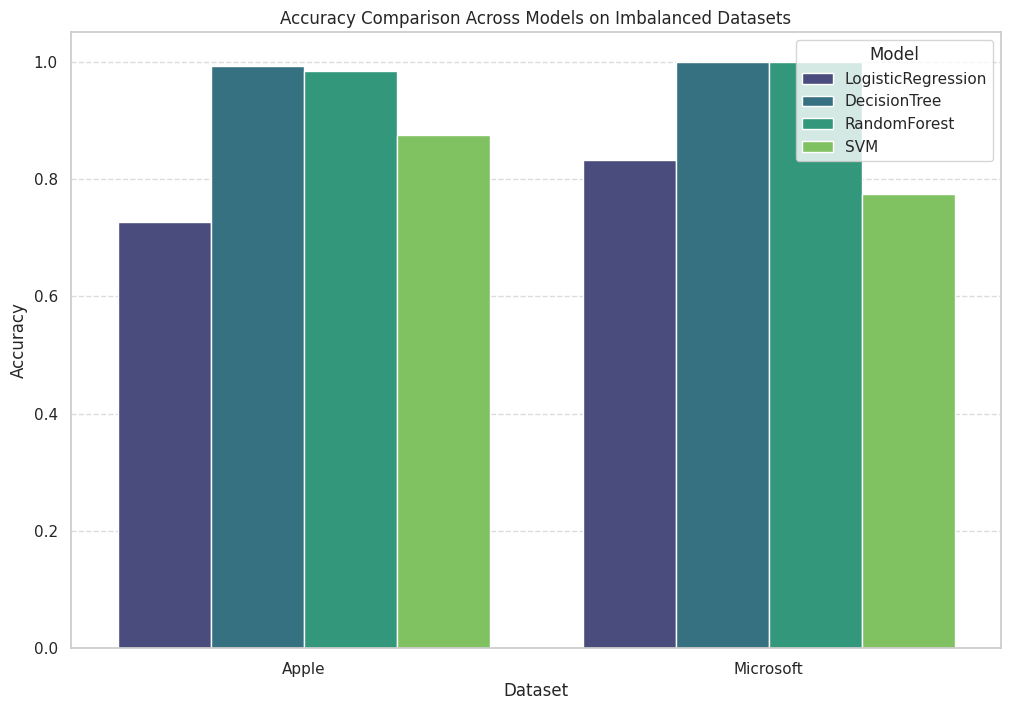

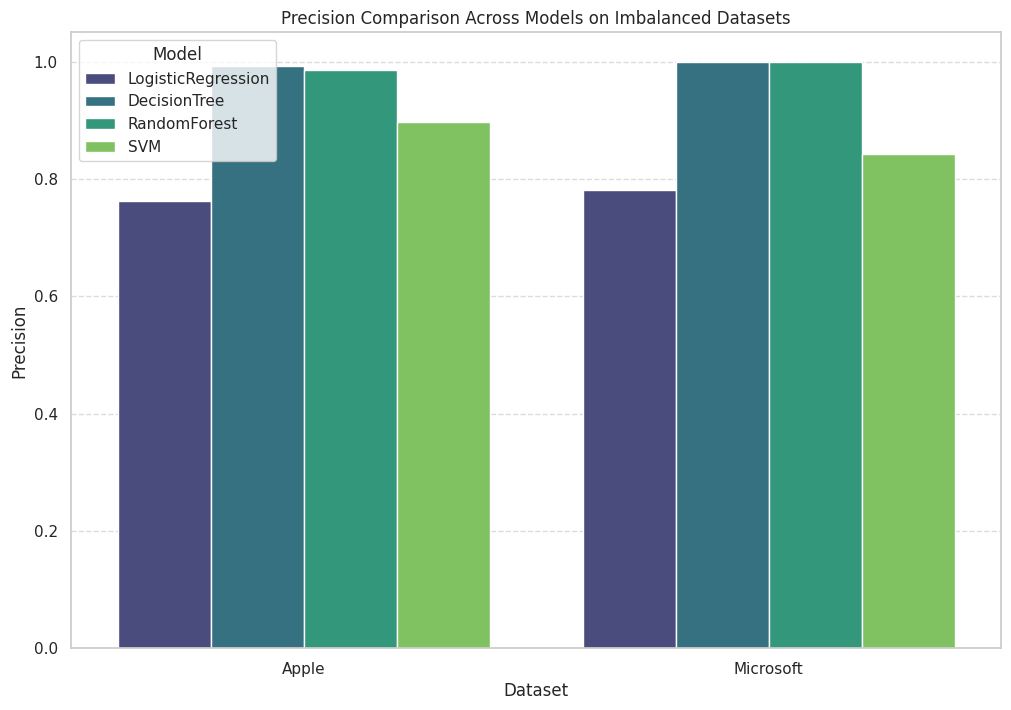

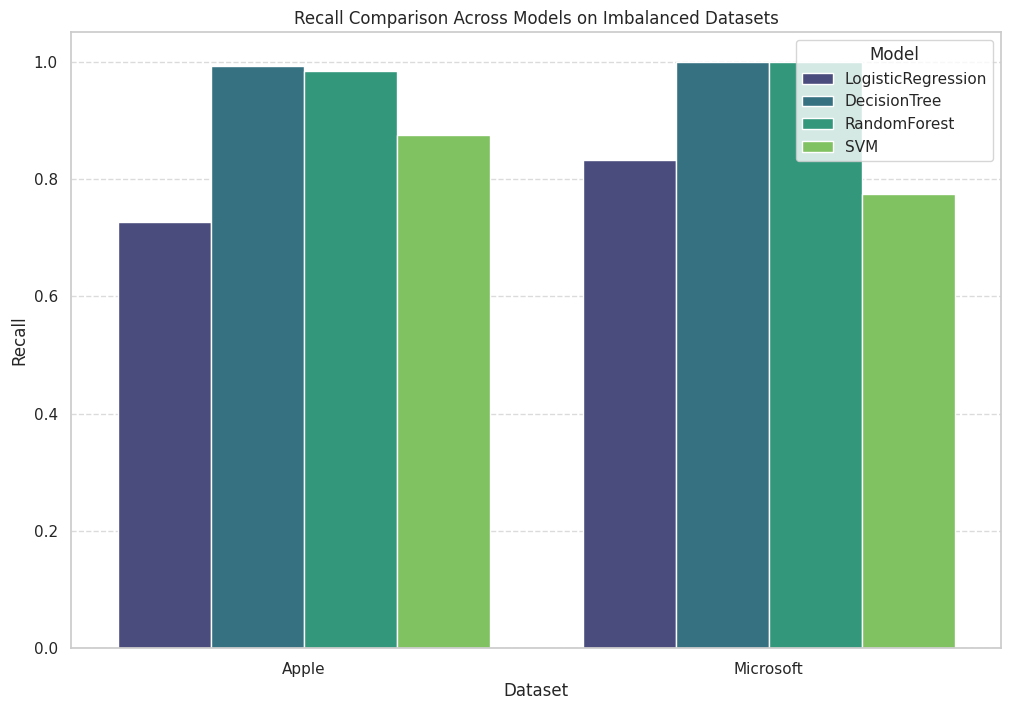

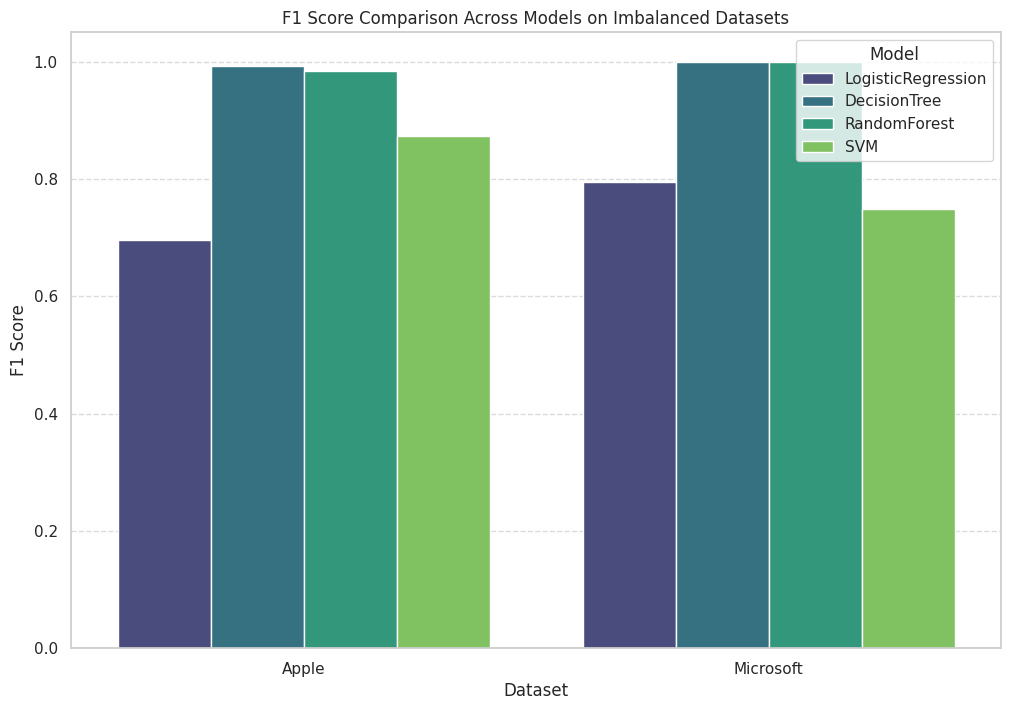

In [46]:
sns.set(style="whitegrid")
def plot_imbalance_metrics(imbalance_df, metric):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=imbalance_df, x="Dataset", y=metric, hue="Model", palette="viridis", dodge=True)
    plt.title(f"{metric} Comparison Across Models on Imbalanced Datasets")
    plt.xlabel("Dataset")
    plt.ylabel(metric)
    plt.legend(title="Model")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plot_imbalance_metrics(imbalance_df, metric)

In [47]:
# define different levels of imbalance for high return samples
imbalance_levels = [0.5, 0.3, 0.1]

# define a results dictionary to store metrics for each imbalance level
multi_imbalance_results = {
    'Dataset': [], 'Model': [], 'Imbalance_Level': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []
}

# lopp through each dataset and each imbalance level
for dataset_name, dataset_df in [('Apple', apple_df), ('Microsoft', microsoft_df)]:
    for level in imbalance_levels:
        # apply thresholds to create classes
        low_thresh, high_thresh = -0.01, 0.01
        dataset_df['Class'] = dataset_df['Daily_Return'].apply(lambda x: 1 if x > high_thresh else (-1 if x < low_thresh else 0))

        # imbalance by sampling a subset of the high return (1) class
        high_class = dataset_df[dataset_df['Class'] == 1]
        low_class = dataset_df[dataset_df['Class'] == -1]
        avg_class = dataset_df[dataset_df['Class'] == 0]

        # create the imbalanced dataset by sampling the high return class
        high_class_imbalanced = high_class.sample(frac=level, random_state=42)
        imbalanced_df = pd.concat([low_class, avg_class, high_class_imbalanced])

        # prep training and testing data
        X = imbalanced_df[features]
        y = imbalanced_df['Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # test each model on the imbalanced dataset
        for model_name, model in models.items():
            model.set_params(**best_params[model_name])  # Use fine-tuned parameters
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # calc metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

            # stroe the results
            multi_imbalance_results['Dataset'].append(dataset_name)
            multi_imbalance_results['Model'].append(model_name)
            multi_imbalance_results['Imbalance_Level'].append(f'{int(level*100)}%')
            multi_imbalance_results['Accuracy'].append(accuracy)
            multi_imbalance_results['Precision'].append(precision)
            multi_imbalance_results['Recall'].append(recall)
            multi_imbalance_results['F1 Score'].append(f1)

# convert results to DataFrame for easy comparison
multi_imbalance_df = pd.DataFrame(multi_imbalance_results)
print(multi_imbalance_df)

      Dataset               Model Imbalance_Level  Accuracy  Precision  \
0       Apple  LogisticRegression             50%  0.834395   0.837702   
1       Apple        DecisionTree             50%  1.000000   1.000000   
2       Apple        RandomForest             50%  1.000000   1.000000   
3       Apple                 SVM             50%  0.891720   0.916007   
4       Apple  LogisticRegression             30%  0.789855   0.799335   
5       Apple        DecisionTree             30%  0.992754   0.992847   
6       Apple        RandomForest             30%  0.992754   0.992847   
7       Apple                 SVM             30%  0.891304   0.921472   
8       Apple  LogisticRegression             10%  0.720339   0.740518   
9       Apple        DecisionTree             10%  0.991525   0.991775   
10      Apple        RandomForest             10%  0.991525   0.991775   
11      Apple                 SVM             10%  0.838983   0.851271   
12  Microsoft  LogisticRegression     

<ipython-input-48-89f8478239c3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=multi_imbalance_df, x="Imbalance_Level", y=metric, hue="Model", ci=None, palette="viridis", dodge=True)


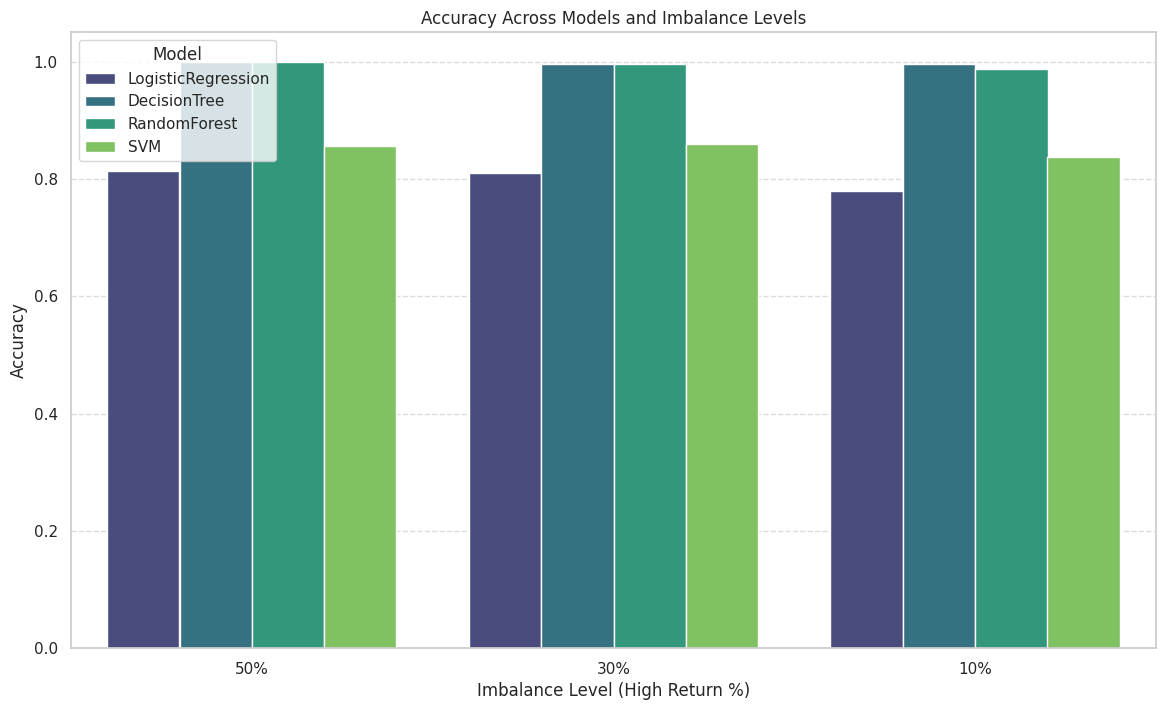

<ipython-input-48-89f8478239c3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=multi_imbalance_df, x="Imbalance_Level", y=metric, hue="Model", ci=None, palette="viridis", dodge=True)


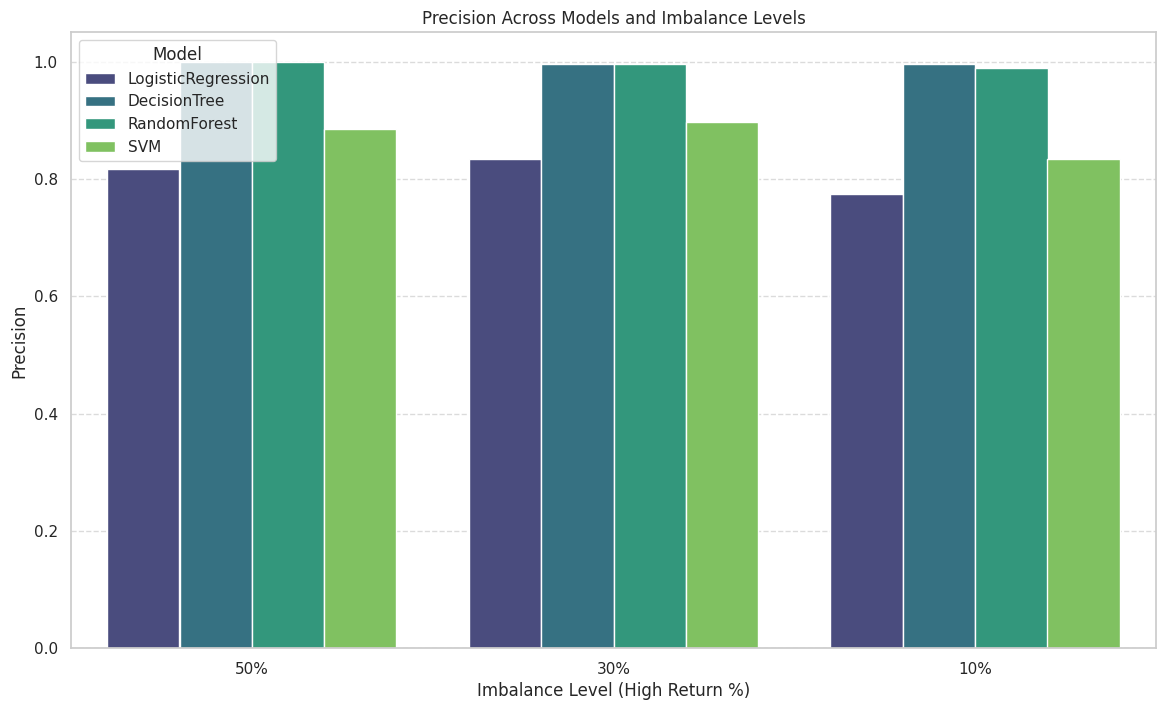

<ipython-input-48-89f8478239c3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=multi_imbalance_df, x="Imbalance_Level", y=metric, hue="Model", ci=None, palette="viridis", dodge=True)


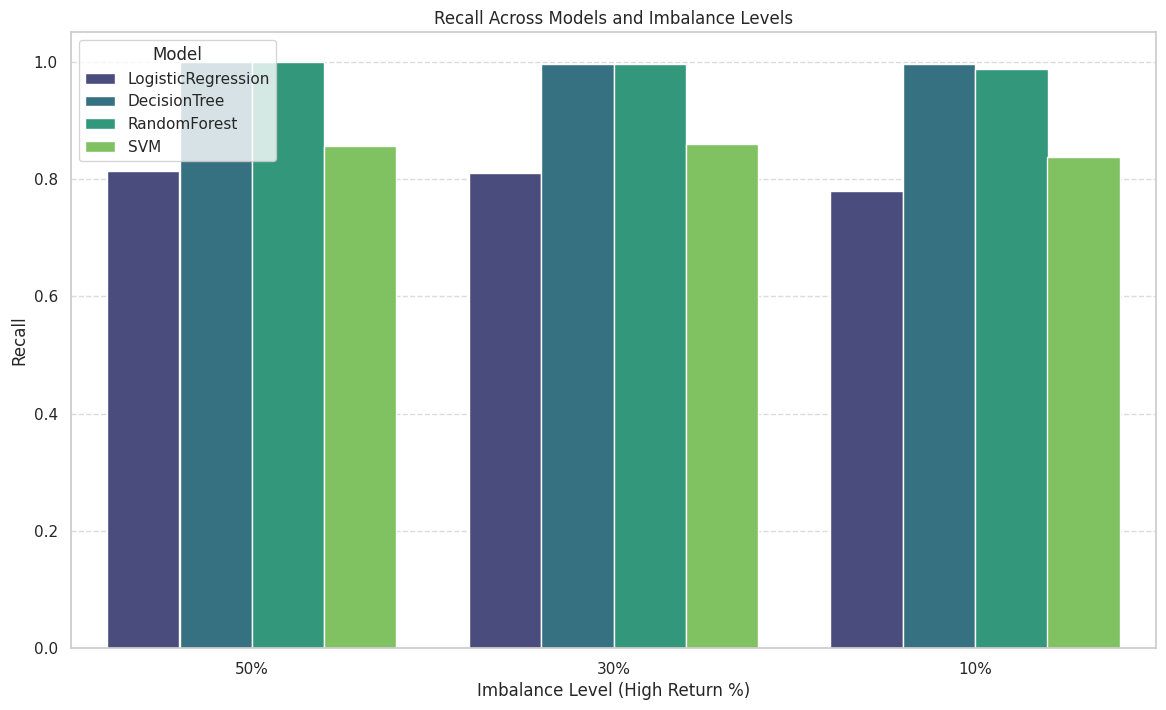

<ipython-input-48-89f8478239c3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=multi_imbalance_df, x="Imbalance_Level", y=metric, hue="Model", ci=None, palette="viridis", dodge=True)


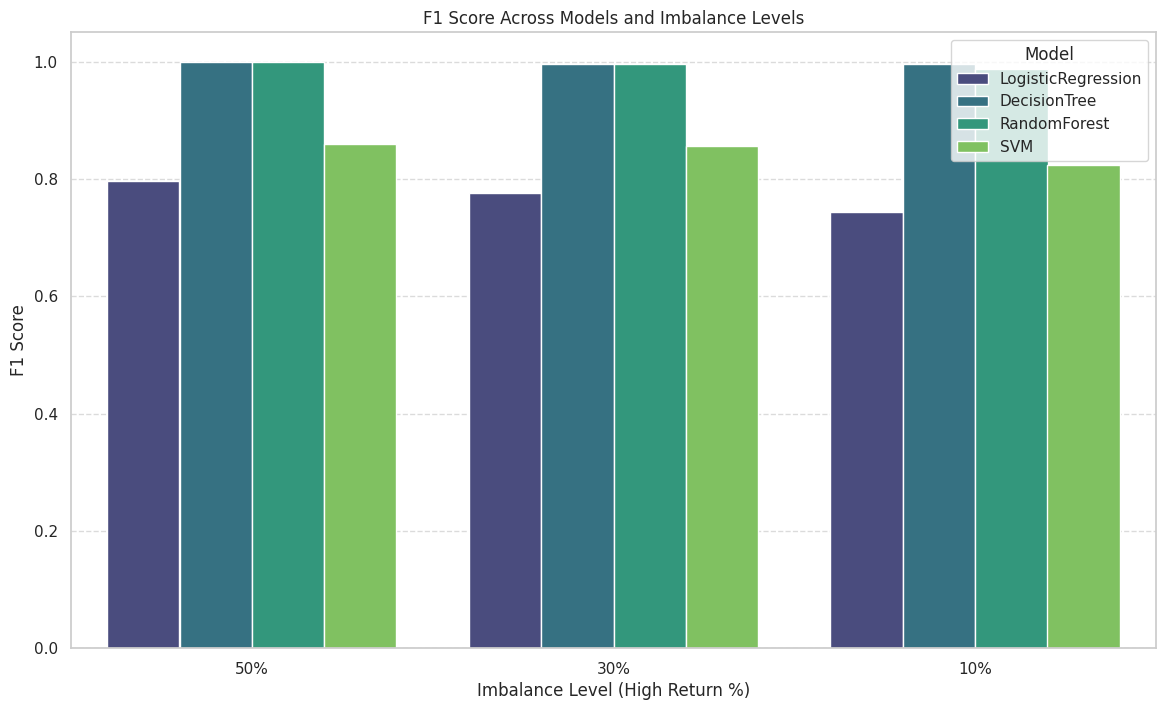

In [48]:
sns.set(style="whitegrid")

def plot_imbalance_comparison(multi_imbalance_df, metric):
    plt.figure(figsize=(14, 8))
    sns.barplot(data=multi_imbalance_df, x="Imbalance_Level", y=metric, hue="Model", ci=None, palette="viridis", dodge=True)
    plt.title(f"{metric} Across Models and Imbalance Levels")
    plt.xlabel("Imbalance Level (High Return %)")
    plt.ylabel(metric)
    plt.legend(title="Model")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plot_imbalance_comparison(multi_imbalance_df, metric)

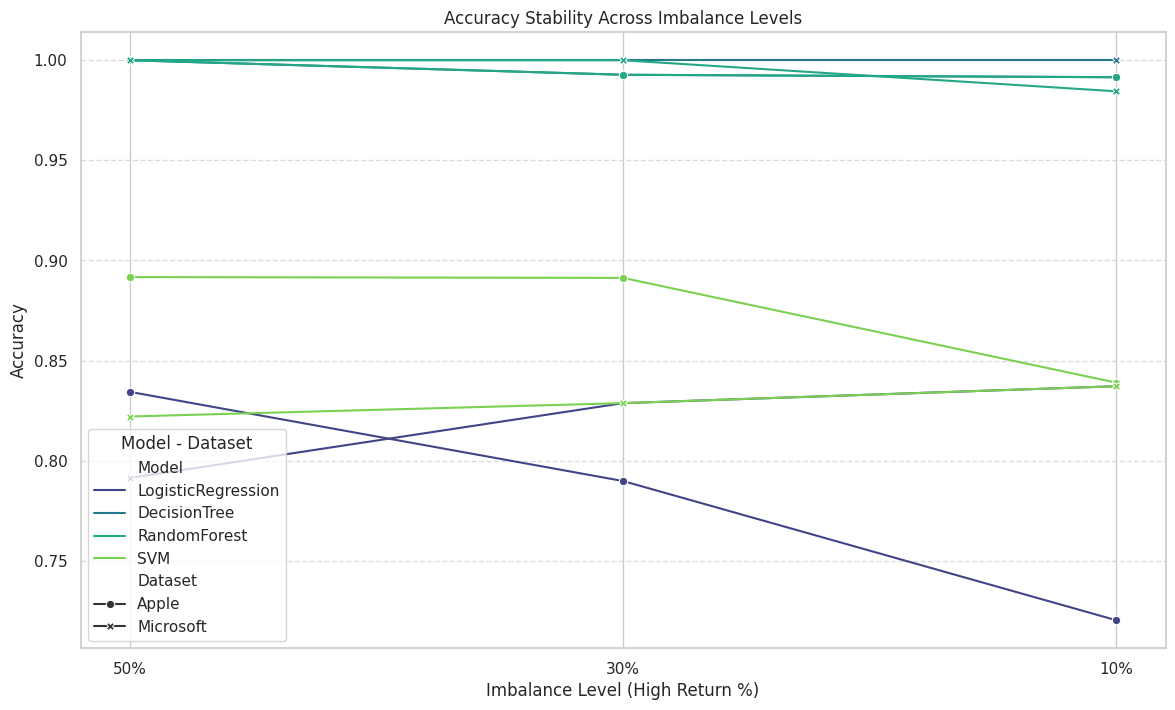

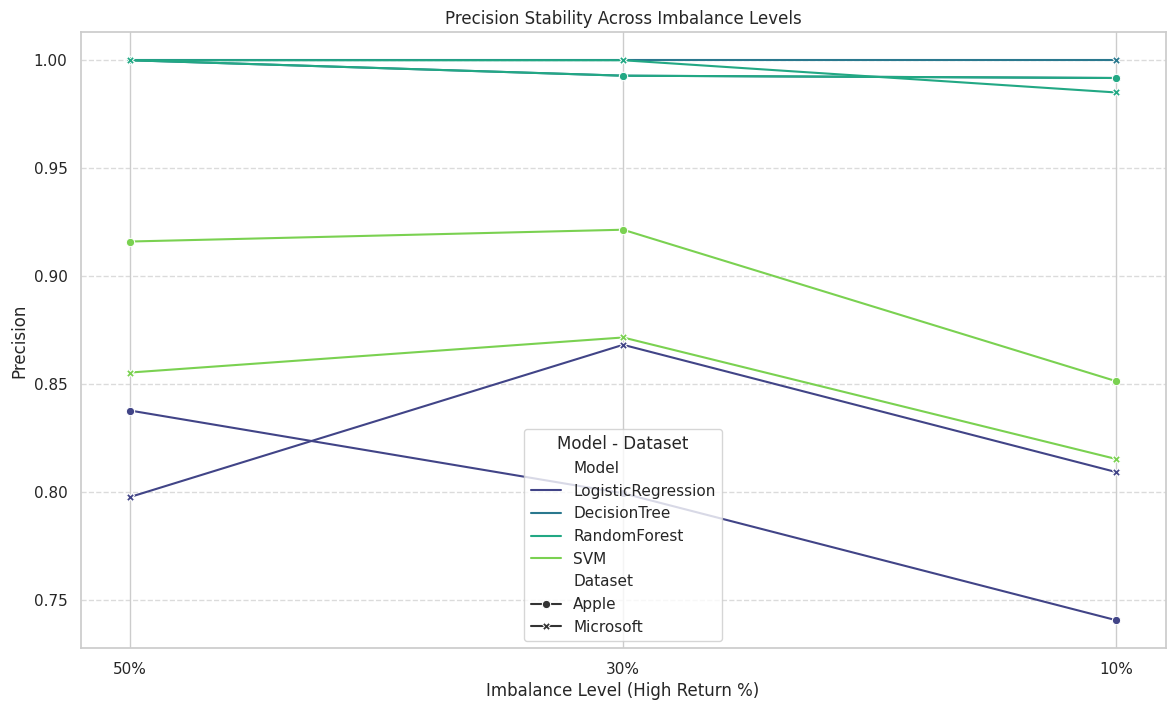

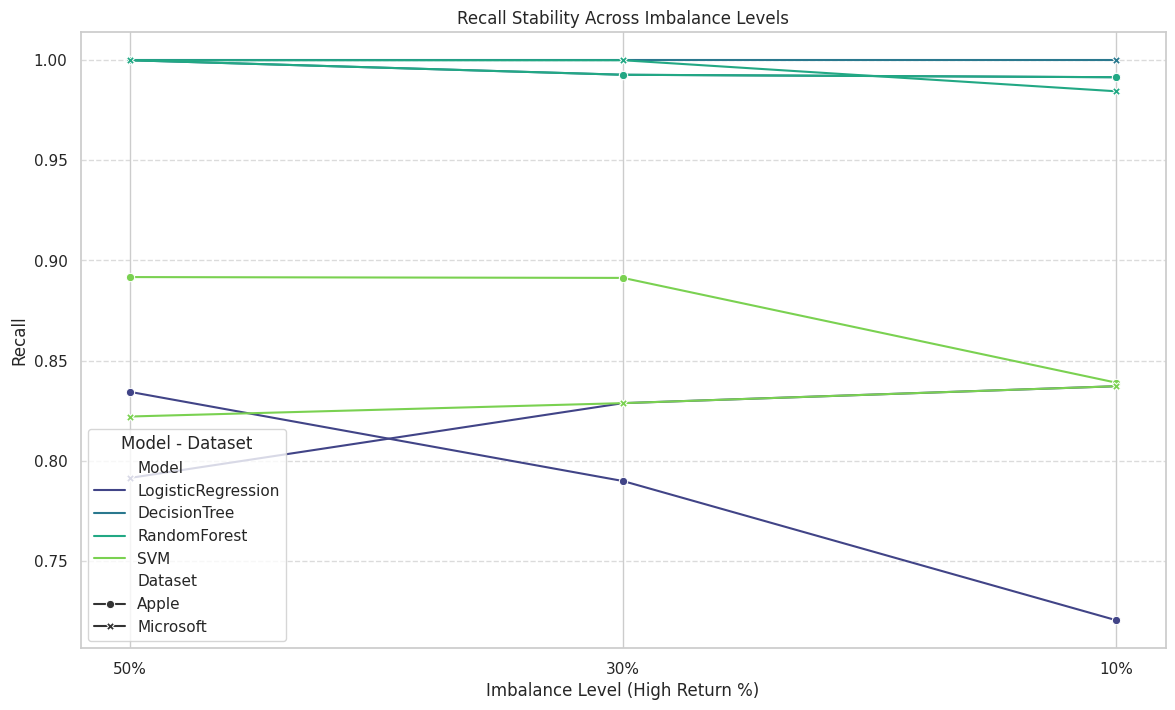

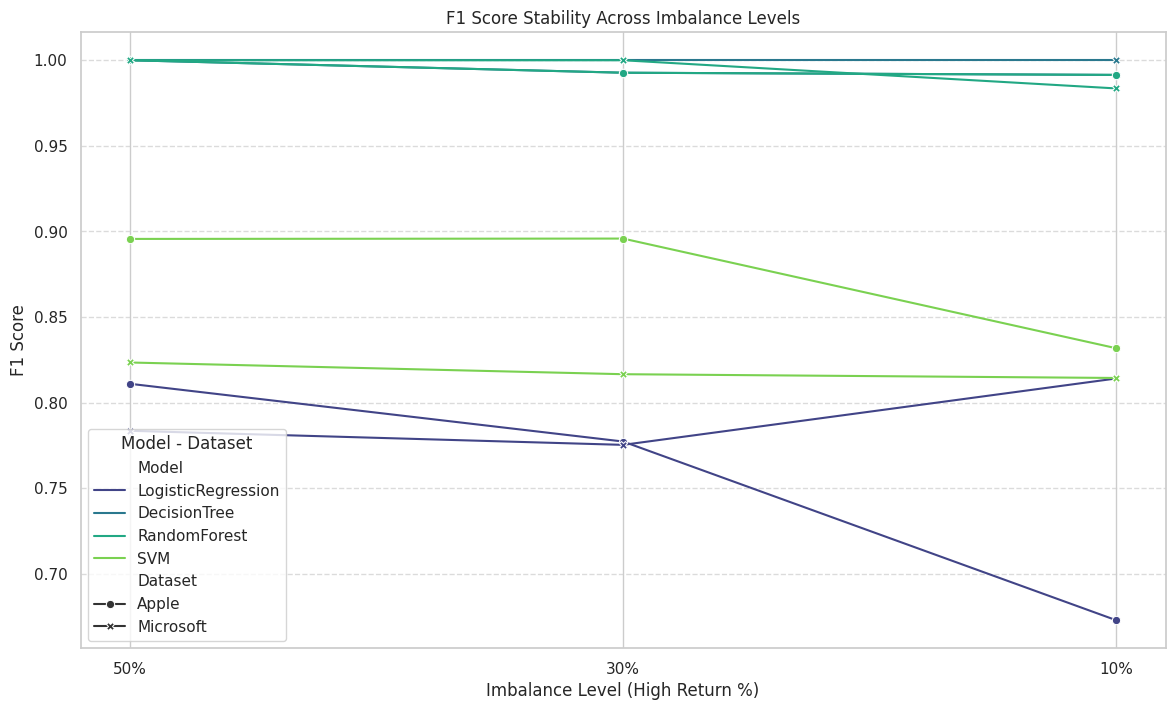

In [49]:
sns.set(style="whitegrid")

# plot stability of each metric across imbalance levels for each model
def plot_stability_across_imbalance(multi_imbalance_df, metric):
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=multi_imbalance_df,
        x="Imbalance_Level",
        y=metric,
        hue="Model",
        style="Dataset",
        markers=True,
        dashes=False,
        palette="viridis"
    )
    plt.title(f"{metric} Stability Across Imbalance Levels")
    plt.xlabel("Imbalance Level (High Return %)")
    plt.ylabel(metric)
    plt.legend(title="Model - Dataset")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# loop through each metric and create stability plots
for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plot_stability_across_imbalance(multi_imbalance_df, metric)

In [50]:
import time

# store computational time results
time_results = {'Model': [], 'Training Time (s)': [], 'Prediction Time (s)': []}

# loop through each model
for model_name, model in models.items():
    # measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # measure prediction time
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    # store results
    time_results['Model'].append(model_name)
    time_results['Training Time (s)'].append(training_time)
    time_results['Prediction Time (s)'].append(prediction_time)

time_df = pd.DataFrame(time_results)
print(time_df)

                Model  Training Time (s)  Prediction Time (s)
0  LogisticRegression           0.012857             0.002282
1        DecisionTree           0.003933             0.002108
2        RandomForest           0.164480             0.006793
3                 SVM           0.020624             0.007309


In [52]:
feature_importance_results = {}

# loop through each model
for model_name, model in models.items():
    if hasattr(model, "feature_importances_"):
        # train the model
        model.fit(X_train, y_train)

        # get feature importances
        feature_importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        # store results
        feature_importance_results[model_name] = feature_importance_df
        print(f"Feature importances for {model_name}:\n", feature_importance_df)
    else:
        print(f"{model_name} does not support feature importances.")

LogisticRegression does not support feature importances.
Feature importances for DecisionTree:
         Feature  Importance
0  Daily_Return         1.0
1        Volume         0.0
2      5_Day_MA         0.0
3     20_Day_MA         0.0
4    Volatility         0.0
Feature importances for RandomForest:
         Feature  Importance
0  Daily_Return    0.898838
1        Volume    0.044108
4    Volatility    0.023099
2      5_Day_MA    0.018489
3     20_Day_MA    0.015466
SVM does not support feature importances.


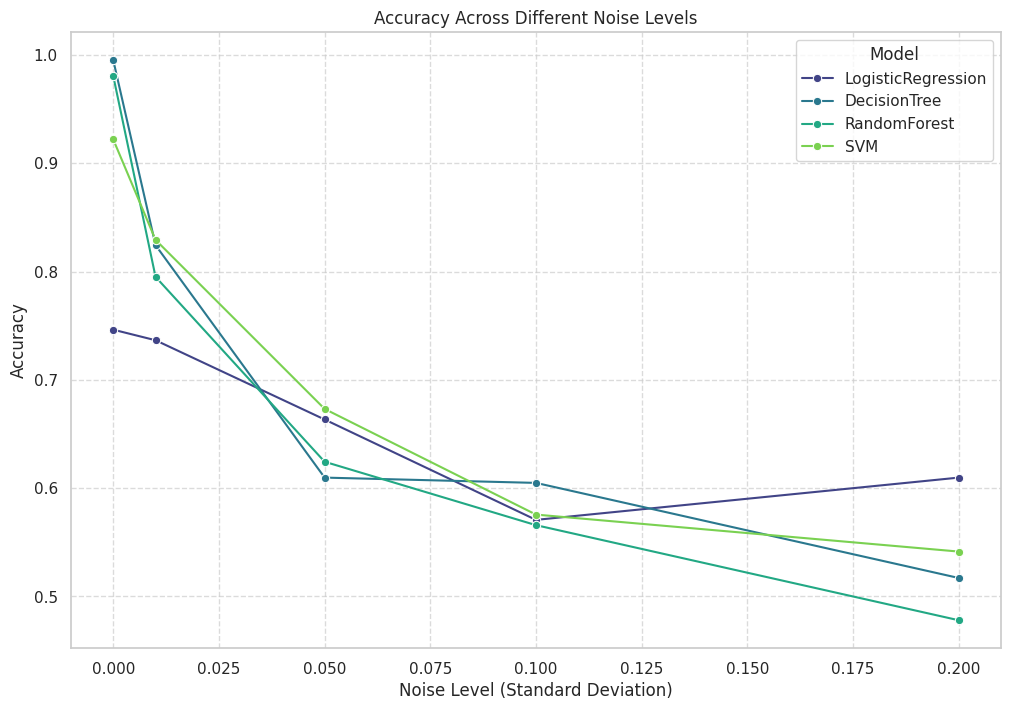

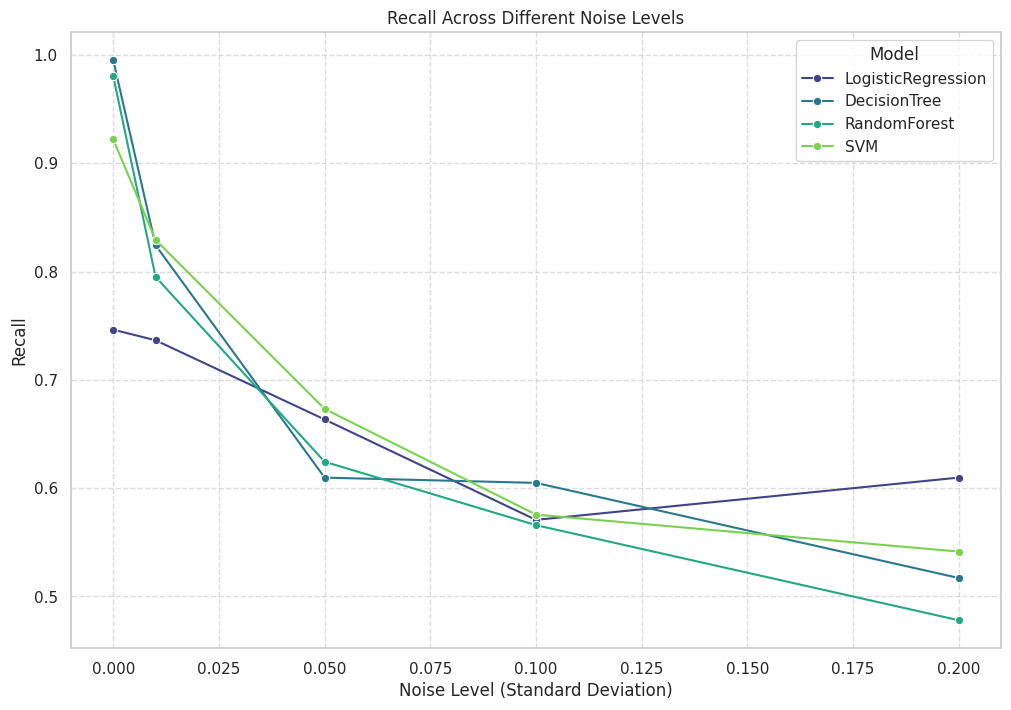

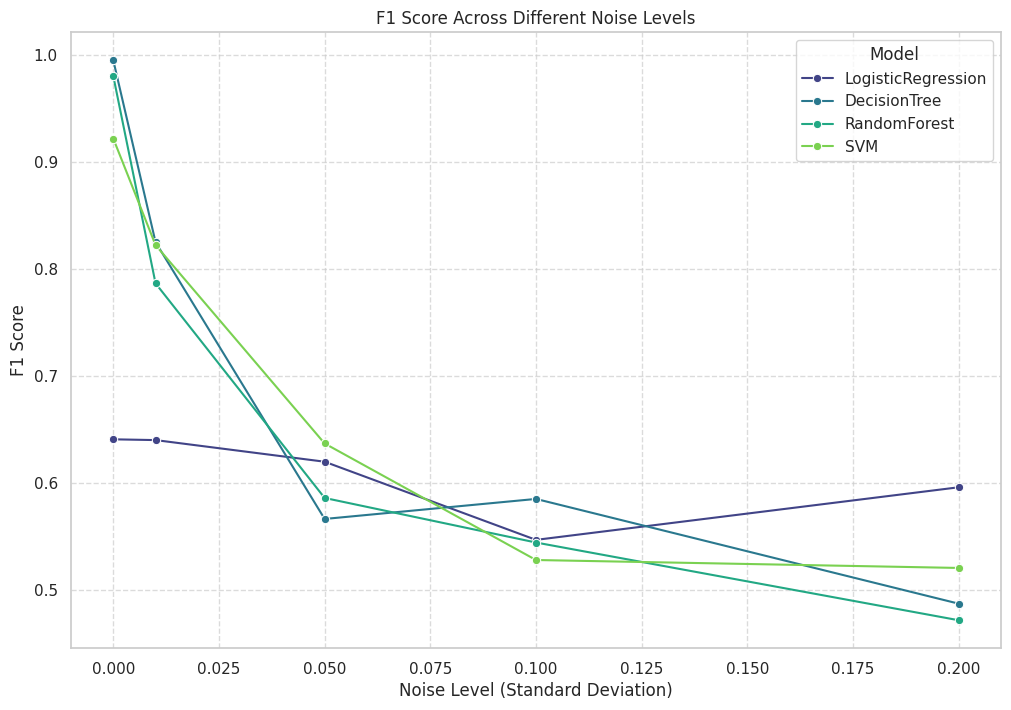

In [53]:
noise_levels = [0, 0.01, 0.05, 0.1, 0.2]
noise_robustness_results = {'Model': [], 'Noise_Level': [], 'Accuracy': [], 'Recall': [], 'F1 Score': []}

# loop through each model and noise level
for model_name, model in models.items():
    for noise_level in noise_levels:
        # apply synthetic noise by adding random noise to 'Daily_Return'
        noisy_df = apple_df.copy()  # Use the Apple dataset as an example
        noise = np.random.normal(0, noise_level, size=noisy_df['Daily_Return'].shape)
        noisy_df['Noisy_Daily_Return'] = noisy_df['Daily_Return'] + noise

        # define thresholds and apply class labels
        low_thresh, high_thresh = -0.01, 0.01  # ±1.0% threshold
        noisy_df['Class'] = noisy_df['Noisy_Daily_Return'].apply(lambda x: 1 if x > high_thresh else (-1 if x < low_thresh else 0))

        # prep training and testing data
        X = noisy_df[features]
        y = noisy_df['Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # train and evaluate the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # calc performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # store results
        noise_robustness_results['Model'].append(model_name)
        noise_robustness_results['Noise_Level'].append(noise_level)
        noise_robustness_results['Accuracy'].append(accuracy)
        noise_robustness_results['Recall'].append(recall)
        noise_robustness_results['F1 Score'].append(f1)

# convert results to DataFrame for visualization
noise_robustness_df = pd.DataFrame(noise_robustness_results)

# plot noise robustness for each metric
def plot_noise_robustness(noise_robustness_df, metric):
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=noise_robustness_df, x="Noise_Level", y=metric, hue="Model", marker="o", palette="viridis")
    plt.title(f"{metric} Across Different Noise Levels")
    plt.xlabel("Noise Level (Standard Deviation)")
    plt.ylabel(metric)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title="Model")
    plt.show()

for metric in ["Accuracy", "Recall", "F1 Score"]:
    plot_noise_robustness(noise_robustness_df, metric)

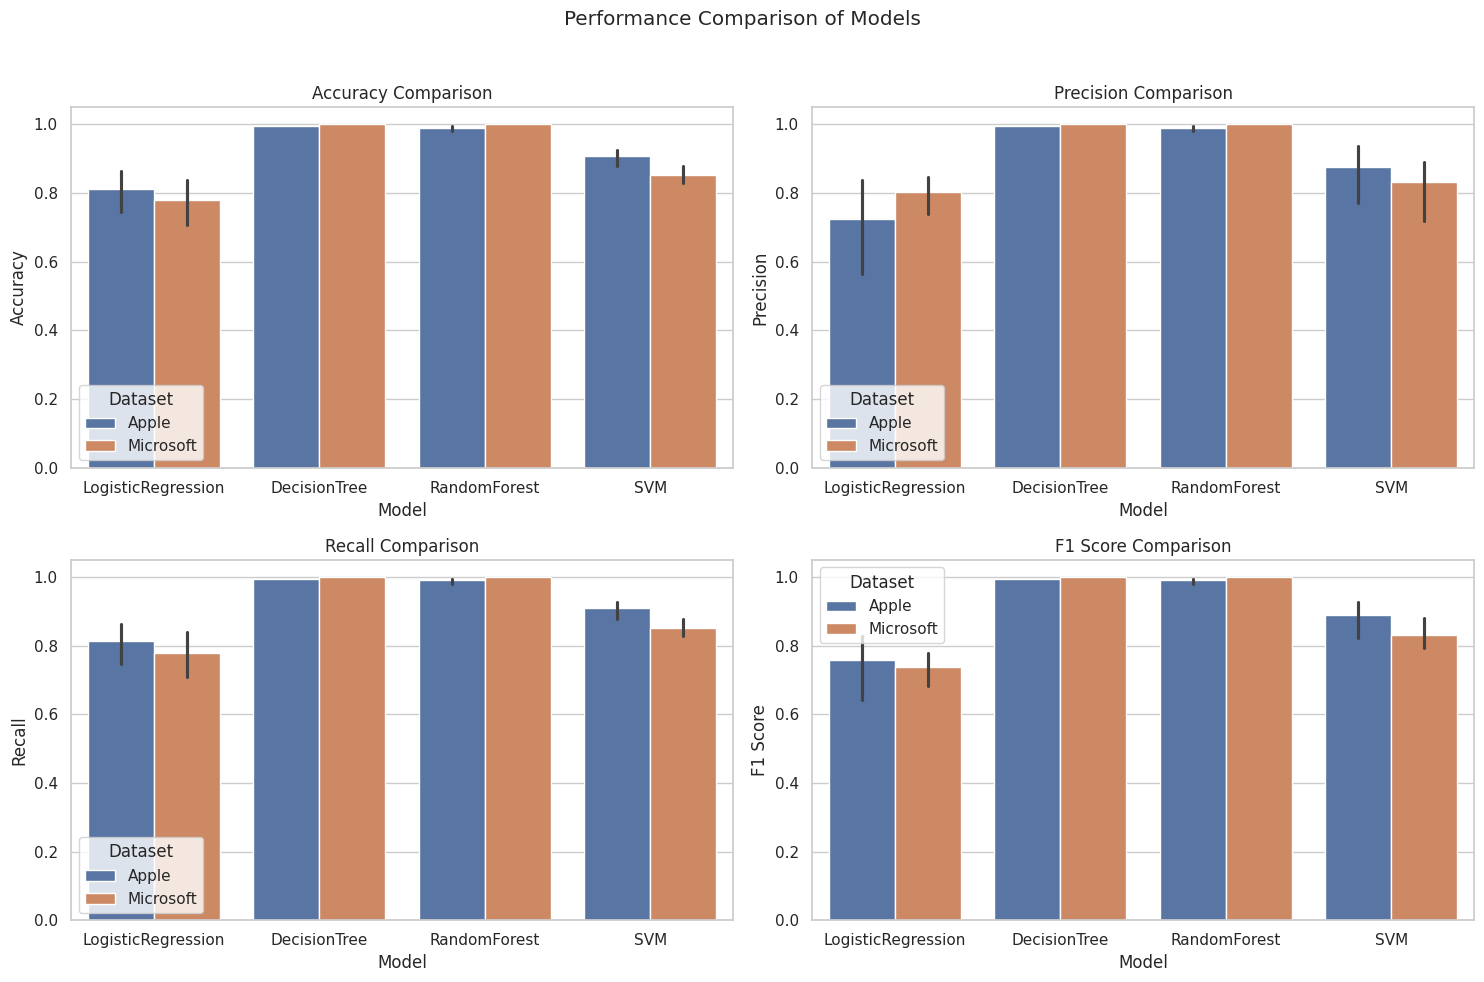

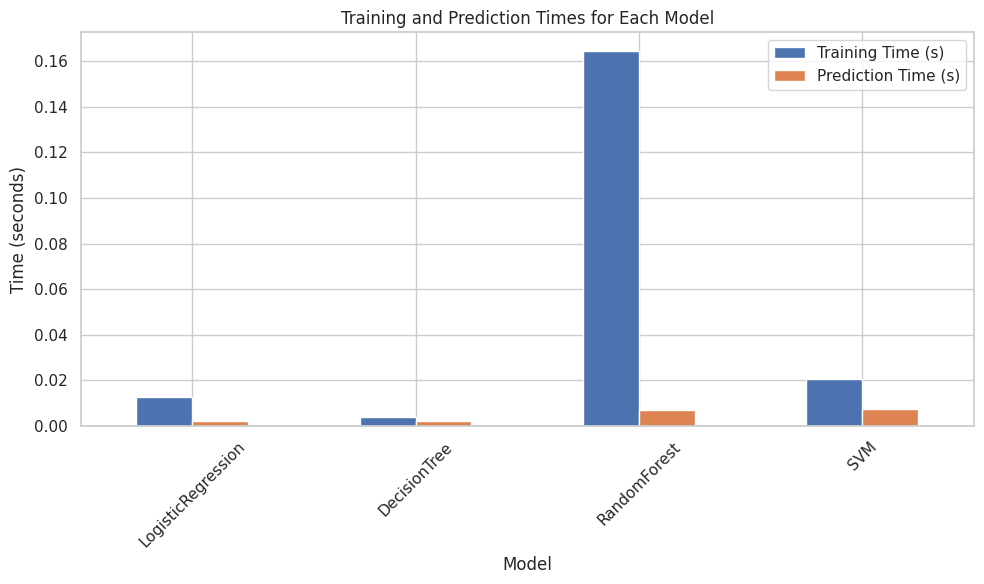

In [54]:
# Performance Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Performance Comparison of Models")

for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    sns.barplot(data=performance_df, x='Model', y=metric, hue='Dataset', ax=ax)
    ax.set_title(f"{metric} Comparison")
    ax.set_ylabel(metric)
    ax.set_xlabel("Model")
    ax.legend(title='Dataset')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Computation Time Comparison
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
time_df.plot(kind='bar', x='Model', ax=ax)
ax.set_title("Training and Prediction Times for Each Model")
ax.set_ylabel("Time (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()